In [ ]:
#!/usr/bin/env python3
"""
Enhanced Visualization for Policy Repair Method Comparison

This module creates publication-quality visualizations for comparing different
policy repair methodologies in cloud security research. The visualizations
are designed to meet academic conference standards with professional styling,
clear data presentation, and appropriate statistical annotations.

Academic Publication: "Counter-Example Guided Policy Repair for Cloud Security"
"""

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from typing import Dict, List, Tuple, Optional
from dataclasses import dataclass
import seaborn as sns
import json

# Professional academic color palette
ACADEMIC_COLORS = {
    'navy_blue': '#2C3E50',      # Primary dark blue
    'steel_blue': '#34495E',     # Secondary dark blue
    'emerald': '#27AE60',        # Success/improvement green
    'orange': '#E67E22',         # Counter-example method
    'red': '#C0392B',            # FL method
    'gray': '#7F8C8D',           # Baseline/initial
    'light_gray': '#BDC3C7',    # Background elements
    'white': '#FFFFFF',          # Background
    'black': '#2C3E50',          # Text
    'grid': '#ECF0F1'            # Grid lines
}

# Publication-quality matplotlib configuration
def configure_publication_style():
    """Configure matplotlib for publication-quality figures"""
    plt.style.use('default')
    plt.rcParams.update({
        # Font settings
        'font.size': 11,
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 11,
        'figure.titlesize': 16,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif'],
        
        # Figure settings
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'figure.dpi': 300,
        'figure.autolayout': True,
        'savefig.dpi': 300,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1,
        
        # Axes settings
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.linewidth': 1.0,
        'axes.edgecolor': ACADEMIC_COLORS['steel_blue'],
        'axes.labelcolor': ACADEMIC_COLORS['black'],
        'axes.axisbelow': True,
        
        # Grid settings
        'axes.grid': True,
        'grid.alpha': 0.3,
        'grid.linewidth': 0.5,
        'grid.color': ACADEMIC_COLORS['grid'],
        
        # Other settings
        'text.usetex': False,
        'lines.linewidth': 1.5,
        'lines.markersize': 6,
    })


@dataclass
class ExperimentResult:
    """Data structure for experimental results"""
    name: str
    initial_accuracy: float
    final_accuracy: float
    sample_size: int
    method_type: str
    
    @property
    def improvement(self) -> float:
        return self.final_accuracy - self.initial_accuracy
    
    @property
    def relative_improvement(self) -> float:
        return (self.final_accuracy - self.initial_accuracy) / self.initial_accuracy * 100


class PolicyRepairVisualizer:
    """Publication-quality visualizer for policy repair method comparison"""
    
    def __init__(self, baseline_file: str = None, counter_example_file: str = None, fault_localization_file: str = None):
        configure_publication_style()
        self.colors = ACADEMIC_COLORS
        self.baseline_data = None
        self.counter_example_data = None
        self.fault_localization_data = None
        
        if baseline_file:
            self.load_baseline_data(baseline_file)
        if counter_example_file:
            self.load_counter_example_data(counter_example_file)
        if fault_localization_file:
            self.load_fault_localization_data(fault_localization_file)
    
    def load_baseline_data(self, data_file: str):
        """Load baseline experimental data from JSON file"""
        with open(data_file, 'r') as f:
            self.baseline_data = json.load(f)
    
    def load_counter_example_data(self, data_file: str):
        """Load counter-example experimental data from JSON file"""
        with open(data_file, 'r') as f:
            self.counter_example_data = json.load(f)
    
    def load_fault_localization_data(self, data_file: str):
        """Load fault localization experimental data from JSON file"""
        with open(data_file, 'r') as f:
            self.fault_localization_data = json.load(f)
    
    def calculate_overall_accuracies(self, data):
        """Calculate overall baseline and average accuracies for given data"""
        all_policies = list(data['policy_iterations'].keys())
        
        total_baseline = 0
        total_average = 0
        
        for pid in all_policies:
            policy_data = data['policy_iterations'][pid]
            total_baseline += policy_data['baseline_accuracy']
            total_average += policy_data['average_accuracy']
        
        avg_baseline = total_baseline / len(all_policies)
        avg_final = total_average / len(all_policies)
        
        return avg_baseline, avg_final, len(all_policies)
        
    def create_method_comparison_chart(self) -> plt.Figure:
        """
        Create a comprehensive comparison chart of policy repair methods using data from JSON files
        
        Returns:
            matplotlib.figure.Figure: Publication-ready comparison figure
        """
        if not self.baseline_data:
            raise ValueError("No baseline data loaded. Please call load_baseline_data() first.")
            
        # Calculate accuracies from the loaded data
        baseline_initial_acc, baseline_final_acc, baseline_sample_size = self.calculate_overall_accuracies(self.baseline_data)
        
        # Prepare data for all three methods
        initial_accuracy = baseline_initial_acc  # All methods start from the same initial accuracy
        baseline_accuracy = baseline_final_acc
        
        # Get counter-example accuracy if available
        counter_example_accuracy = baseline_accuracy  # Default to baseline if not available
        if self.counter_example_data:
            _, counter_example_accuracy, _ = self.calculate_overall_accuracies(self.counter_example_data)
        
        # Get fault localization accuracy if available  
        fault_localization_accuracy = baseline_accuracy  # Default to baseline if not available
        if self.fault_localization_data:
            _, fault_localization_accuracy, _ = self.calculate_overall_accuracies(self.fault_localization_data)
        
        # Create figure with single subplot
        fig, ax = plt.subplots(1, 1, figsize=(12, 7))
        fig.suptitle('Policy Repair Method Performance Comparison', 
                    fontsize=16, fontweight='bold', y=0.95)
        
        # Define method colors
        method_colors = {
            'initial': self.colors['gray'],
            'baseline': self.colors['steel_blue'],
            'counter_example': self.colors['orange'],
            'fault_localization': self.colors['red']
        }
        
        # Data for plotting
        methods = ['Initial', 'Baseline', 'Counter-Example', 'Fault Localization']
        accuracies = [initial_accuracy, baseline_accuracy, counter_example_accuracy, fault_localization_accuracy]
        colors = [method_colors['initial'], method_colors['baseline'], 
                 method_colors['counter_example'], method_colors['fault_localization']]
        
        # Bar positions and styling
        x_positions = np.arange(len(methods))
        bar_width = 0.6
        
        # Create bars with professional styling
        bars = ax.bar(x_positions, accuracies, bar_width, 
                     color=colors, alpha=0.85, 
                     edgecolor=self.colors['navy_blue'], linewidth=0.8)
        
        # Add value labels on bars
        for i, (bar, value) in enumerate(zip(bars, accuracies)):
            ax.text(bar.get_x() + bar.get_width()/2, value + 1.5,
                   f'{value:.1f}%', ha='center', va='bottom',
                   fontsize=10, fontweight='bold', color=self.colors['black'])
        
        # Add improvement annotations for non-initial methods
        for i, (method, accuracy) in enumerate(zip(methods[1:], accuracies[1:]), 1):
            improvement = accuracy - initial_accuracy
            if improvement > 0:
                ax.annotate(f'+{improvement:.1f}%', 
                           xy=(i, accuracy), xytext=(i, accuracy + 8),
                           ha='center', va='bottom', fontsize=9, fontweight='bold',
                           color=colors[i])
        
        # Axis configuration
        ax.set_title(f"{baseline_sample_size} Policies Processed\nComparative Method Analysis", 
                    fontsize=12, pad=20, fontweight='medium')
        ax.set_ylabel('Policy Accuracy (%)', fontweight='medium')
        ax.set_xticks(x_positions)
        ax.set_xticklabels(methods, fontsize=10)
        ax.set_ylim(0, 105)
        
        # Professional grid styling
        ax.yaxis.grid(True, linestyle='-', alpha=0.3, zorder=0)
        ax.set_yticks([0, 25, 50, 75, 100])
        
        # Clean up spines
        for spine in ax.spines.values():
            spine.set_color(self.colors['steel_blue'])
            spine.set_linewidth(1.0)
        
        # Create legend
        self._create_comprehensive_legend(fig, method_colors)
        
        plt.tight_layout(rect=[0, 0.12, 1, 0.93])
        return fig
    
    def _create_comprehensive_legend(self, fig: plt.Figure, colors: Dict) -> None:
        """Create a comprehensive legend for the figure"""
        legend_elements = [
            mpatches.Rectangle((0, 0), 1, 1, facecolor=colors['initial'], 
                             edgecolor=self.colors['navy_blue'], linewidth=0.8,
                             label='Initial Accuracy'),
            mpatches.Rectangle((0, 0), 1, 1, facecolor=colors['baseline'],
                             edgecolor=self.colors['navy_blue'], linewidth=0.8, 
                             label='Baseline Method'),
            mpatches.Rectangle((0, 0), 1, 1, facecolor=colors['counter_example'],
                             edgecolor=self.colors['navy_blue'], linewidth=0.8,
                             label='Counter-Example Method'),
            mpatches.Rectangle((0, 0), 1, 1, facecolor=colors['fault_localization'],
                             edgecolor=self.colors['navy_blue'], linewidth=0.8,
                             label='Fault Localization Method')
        ]
        
        fig.legend(handles=legend_elements, 
                  loc='lower center', bbox_to_anchor=(0.5, 0.02),
                  ncol=4, frameon=False, fontsize=11,
                  columnspacing=1.5, handletextpad=0.5)
    

def main():
    """Main function to generate all visualizations"""
    print("Generating publication-quality policy repair method visualizations...")
    
    # Initialize visualizer with separate data files for each method (10 requests)
    visualizer_10 = PolicyRepairVisualizer(
        baseline_file='/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/10-baseline/res.json',
        counter_example_file='/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/10-counter-example/res.json',
        fault_localization_file='/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/10-fl/res.json'
    )
    
    # Initialize visualizer with separate data files for each method (15 requests)
    visualizer_15 = PolicyRepairVisualizer(
        baseline_file='/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/15-baseline/res.json',
        counter_example_file='/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/15-counter-example/res.json',
        fault_localization_file='/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/15-fl/res.json'
    )
    
    # Generate comparison charts
    comparison_fig_10 = visualizer_10.create_method_comparison_chart()
    comparison_fig_15 = visualizer_15.create_method_comparison_chart()
    
    # Display figures
    # plt.show()
    
    print("Visualizations generated successfully!")
    
    return comparison_fig_10, comparison_fig_15


if __name__ == "__main__":
    comparison_fig_10, comparison_fig_15 = main()

Generating 2x3 multi-configuration policy repair visualization...


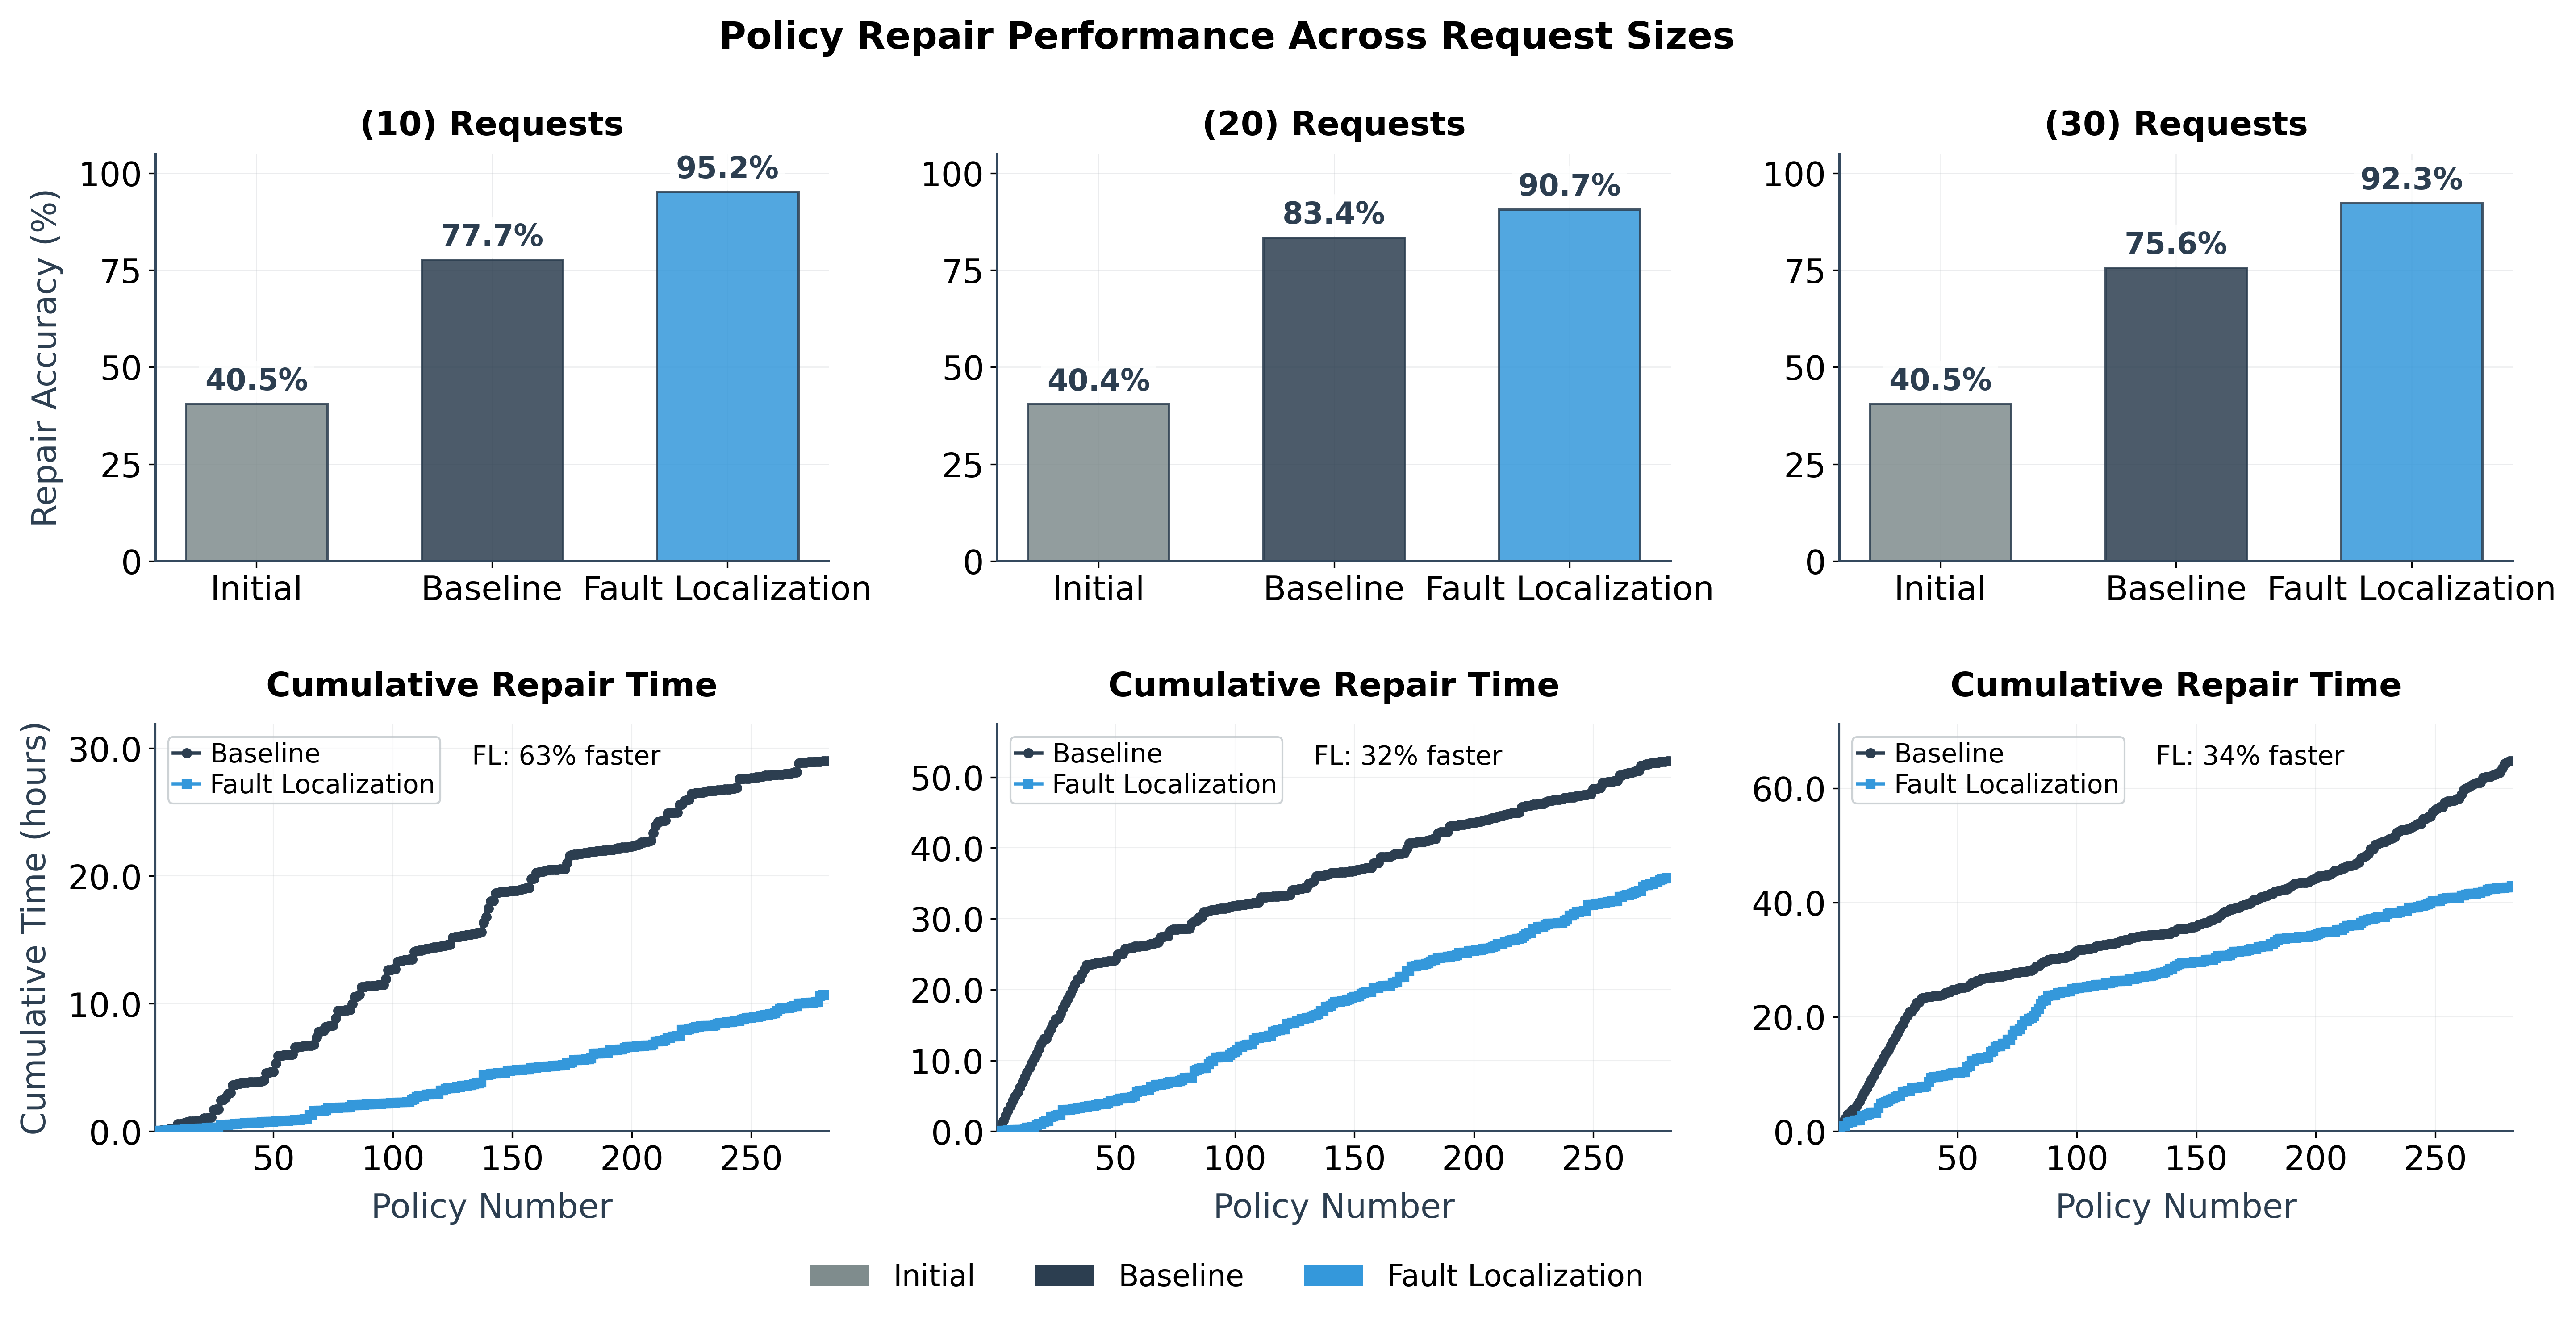

Figure saved as figures/closed_model-multi_config_timing.png
✅ 2x3 figure generated and saved to figures/closed_model-multi_config_timing.png
Top row: Accuracy comparisons   |   Bottom row: Timing comparisons
Each column: 10, 20, 30 requests respectively
Figure saved as figures/closed_model-30.png


In [ ]:
#!/usr/bin/env python3
"""
Enhanced Visualization for Policy Repair Method Comparison

This module creates publication-quality visualizations for comparing different
policy repair methodologies in cloud security research. The visualizations
are designed to meet academic conference standards with professional styling,
clear data presentation, and appropriate statistical annotations.

Academic Publication: "Counter-Example Guided Policy Repair for Cloud Security"
"""

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import numpy as np
from typing import Dict, List, Tuple, Optional
from dataclasses import dataclass
import seaborn as sns
import json

# Professional academic color palette
ACADEMIC_COLORS = {
    'navy_blue': '#2C3E50',      # Primary dark blue
    'steel_blue': '#34495E',     # Secondary dark blue
    'emerald': '#27AE60',        # Success/improvement green
    'orange': '#3498DB',         # Counter-example method
    'red': '#C0392B',            # FL method
    'gray': '#7F8C8D',           # Baseline/initial
    'light_gray': '#BDC3C7',    # Background elements
    'white': '#FFFFFF',          # Background
    'black': '#2C3E50',          # Text
    'grid': '#ECF0F1',           # Grid lines
    'teal': '#16A085',           # Teal color
    'dark_gray': '#34495E',      # Darker gray
    'success': '#2ECC71',        # Success indicator
    'blue': '#3498DB',           # New blue color
}

# Publication-quality matplotlib configuration
def configure_publication_style():
    """Configure matplotlib for publication-quality figures"""
    plt.style.use('default')
    plt.rcParams.update({
        # Font settings
        'font.size': 18,
        'axes.labelsize': 18,
        'axes.titlesize': 18,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        'legend.fontsize': 18,
        'figure.titlesize': 18,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif'],
        
        # Figure settings
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'figure.dpi': 300,
        'figure.autolayout': False,
        'savefig.dpi': 300,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.15,
        
        # Axes settings
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.linewidth': 1.2,
        'axes.edgecolor': ACADEMIC_COLORS['steel_blue'],
        'axes.labelcolor': ACADEMIC_COLORS['black'],
        'axes.axisbelow': True,
        'axes.labelpad': 8,
        
        # Grid settings
        'axes.grid': True,
        'grid.alpha': 0.25,
        'grid.linewidth': 0.6,
        'grid.color': ACADEMIC_COLORS['light_gray'],
        
        # Line settings for time plots
        'lines.linewidth': 2.5,
        'lines.markersize': 8,
        'lines.markeredgewidth': 1.5,
        
        # Other settings
        'text.usetex': False,
    })


@dataclass
class ExperimentResult:
    """Data structure for experimental results"""
    name: str
    initial_accuracy: float
    final_accuracy: float
    sample_size: int
    method_type: str
    execution_times: Optional[List[float]] = None
    
    @property
    def improvement(self) -> float:
        return self.final_accuracy - self.initial_accuracy
    
    @property
    def relative_improvement(self) -> float:
        return (self.final_accuracy - self.initial_accuracy) / self.initial_accuracy * 100


class PolicyRepairVisualizer:
    """Publication-quality visualizer for policy repair method comparison"""
    
    def __init__(self, baseline_file: str = None, counter_example_file: str = None, fault_localization_file: str = None):
        configure_publication_style()
        self.colors = ACADEMIC_COLORS
        self.baseline_data = None
        self.counter_example_data = None
        self.fault_localization_data = None
        
        if baseline_file:
            self.load_baseline_data(baseline_file)
        if counter_example_file:
            self.load_counter_example_data(counter_example_file)
        if fault_localization_file:
            self.load_fault_localization_data(fault_localization_file)
    
    def load_baseline_data(self, data_file: str):
        """Load baseline experimental data from JSON file"""
        with open(data_file, 'r') as f:
            self.baseline_data = json.load(f)
    
    def load_counter_example_data(self, data_file: str):
        """Load counter-example experimental data from JSON file"""
        with open(data_file, 'r') as f:
            self.counter_example_data = json.load(f)
    
    def load_fault_localization_data(self, data_file: str):
        """Load fault localization experimental data from JSON file"""
        with open(data_file, 'r') as f:
            self.fault_localization_data = json.load(f)
    
    def calculate_overall_accuracies(self, data):
        """Calculate overall baseline and average accuracies for given data"""
        all_policies = list(data['policy_iterations'].keys())
        
        total_baseline = 0
        total_average = 0
        
        for pid in all_policies:
            policy_data = data['policy_iterations'][pid]
            total_baseline += policy_data['baseline_accuracy']
            total_average += policy_data['final_accuracy']
        
        avg_baseline = total_baseline / len(all_policies)
        avg_final = total_average / len(all_policies)
        
        return avg_baseline, avg_final, len(all_policies)

    def calculate_overall_accuracies(self, data):
        """Calculate overall baseline and peak accuracies across all iterations."""
        all_policies = list(data['policy_iterations'].keys())

        total_baseline = 0.0
        total_peak = 0.0

        for pid in all_policies:
            policy_data = data['policy_iterations'][pid]
            baseline_acc = policy_data.get("baseline_accuracy", 0.0)
            iteration_accs = policy_data.get("iteration_accuracies", [])
            # Use max of iteration_accuracies if available, else fall back to final_accuracy
            peak_acc = max(iteration_accs) if iteration_accs else policy_data.get("final_accuracy", baseline_acc)
            total_baseline += baseline_acc
            total_peak += peak_acc

        avg_baseline = total_baseline / len(all_policies)
        avg_peak = total_peak / len(all_policies)

        return avg_baseline, avg_peak, len(all_policies)

    
    def extract_time_data(self, data, method_name: str):
        """Extract time progression data from JSON for line plots"""
        if not data or 'policy_iterations' not in data:
            # Return empty for initial method
            if method_name == 'Initial':
                return np.array([0] * 10)  # No time for initial
            else:
                return np.array([0] * 10)  # Fallback
        
        # Extract actual time data from your JSON structure
        times = []
        policy_ids = []
        
        # Sort policy IDs numerically to maintain order
        sorted_policy_ids = sorted(data['policy_iterations'].keys(), key=int)
        
        for policy_id in sorted_policy_ids:
            policy_data = data['policy_iterations'][policy_id]
            
            # Extract cycle duration in seconds from your JSON structure
            if 'cycle_duration_seconds' in policy_data:
                # Convert seconds to hours
                time_hours = policy_data['cycle_duration_seconds'] / 3600.0
                times.append(time_hours)
                policy_ids.append(int(policy_id))
        
        if times:
            # Return cumulative time progression in hours
            return np.cumsum(times)
        else:
            # If no time data found, return zeros
            n_policies = len(data['policy_iterations'])
            return np.zeros(n_policies)
        
    def create_dual_plot_comparison(self) -> plt.Figure:
        """
        Create a professional dual-plot figure: Time analysis (left) + Accuracy comparison (right)
        
        Returns:
            matplotlib.figure.Figure: Publication-ready dual-plot figure
        """
        if not self.baseline_data:
            raise ValueError("No baseline data loaded. Please call load_baseline_data() first.")
            
        # Calculate accuracies from the loaded data
        baseline_initial_acc, baseline_final_acc, baseline_sample_size = self.calculate_overall_accuracies(self.baseline_data)
        
        # Prepare data for baseline and fault localization methods
        initial_accuracy = baseline_initial_acc
        baseline_accuracy = baseline_final_acc
        
        # Get fault localization accuracy if available  
        fault_localization_accuracy = baseline_accuracy
        if self.fault_localization_data:
            _, fault_localization_accuracy, _ = self.calculate_overall_accuracies(self.fault_localization_data)
        
        # Create figure with subplots - accuracy left, time right
        fig, (ax_accuracy, ax_time) = plt.subplots(1, 2, figsize=(16, 7))
        fig.subplots_adjust(wspace=0.25)  # Space between subplots
        
        # Left subplot: Accuracy Comparison (Bar Plot)  
        self._create_accuracy_comparison_plot(
            ax_accuracy, initial_accuracy, baseline_accuracy, 
            fault_localization_accuracy, baseline_sample_size
        )
        
        # Right subplot: Time Analysis (Line Plot)
        self._create_time_analysis_plot(ax_time, baseline_sample_size)
        
        # Add overall title with proper spacing
        # fig.suptitle('Policy Repair Method Performance Analysis', 
        #             fontsize=18, fontweight='bold', y=0.98)
        
        # Create unified legend
        self._create_unified_legend(fig)
        
        # Use manual spacing with more room for titles
        fig.subplots_adjust(left=0.08, bottom=0.12, right=0.95, top=0.85, wspace=0.25)
        return fig
    
    def _create_time_analysis_plot(self, ax, sample_size):
        """Create clean, publication-ready time analysis line plot"""
        
        # Define method colors
        method_colors = {
            'initial': self.colors['gray'],
            'baseline': self.colors['navy_blue'],
            'fault_localization': self.colors['blue']
        }
        
        # Extract or generate time data
        baseline_times = self.extract_time_data(self.baseline_data, 'Baseline')
        fl_times = self.extract_time_data(self.fault_localization_data, 'Fault Localization')
        
        # Ensure all arrays have the same length
        max_len = max(len(baseline_times), len(fl_times), 10)
        x_axis = np.arange(1, max_len + 1)
        
        # Pad arrays if needed
        if len(baseline_times) < max_len:
            baseline_times = np.pad(baseline_times, (0, max_len - len(baseline_times)), 
                                  mode='edge')
        if len(fl_times) < max_len:
            fl_times = np.pad(fl_times, (0, max_len - len(fl_times)), 
                            mode='edge')
        
        # Create clean line plots (remove Initial line since it's always zero)
        ax.plot(x_axis, baseline_times, color=method_colors['baseline'], 
                linewidth=1.8, marker='o', markersize=4, 
                markerfacecolor=method_colors['baseline'], 
                label='Baseline', alpha=1.0, zorder=2)
        
        ax.plot(x_axis, fl_times, color=method_colors['fault_localization'], 
                linewidth=1.8, marker='s', markersize=4,
                markerfacecolor=method_colors['fault_localization'], 
                label='Fault Localization', alpha=1.0, zorder=3)
        
        # Enhanced styling
        ax.set_title('Cumulative Repair Time', fontsize=18, fontweight='bold', pad=15)
        ax.set_xlabel('Policy Number', fontweight='medium', fontsize=18)
        ax.set_ylabel('Cumulative Time (hours)', fontweight='medium', fontsize=18)

        # Professional grid and limits
        ax.grid(True, alpha=0.25, linestyle='-', linewidth=0.5, zorder=0)
        ax.set_xlim(0.5, max_len + 0.5)
        
        # Format y-axis for time in hours
        y_max = max(np.max(baseline_times), np.max(fl_times))
        ax.set_ylim(0, y_max * 1.1)
        
        # Format y-axis labels to show appropriate precision for hours
        if y_max < 1:  # Less than 1 hour, show 2 decimal places
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}'))
        else:  # 1+ hours, show 1 decimal place
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}'))
        
        # Add clean efficiency annotation
        if np.max(fl_times) < np.max(baseline_times):
            efficiency_gain = (np.max(baseline_times) - np.max(fl_times)) / np.max(baseline_times) * 100
            total_baseline_hours = np.max(baseline_times)
            total_fl_hours = np.max(fl_times)
            
            # Simple text box without fancy styling
            ax.text(0.75, 0.95, f'FL: {efficiency_gain:.0f}% faster',
                   transform=ax.transAxes, ha='right', va='top',
                #    bbox=dict(boxstyle="round,pad=0.3", facecolor='white',
                #            edgecolor=self.colors['light_gray'], alpha=0.9),
                   fontsize=14, fontweight='medium')
        if np.max(fl_times) > np.max(baseline_times):
            efficiency_gain = (np.max(fl_times) - np.max(baseline_times)) / np.max(baseline_times) * 100
            total_baseline_hours = np.max(baseline_times)
            total_fl_hours = np.max(fl_times)
            
            # Simple text box without fancy styling
            ax.text(0.95, 0.95, f'FL: {efficiency_gain:.0f}% slower',
                   transform=ax.transAxes, ha='right', va='top',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='white', 
                           edgecolor=self.colors['light_gray'], alpha=0.9),
                   fontsize=16, fontweight='medium')
        
    
        ax.legend(
                        loc='upper left',
                        fontsize=14,
                        frameon=True,
                        framealpha=0.75,
                        handlelength=1.0,
                        handletextpad=0.4,
                        borderpad=0.2,
                        labelspacing=0.2,
                        edgecolor=self.colors['light_gray'],
                    )

        
        # Clean up spines
        for spine in ax.spines.values():
            spine.set_color(self.colors['steel_blue'])
            spine.set_linewidth(1.0)
            
    
    
    def _create_accuracy_comparison_plot(self, ax, initial_accuracy, baseline_accuracy, 
                                       fault_localization_accuracy, sample_size):
        """Create professional accuracy comparison bar plot"""
        
        # Define method colors
        method_colors = {
            'initial': self.colors['gray'],
            'baseline': self.colors['navy_blue'],
            'fault_localization': self.colors['blue'],
        }
        
        # Data for plotting
        methods = ['Initial', 'Baseline', 'Fault Localization']
        accuracies = [initial_accuracy, baseline_accuracy, fault_localization_accuracy]
        colors = [method_colors['initial'], method_colors['baseline'], 
                 method_colors['fault_localization']]
        
        # Bar positions and styling
        x_positions = np.arange(len(methods))
        bar_width = 0.6
        
        # Create enhanced bars with gradient effect
        bars = ax.bar(x_positions, accuracies, bar_width, 
                     color=colors, alpha=0.85, 
                     edgecolor=self.colors['navy_blue'], linewidth=1.2)
        
        # # Add subtle highlights to bars
        # for bar, color in zip(bars, colors):
        #     height = bar.get_height()
        #     highlight_height = height * 0.15
        #     ax.bar(bar.get_x(), highlight_height, bar.get_width(),
        #           bottom=height - highlight_height, color='white', 
        #           alpha=0.3, edgecolor='none', zorder=10)
        
        # Add value labels on bars with enhanced styling
        for i, (bar, value) in enumerate(zip(bars, accuracies)):
            ax.text(bar.get_x() + bar.get_width()/2, value + 2,
                   f'{value:.1f}%', ha='center', va='bottom',
                   fontsize=16, fontweight='bold', color=self.colors['black'],
                   bbox=dict(boxstyle="round,pad=0.2", facecolor=self.colors['white'], 
                           edgecolor='none', alpha=0.8))
        
        # # Add improvement annotations for non-initial methods
        # for i, (method, accuracy) in enumerate(zip(methods[1:], accuracies[1:]), 1):
        #     improvement = accuracy - initial_accuracy
        #     if improvement > 0:
        #         ax.annotate(f'+{improvement:.1f}%', 
        #                    xy=(i, accuracy + 9), ha='center', va='bottom',
        #                    fontsize=9, fontweight='normal', color=colors[i],
        #                    bbox=dict(boxstyle="round,pad=0.4", facecolor=colors[i], 
        #                            alpha=0.15, edgecolor='none'))
        
        # Enhanced styling
        ax.set_title(f'Repair Accuracy Comparison (30) Requests)', 
                    fontsize=18, fontweight='bold', pad=15)
        ax.set_ylabel('Repair Accuracy (%)', fontweight='medium', fontsize=18)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(methods, fontsize=18)
        ax.set_ylim(0, 105)
        
        # Professional grid styling
        ax.grid(True, alpha=0.3, linestyle='-', zorder=0)
        ax.set_yticks([0, 25, 50, 75, 100])
        
        # Clean up spines
        for spine in ax.spines.values():
            spine.set_color(self.colors['steel_blue'])
            spine.set_linewidth(1.2)
    
    def _create_unified_legend(self, fig):
        """Create a unified legend for both plots"""
        legend_elements = [
            mpatches.Rectangle((0, 0), 1, 1, facecolor=self.colors['gray'], 
                             edgecolor=self.colors['navy_blue'], linewidth=0.8,
                             label='Initial'),
            mpatches.Rectangle((0, 0), 1, 1, facecolor=self.colors['navy_blue'],
                             edgecolor=self.colors['navy_blue'], linewidth=0.8, 
                             label='Baseline'),
            mpatches.Rectangle((0, 0), 1, 1, facecolor=self.colors['blue'],
                             edgecolor=self.colors['navy_blue'], linewidth=0.8,
                             label='Fault Localization')
        ]
        
        # fig.legend(handles=legend_elements, 
        #           loc='lower center', bbox_to_anchor=(0.5, 0.01),
        #           ncol=3, frameon=False, fontsize=12,
        #           columnspacing=2.5, handletextpad=0.6, handlelength=2.0)
    def create_multi_config_with_timing(self, configs):
        """
        Create a 2x3 publication-quality comparison figure showing:
        Top row  – Accuracy comparison for 10, 20, 30 requests
        Bottom row – Cumulative repair time for the same configurations
        """
        fig, axes = plt.subplots(2, len(configs), figsize=(20, 10))
        fig.subplots_adjust(wspace=0.3, hspace=0.35)

        for col, (label, base_file, fl_file) in enumerate(configs):
            # Load data
            with open(base_file) as f:
                baseline_data = json.load(f)
            with open(fl_file) as f:
                fl_data = json.load(f)

            # ==== ACCURACY (TOP ROW) ====
            ax_acc = axes[0, col]
            baseline_init, baseline_final, _ = self.calculate_overall_accuracies(baseline_data)
            _, fl_final, _ = self.calculate_overall_accuracies(fl_data)

            self._create_accuracy_comparison_plot(
                ax_acc, baseline_init, baseline_final, fl_final, sample_size=None
            )
            ax_acc.set_title(f"({label}) Requests", fontsize=18, fontweight="bold", pad=10)
            if col == 0:
                ax_acc.set_ylabel("Repair Accuracy (%)", fontsize=18, fontweight="medium")
            else:
                ax_acc.set_ylabel("")

            # ==== TIMING (BOTTOM ROW) ====
            ax_time = axes[1, col]
            self.baseline_data = baseline_data
            self.fault_localization_data = fl_data
            self._create_time_analysis_plot(ax_time, sample_size=None)

            if col == 0:
                ax_time.set_ylabel("Cumulative Time (hours)", fontsize=18, fontweight="medium")
            else:
                ax_time.set_ylabel("")

        # Unified layout and legend
        fig.suptitle("", fontsize=20, fontweight="bold", y=0.98, )
        fig.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.88, wspace=0.25, hspace=0.4)

        # Unified legend below all subplots
        legend_elements = [
            mpatches.Patch(facecolor=self.colors['gray'], label='Initial'),
            mpatches.Patch(facecolor=self.colors['navy_blue'], label='Baseline'),
            mpatches.Patch(facecolor=self.colors['blue'], label='Fault Localization')
        ]
        fig.legend(handles=legend_elements, loc='lower center',
                ncol=3, frameon=False, fontsize=16, bbox_to_anchor=(0.5, 0.01))

        return fig



def main():
    print("Generating 2x3 multi-configuration policy repair visualization...")

    visualizer = PolicyRepairVisualizer()

    configs = [
        ("10",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/result-10-baseline-gpt/req_10.json",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/result-10-fl-repair/req_10.json"),
        ("20",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/result-10-baseline-gpt/req_20.json",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/result-10-fl-repair/req_20.json"),
        ("30",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/result-10-baseline-gpt/req_30.json",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/result-10-fl-repair/req_30.json"),
    ]

    # Generate figure
    multi_fig = visualizer.create_multi_config_with_timing(configs)

    plt.show()
    safe_figure(multi_fig, 'figures/closed_model-multi_config_timing.png')

    print("x3 figure generated and saved to figures/closed_model-multi_config_timing.png")
    print("Top row: Accuracy comparisons   |   Bottom row: Timing comparisons")
    print("Each column: 10, 20, 30 requests respectively")

    return multi_fig



def safe_figure(fig: plt.Figure, filename: str):
    """Save figure with high quality settings"""
    fig.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.1)
    print(f"Figure saved as {filename}")


if __name__ == "__main__":
    dual_plot_fig = main()
    #save it
    safe_figure(dual_plot_fig, 'figures/closed_model-30.png')


In [48]:
#!/usr/bin/env python3
import json
import numpy as np
from scipy import stats

# === Experiment File Paths ===
EXPERIMENTS = {
    "Baseline-10": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_10.json",
    "Baseline-20": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_20.json",
    "Baseline-30": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_30.json",
    "Baseline-50": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_50.json",
    "FL-10": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_10.json",
    "FL-20": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_20.json",
    "FL-30": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_30.json",
    "FL-50": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_50.json",
}

# === Function to Load Iteration Counts ===
def load_iterations(exp_name):
    """Return list of iterations_used per policy."""
    with open(EXPERIMENTS[exp_name]) as f:
        data = json.load(f)
    return [info.get("final_accuracy", 0) for info in data.get("policy_iterations", {}).values()]


# === Build LaTeX Table ===
latex = r"""\begin{table*}[t]
\centering
\begin{minipage}{0.48\textwidth}
\centering
\caption{Statistical Significance Analysis: Iterations Used (FL vs Baseline)}
\label{tab:significance_iterations}
\begin{tabular}{c|cc|c|c}
\toprule
\textbf{Request Size} & \textbf{Baseline} & \textbf{FL} & \textbf{Difference} & \textbf{p-value} \\
& \textbf{(Mean Iterations)} & \textbf{(Mean Iterations)} & \textbf{(Δ)} & \\
\midrule
"""

# === Perform analysis for each request size ===
for req in ["10", "20", "30", "50"]:
    baseline_iters = np.array(load_iterations(f"Baseline-{req}"))
    fl_iters = np.array(load_iterations(f"FL-{req}"))

    baseline_mean = np.mean(baseline_iters)
    fl_mean = np.mean(fl_iters)
    diff = fl_mean - baseline_mean

    # Welch’s t-test (unequal variances)
    t_stat, p_value = stats.ttest_ind(baseline_iters, fl_iters, equal_var=False)

    # Significance stars
    if p_value < 0.001:
        sig = "***"
        p_str = "$<$0.001"
    elif p_value < 0.01:
        sig = "**"
        p_str = f"{p_value:.3f}"
    elif p_value < 0.05:
        sig = "*"
        p_str = f"{p_value:.3f}"
    else:
        sig = ""
        p_str = f"{p_value:.3f}"

    latex += f"{req} & {baseline_mean:.2f} & {fl_mean:.2f} & {diff:+.2f} & {p_str}{sig} \\\\\n"

    # Print verification output
    print(f"\n=== Request size {req} ===")
    print(f"Baseline mean iterations: {baseline_mean:.2f}")
    print(f"FL mean iterations: {fl_mean:.2f}")
    print(f"Difference (Δ): {diff:+.2f}")
    print(f"p-value: {p_value:.6f}")

latex += r"""\bottomrule
\multicolumn{5}{l}{\footnotesize $^{***}$p $<$ 0.001, $^{**}$p $<$ 0.01, $^{*}$p $<$ 0.05.}
\end{tabular}
\end{minipage}
\end{table*}
"""

# === Save LaTeX Output ===
OUTPUT_PATH = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/iteration_significance_table.tex"
with open(OUTPUT_PATH, "w") as f:
    f.write(latex)

print(f"\n✅ Iteration-based significance table saved to: {OUTPUT_PATH}")



=== Request size 10 ===
Baseline mean iterations: 77.66
FL mean iterations: 95.14
Difference (Δ): +17.48
p-value: 0.000000

=== Request size 20 ===
Baseline mean iterations: 83.40
FL mean iterations: 89.95
Difference (Δ): +6.54
p-value: 0.000518

=== Request size 30 ===
Baseline mean iterations: 75.54
FL mean iterations: 91.87
Difference (Δ): +16.32
p-value: 0.000000

=== Request size 50 ===
Baseline mean iterations: 67.37
FL mean iterations: 63.65
Difference (Δ): -3.71
p-value: 0.068818

✅ Iteration-based significance table saved to: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/iteration_significance_table.tex


In [1]:
#!/usr/bin/env python3
import json
import numpy as np
from scipy import stats

# === Experiment File Paths ===
EXPERIMENTS = {
    "Baseline-10": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_10.json",
    "Baseline-20": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_20.json",
    "Baseline-30": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_30.json",
    "Baseline-50": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_50.json",
    "FL-10": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_10.json",
    "FL-20": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_20.json",
    "FL-30": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_30.json",
    "FL-50": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_50.json",
}

# === Function to Load Max Accuracy per Policy ===
def load_max_iteration_accuracies(exp_name):
    """Return list of max(iteration_accuracies) per policy."""
    with open(EXPERIMENTS[exp_name]) as f:
        data = json.load(f)

    max_accs = []
    for policy_id, info in data.get("policy_iterations", {}).items():
        accs = info.get("iteration_accuracies", [])
        if isinstance(accs, list) and len(accs) > 0:
            max_accs.append(max(accs))
    return max_accs


# === Build LaTeX Table ===
latex = r"""\begin{table*}[t]
\centering
\begin{minipage}{0.48\textwidth}
\centering
\caption{Statistical Significance Analysis: Maximum Iteration Accuracy (FL vs Baseline)}
\label{tab:max_iter_acc}
\begin{tabular}{c|cc|c|c}
\toprule
\textbf{Request Size} & \textbf{Baseline} & \textbf{FL} & \textbf{Difference} & \textbf{p-value} \\
& \textbf{(Mean Max Acc \%)} & \textbf{(Mean Max Acc \%)} & \textbf{(Δ pp)} & \\
\midrule
"""

# === Perform analysis for each request size ===
for req in ["10", "20", "30", "50"]:
    baseline_max = np.array(load_max_iteration_accuracies(f"Baseline-{req}"))
    fl_max = np.array(load_max_iteration_accuracies(f"FL-{req}"))

    baseline_mean = np.mean(baseline_max)
    fl_mean = np.mean(fl_max)
    diff = fl_mean - baseline_mean

    # Welch’s t-test
    t_stat, p_value = stats.ttest_ind(baseline_max, fl_max, equal_var=False)

    # Significance stars
    if p_value < 0.001:
        sig = "***"
        p_str = "$<$0.001"
    elif p_value < 0.01:
        sig = "**"
        p_str = f"{p_value:.3f}"
    elif p_value < 0.05:
        sig = "*"
        p_str = f"{p_value:.3f}"
    else:
        sig = ""
        p_str = f"{p_value:.3f}"

    latex += f"{req} & {baseline_mean:.2f} & {fl_mean:.2f} & {diff:+.2f} & {p_str}{sig} \\\\\n"

    # Console output
    print(f"\n=== Request size {req} ===")
    print(f"Baseline mean max accuracy: {baseline_mean:.2f}%")
    print(f"FL mean max accuracy: {fl_mean:.2f}%")
    print(f"Difference (Δ): {diff:+.2f} pp")
    print(f"p-value: {p_value:.6f}")

latex += r"""\bottomrule
\multicolumn{5}{l}{\footnotesize $^{***}$p $<$ 0.001,\ $^{**}$p $<$ 0.01,\ $^{*}$p $<$ 0.05.}
\end{tabular}
\end{minipage}
\end{table*}
"""

# === Save Output ===
OUTPUT_PATH = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/max_iteration_accuracy_significance_table.tex"
with open(OUTPUT_PATH, "w") as f:
    f.write(latex)

print(f"\n✅ Max-iteration-accuracy significance table saved to: {OUTPUT_PATH}")



=== Request size 10 ===
Baseline mean max accuracy: 77.66%
FL mean max accuracy: 95.21%
Difference (Δ): +17.55 pp
p-value: 0.000000

=== Request size 20 ===
Baseline mean max accuracy: 83.40%
FL mean max accuracy: 90.69%
Difference (Δ): +7.29 pp
p-value: 0.000094

=== Request size 30 ===
Baseline mean max accuracy: 75.63%
FL mean max accuracy: 92.29%
Difference (Δ): +16.67 pp
p-value: 0.000000

=== Request size 50 ===
Baseline mean max accuracy: 62.44%
FL mean max accuracy: 66.28%
Difference (Δ): +3.85 pp
p-value: 0.056090

✅ Max-iteration-accuracy significance table saved to: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/max_iteration_accuracy_significance_table.tex


In [40]:
#!/usr/bin/env python3
import json
import numpy as np
from scipy import stats

# === Experiment File Paths ===
EXPERIMENTS = {
    "Baseline-10": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_10.json",
    "Baseline-20": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_20.json",
    "Baseline-30": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_30.json",
    "Baseline-50": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_50.json",
    "FL-10": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_10.json",
    "FL-20": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_20.json",
    "FL-30": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_30.json",
    "FL-50": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_50.json",
}

# === Function to Load Iteration Counts ===
def load_iterations(exp_name):
    """Return list of iterations_used per policy."""
    with open(EXPERIMENTS[exp_name]) as f:
        data = json.load(f)
    return [info.get("iterations_used", 0) for info in data.get("policy_iterations", {}).values()]

# === Build LaTeX Table ===
latex = r"""\begin{table*}[t]
\centering
\begin{minipage}{0.48\textwidth}
\centering
\caption{Statistical Significance Analysis: Iterations Used (FL vs Baseline)}
\label{tab:significance_iterations}
\begin{tabular}{c|cc|c|c}
\toprule
\textbf{Request Size} & \textbf{Baseline} & \textbf{FL} & \textbf{Difference} & \textbf{p-value} \\
& \textbf{(Mean Iters)} & \textbf{(Mean Iters)} & \textbf{(Δ)} & \\
\midrule
"""

for req in ["10", "20", "30", "50"]:
    baseline_iters = np.array(load_iterations(f"Baseline-{req}"))
    fl_iters = np.array(load_iterations(f"FL-{req}"))

    # Compute means
    baseline_mean = np.mean(baseline_iters)
    fl_mean = np.mean(fl_iters)
    diff = fl_mean - baseline_mean

    # Welch’s t-test (unequal variances)
    t_stat, p_value = stats.ttest_ind(baseline_iters, fl_iters, equal_var=False)

    # Significance stars
    if p_value < 0.001:
        sig = "***"
        p_str = "$<$0.001"
    elif p_value < 0.01:
        sig = "**"
        p_str = f"{p_value:.3f}"
    elif p_value < 0.05:
        sig = "*"
        p_str = f"{p_value:.3f}"
    else:
        sig = ""
        p_str = f"{p_value:.3f}"

    latex += f"{req} & {baseline_mean:.2f} & {fl_mean:.2f} & {diff:+.2f} & {p_str}{sig} \\\\\n"

    # Console output for quick validation
    print(f"\n=== Request size {req} ===")
    print(f"Baseline mean iterations: {baseline_mean:.2f}")
    print(f"FL mean iterations: {fl_mean:.2f}")
    print(f"Difference (Δ): {diff:+.2f}")
    print(f"p-value: {p_value:.6f}")

latex += r"""\bottomrule
\multicolumn{5}{l}{\footnotesize $^{***}$p $<$ 0.001, $^{**}$p $<$ 0.01, $^{*}$p $<$ 0.05.}
\end{tabular}
\end{minipage}
\end{table*}
"""

# === Save LaTeX Output ===
OUTPUT_PATH = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/iteration_significance_table.tex"
with open(OUTPUT_PATH, "w") as f:
    f.write(latex)

print(f"\n✅ Iteration-based significance table saved to: {OUTPUT_PATH}")



=== Request size 10 ===
Baseline mean iterations: 3.14
FL mean iterations: 1.80
Difference (Δ): -1.34
p-value: 0.000000

=== Request size 20 ===
Baseline mean iterations: 2.93
FL mean iterations: 2.85
Difference (Δ): -0.08
p-value: 0.611864

=== Request size 30 ===
Baseline mean iterations: 4.13
FL mean iterations: 3.08
Difference (Δ): -1.05
p-value: 0.000000

=== Request size 50 ===
Baseline mean iterations: 5.00
FL mean iterations: 4.92
Difference (Δ): -0.08
p-value: 0.011366

✅ Iteration-based significance table saved to: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/iteration_significance_table.tex


In [7]:
import pandas as pd
df = pd.read_csv("/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/30.csv")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data

# Filter out baseline rows (they have no time data)
df_repair = df[df['validation_type'] != 'baseline'].copy()

# Calculate LLM time (total iteration time - SMT time)
df_repair['llm_time'] = df_repair['iteration_duration_seconds'] - df_repair['total_solver_time']

# Calculate percentage of time spent in SMT
df_repair['smt_percentage'] = (df_repair['total_solver_time'] / df_repair['iteration_duration_seconds']) * 100

print("="*90)
print("TIME METRICS ANALYSIS - FL with 10 Requirements")
print("="*90)

# === 1. Overall Time Statistics ===
print("\n1. OVERALL TIME STATISTICS")
print("-"*90)
print(f"Total iterations: {len(df_repair)}")
print(f"Unique policies processed: {df_repair['policy_idx'].nunique()}")
print(f"\nIteration Duration:")
print(f"  Mean: {df_repair['iteration_duration_seconds'].mean():.2f}s")
print(f"  Median: {df_repair['iteration_duration_seconds'].median():.2f}s")
print(f"  Std Dev: {df_repair['iteration_duration_seconds'].std():.2f}s")
print(f"  Min: {df_repair['iteration_duration_seconds'].min():.2f}s")
print(f"  Max: {df_repair['iteration_duration_seconds'].max():.2f}s")

print(f"\nSMT Solver Time:")
print(f"  Mean: {df_repair['total_solver_time'].mean():.4f}s per iteration")
print(f"  Median: {df_repair['total_solver_time'].median():.4f}s per iteration")
print(f"  Total: {df_repair['total_solver_time'].sum():.2f}s across all iterations")

print(f"\nLLM Time (Iteration - SMT):")
print(f"  Mean: {df_repair['llm_time'].mean():.2f}s per iteration")
print(f"  Median: {df_repair['llm_time'].median():.2f}s per iteration")
print(f"  Total: {df_repair['llm_time'].sum():.2f}s across all iterations")

print(f"\nTime Breakdown:")
avg_smt_pct = df_repair['smt_percentage'].mean()
print(f"  SMT validation: {avg_smt_pct:.2f}% of iteration time")
print(f"  LLM generation: {100 - avg_smt_pct:.2f}% of iteration time")

# === 2. Per-Policy Time Analysis ===
print("\n" + "="*90)
print("2. PER-POLICY TIME ANALYSIS")
print("-"*90)

# Group by policy to get total time per policy
policy_time = df_repair.groupby('policy_idx').agg({
    'iteration_duration_seconds': 'sum',
    'total_solver_time': 'sum',
    'llm_time': 'sum',
    'iteration': 'max',  # number of iterations
    'accuracy': 'last'   # final accuracy
}).rename(columns={'iteration': 'num_iterations', 'accuracy': 'final_accuracy'})

print(f"\nTime per Policy:")
print(f"  Mean total time: {policy_time['iteration_duration_seconds'].mean():.2f}s")
print(f"  Median total time: {policy_time['iteration_duration_seconds'].median():.2f}s")
print(f"  Min total time: {policy_time['iteration_duration_seconds'].min():.2f}s")
print(f"  Max total time: {policy_time['iteration_duration_seconds'].max():.2f}s")

print(f"\nAverage iterations per policy: {policy_time['num_iterations'].mean():.2f}")

# === 3. Time by Success Category ===
print("\n" + "="*90)
print("3. TIME BY SUCCESS CATEGORY")
print("-"*90)

# Categorize policies
policy_time['category'] = policy_time['final_accuracy'].apply(
    lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
)

for category in ['100% Fix', '80-99%', '<80%']:
    cat_data = policy_time[policy_time['category'] == category]
    if len(cat_data) > 0:
        print(f"\n{category} (n={len(cat_data)}):")
        print(f"  Mean time: {cat_data['iteration_duration_seconds'].mean():.2f}s")
        print(f"  Median time: {cat_data['iteration_duration_seconds'].median():.2f}s")
        print(f"  Mean iterations: {cat_data['num_iterations'].mean():.2f}")
        print(f"  Mean SMT time: {cat_data['total_solver_time'].mean():.2f}s")
        print(f"  Mean LLM time: {cat_data['llm_time'].mean():.2f}s")

# === 4. SMT Solver Analysis ===
print("\n" + "="*90)
print("4. SMT SOLVER DETAILED ANALYSIS")
print("-"*90)

print(f"\nSolver Calls per Iteration:")
print(f"  Mean: {df_repair['total_solver_calls'].mean():.2f}")
print(f"  Median: {df_repair['total_solver_calls'].median():.2f}")
print(f"  Mode: {df_repair['total_solver_calls'].mode()[0]:.0f}")

print(f"\nTime per Solver Call:")
print(f"  Mean: {df_repair['average_solver_time'].mean()*1000:.2f}ms")
print(f"  Median: {df_repair['average_solver_time'].median()*1000:.2f}ms")
print(f"  Min: {df_repair['min_solver_time'].min()*1000:.2f}ms")
print(f"  Max: {df_repair['max_solver_time'].max()*1000:.2f}ms")

# === 5. Efficiency Analysis ===
print("\n" + "="*90)
print("5. EFFICIENCY METRICS")
print("-"*90)

# Time efficiency = final accuracy / total time
policy_time['efficiency'] = policy_time['final_accuracy'] / policy_time['iteration_duration_seconds']

print(f"\nEfficiency (Accuracy per Second):")
print(f"  Mean: {policy_time['efficiency'].mean():.3f} accuracy points/second")
print(f"  Median: {policy_time['efficiency'].median():.3f} accuracy points/second")

# Policies that reached 100% fastest
successful = policy_time[policy_time['final_accuracy'] == 100].sort_values('iteration_duration_seconds')
if len(successful) > 0:
    print(f"\nFastest successful repairs (100% accuracy):")
    print(f"  Fastest: Policy {successful.index[0]} in {successful['iteration_duration_seconds'].iloc[0]:.2f}s")
    print(f"  Slowest: Policy {successful.index[-1]} in {successful['iteration_duration_seconds'].iloc[-1]:.2f}s")

# === 6. Iteration Pattern Analysis ===
print("\n" + "="*90)
print("6. ITERATION PATTERN ANALYSIS")
print("-"*90)

# Time per iteration number
iteration_analysis = df_repair.groupby('iteration')['iteration_duration_seconds'].agg(['mean', 'median', 'count'])
print(f"\nTime by Iteration Number:")
for idx, row in iteration_analysis.iterrows():
    print(f"  Iteration {int(idx)}: Mean={row['mean']:.2f}s, Median={row['median']:.2f}s, Count={int(row['count'])}")

# === 7. Outlier Analysis ===
print("\n" + "="*90)
print("7. OUTLIER ANALYSIS")
print("-"*90)

# Find slowest policies
slowest = policy_time.nlargest(5, 'iteration_duration_seconds')
print(f"\n5 Slowest Policies:")
for idx, row in slowest.iterrows():
    print(f"  Policy {idx}: {row['iteration_duration_seconds']:.2f}s, "
          f"{int(row['num_iterations'])} iterations, "
          f"{row['final_accuracy']:.0f}% accuracy")

# Find fastest successful policies
fastest_success = policy_time[policy_time['final_accuracy'] == 100].nsmallest(5, 'iteration_duration_seconds')
print(f"\n5 Fastest Successful Policies (100% fix):")
for idx, row in fastest_success.iterrows():
    print(f"  Policy {idx}: {row['iteration_duration_seconds']:.2f}s, "
          f"{int(row['num_iterations'])} iterations")

# === 8. Correlation Analysis ===
print("\n" + "="*90)
print("8. CORRELATION ANALYSIS")
print("-"*90)

corr_time_acc = policy_time['iteration_duration_seconds'].corr(policy_time['final_accuracy'])
corr_iter_acc = policy_time['num_iterations'].corr(policy_time['final_accuracy'])
corr_smt_acc = policy_time['total_solver_time'].corr(policy_time['final_accuracy'])

print(f"\nCorrelations with Final Accuracy:")
print(f"  Total time: {corr_time_acc:.3f}")
print(f"  Iterations: {corr_iter_acc:.3f}")
print(f"  SMT time: {corr_smt_acc:.3f}")

# === 9. Summary Statistics ===
print("\n" + "="*90)
print("9. KEY TAKEAWAYS")
print("="*90)

total_compute_time = policy_time['iteration_duration_seconds'].sum()
total_policies = len(policy_time)
avg_time_per_policy = policy_time['iteration_duration_seconds'].mean()
success_rate = (policy_time['final_accuracy'] == 100).sum() / total_policies * 100

print(f"\n• Total compute time: {total_compute_time:.2f}s ({total_compute_time/60:.2f} minutes)")
print(f"• Average time per policy: {avg_time_per_policy:.2f}s")
print(f"• Success rate (100% fix): {success_rate:.1f}%")
print(f"• Average time to success: {policy_time[policy_time['final_accuracy']==100]['iteration_duration_seconds'].mean():.2f}s")
print(f"• SMT validation overhead: {avg_smt_pct:.1f}% of total time")
print(f"• Most time-consuming: {policy_time['llm_time'].sum()/total_compute_time*100:.1f}% spent in LLM generation")



TIME METRICS ANALYSIS - FL with 10 Requirements

1. OVERALL TIME STATISTICS
------------------------------------------------------------------------------------------
Total iterations: 508
Unique policies processed: 188

Iteration Duration:
  Mean: 82.19s
  Median: 55.45s
  Std Dev: 77.67s
  Min: 3.73s
  Max: 335.80s

SMT Solver Time:
  Mean: 0.6185s per iteration
  Median: 0.0297s per iteration
  Total: 314.18s across all iterations

LLM Time (Iteration - SMT):
  Mean: 81.57s per iteration
  Median: 54.39s per iteration
  Total: 41438.71s across all iterations

Time Breakdown:
  SMT validation: 0.94% of iteration time
  LLM generation: 99.06% of iteration time

2. PER-POLICY TIME ANALYSIS
------------------------------------------------------------------------------------------

Time per Policy:
  Mean total time: 222.09s
  Median total time: 128.07s
  Min total time: 12.16s
  Max total time: 1378.33s

Average iterations per policy: 3.00

3. TIME BY SUCCESS CATEGORY
------------------

In [ ]:
import pandas as pd
df = pd.read_csv("/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/30.csv")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data

# Filter out baseline rows (they have no time data)
df_repair = df[df['validation_type'] != 'baseline'].copy()

# Calculate LLM time (total iteration time - SMT time)
df_repair['llm_time'] = df_repair['iteration_duration_seconds'] - df_repair['total_solver_time']

# Calculate percentage of time spent in SMT
df_repair['smt_percentage'] = (df_repair['total_solver_time'] / df_repair['iteration_duration_seconds']) * 100

print("="*90)
print("TIME METRICS ANALYSIS - FL with 10 Requirements")
print("="*90)

# === 1. Overall Time Statistics ===
print("\n1. OVERALL TIME STATISTICS")
print("-"*90)
print(f"Total iterations: {len(df_repair)}")
print(f"Unique policies processed: {df_repair['policy_idx'].nunique()}")
print(f"\nIteration Duration:")
print(f"  Mean: {df_repair['iteration_duration_seconds'].mean():.2f}s")
print(f"  Median: {df_repair['iteration_duration_seconds'].median():.2f}s")
print(f"  Std Dev: {df_repair['iteration_duration_seconds'].std():.2f}s")
print(f"  Min: {df_repair['iteration_duration_seconds'].min():.2f}s")
print(f"  Max: {df_repair['iteration_duration_seconds'].max():.2f}s")

print(f"\nSMT Solver Time:")
print(f"  Mean: {df_repair['total_solver_time'].mean():.4f}s per iteration")
print(f"  Median: {df_repair['total_solver_time'].median():.4f}s per iteration")
print(f"  Total: {df_repair['total_solver_time'].sum():.2f}s across all iterations")

print(f"\nLLM Time (Iteration - SMT):")
print(f"  Mean: {df_repair['llm_time'].mean():.2f}s per iteration")
print(f"  Median: {df_repair['llm_time'].median():.2f}s per iteration")
print(f"  Total: {df_repair['llm_time'].sum():.2f}s across all iterations")

print(f"\nTime Breakdown:")
avg_smt_pct = df_repair['smt_percentage'].mean()
print(f"  SMT validation: {avg_smt_pct:.2f}% of iteration time")
print(f"  LLM generation: {100 - avg_smt_pct:.2f}% of iteration time")

# === 2. Per-Policy Time Analysis ===
print("\n" + "="*90)
print("2. PER-POLICY TIME ANALYSIS")
print("-"*90)

# Group by policy to get total time per policy
policy_time = df_repair.groupby('policy_idx').agg({
    'iteration_duration_seconds': 'sum',
    'total_solver_time': 'sum',
    'llm_time': 'sum',
    'iteration': 'max',  # number of iterations
    'accuracy': 'last'   # final accuracy
}).rename(columns={'iteration': 'num_iterations', 'accuracy': 'final_accuracy'})

print(f"\nTime per Policy:")
print(f"  Mean total time: {policy_time['iteration_duration_seconds'].mean():.2f}s")
print(f"  Median total time: {policy_time['iteration_duration_seconds'].median():.2f}s")
print(f"  Min total time: {policy_time['iteration_duration_seconds'].min():.2f}s")
print(f"  Max total time: {policy_time['iteration_duration_seconds'].max():.2f}s")

print(f"\nAverage iterations per policy: {policy_time['num_iterations'].mean():.2f}")

# === 3. Time by Success Category ===
print("\n" + "="*90)
print("3. TIME BY SUCCESS CATEGORY")
print("-"*90)

# Categorize policies
policy_time['category'] = policy_time['final_accuracy'].apply(
    lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
)

for category in ['100% Fix', '80-99%', '<80%']:
    cat_data = policy_time[policy_time['category'] == category]
    if len(cat_data) > 0:
        print(f"\n{category} (n={len(cat_data)}):")
        print(f"  Mean time: {cat_data['iteration_duration_seconds'].mean():.2f}s")
        print(f"  Median time: {cat_data['iteration_duration_seconds'].median():.2f}s")
        print(f"  Mean iterations: {cat_data['num_iterations'].mean():.2f}")
        print(f"  Mean SMT time: {cat_data['total_solver_time'].mean():.2f}s")
        print(f"  Mean LLM time: {cat_data['llm_time'].mean():.2f}s")

# === 4. SMT Solver Analysis ===
print("\n" + "="*90)
print("4. SMT SOLVER DETAILED ANALYSIS")
print("-"*90)

print(f"\nSolver Calls per Iteration:")
print(f"  Mean: {df_repair['total_solver_calls'].mean():.2f}")
print(f"  Median: {df_repair['total_solver_calls'].median():.2f}")
print(f"  Mode: {df_repair['total_solver_calls'].mode()[0]:.0f}")

print(f"\nTime per Solver Call:")
print(f"  Mean: {df_repair['average_solver_time'].mean()*1000:.2f}ms")
print(f"  Median: {df_repair['average_solver_time'].median()*1000:.2f}ms")
print(f"  Min: {df_repair['min_solver_time'].min()*1000:.2f}ms")
print(f"  Max: {df_repair['max_solver_time'].max()*1000:.2f}ms")

# === 5. Efficiency Analysis ===
print("\n" + "="*90)
print("5. EFFICIENCY METRICS")
print("-"*90)

# Time efficiency = final accuracy / total time
policy_time['efficiency'] = policy_time['final_accuracy'] / policy_time['iteration_duration_seconds']

print(f"\nEfficiency (Accuracy per Second):")
print(f"  Mean: {policy_time['efficiency'].mean():.3f} accuracy points/second")
print(f"  Median: {policy_time['efficiency'].median():.3f} accuracy points/second")

# Policies that reached 100% fastest
successful = policy_time[policy_time['final_accuracy'] == 100].sort_values('iteration_duration_seconds')
if len(successful) > 0:
    print(f"\nFastest successful repairs (100% accuracy):")
    print(f"  Fastest: Policy {successful.index[0]} in {successful['iteration_duration_seconds'].iloc[0]:.2f}s")
    print(f"  Slowest: Policy {successful.index[-1]} in {successful['iteration_duration_seconds'].iloc[-1]:.2f}s")

# === 6. Iteration Pattern Analysis ===
print("\n" + "="*90)
print("6. ITERATION PATTERN ANALYSIS")
print("-"*90)

# Time per iteration number
iteration_analysis = df_repair.groupby('iteration')['iteration_duration_seconds'].agg(['mean', 'median', 'count'])
print(f"\nTime by Iteration Number:")
for idx, row in iteration_analysis.iterrows():
    print(f"  Iteration {int(idx)}: Mean={row['mean']:.2f}s, Median={row['median']:.2f}s, Count={int(row['count'])}")

# === 7. Outlier Analysis ===
print("\n" + "="*90)
print("7. OUTLIER ANALYSIS")
print("-"*90)

# Find slowest policies
slowest = policy_time.nlargest(5, 'iteration_duration_seconds')
print(f"\n5 Slowest Policies:")
for idx, row in slowest.iterrows():
    print(f"  Policy {idx}: {row['iteration_duration_seconds']:.2f}s, "
          f"{int(row['num_iterations'])} iterations, "
          f"{row['final_accuracy']:.0f}% accuracy")

# Find fastest successful policies
fastest_success = policy_time[policy_time['final_accuracy'] == 100].nsmallest(5, 'iteration_duration_seconds')
print(f"\n5 Fastest Successful Policies (100% fix):")
for idx, row in fastest_success.iterrows():
    print(f"  Policy {idx}: {row['iteration_duration_seconds']:.2f}s, "
          f"{int(row['num_iterations'])} iterations")

# === 8. Correlation Analysis ===
print("\n" + "="*90)
print("8. CORRELATION ANALYSIS")
print("-"*90)

corr_time_acc = policy_time['iteration_duration_seconds'].corr(policy_time['final_accuracy'])
corr_iter_acc = policy_time['num_iterations'].corr(policy_time['final_accuracy'])
corr_smt_acc = policy_time['total_solver_time'].corr(policy_time['final_accuracy'])

print(f"\nCorrelations with Final Accuracy:")
print(f"  Total time: {corr_time_acc:.3f}")
print(f"  Iterations: {corr_iter_acc:.3f}")
print(f"  SMT time: {corr_smt_acc:.3f}")

# === 9. Summary Statistics ===
print("\n" + "="*90)
print("9. KEY TAKEAWAYS")
print("="*90)

total_compute_time = policy_time['iteration_duration_seconds'].sum()
total_policies = len(policy_time)
avg_time_per_policy = policy_time['iteration_duration_seconds'].mean()
success_rate = (policy_time['final_accuracy'] == 100).sum() / total_policies * 100

print(f"\n• Total compute time: {total_compute_time:.2f}s ({total_compute_time/60:.2f} minutes)")
print(f"• Average time per policy: {avg_time_per_policy:.2f}s")
print(f"• Success rate (100% fix): {success_rate:.1f}%")
print(f"• Average time to success: {policy_time[policy_time['final_accuracy']==100]['iteration_duration_seconds'].mean():.2f}s")
print(f"• SMT validation overhead: {avg_smt_pct:.1f}% of total time")
print(f"• Most time-consuming: {policy_time['llm_time'].sum()/total_compute_time*100:.1f}% spent in LLM generation")

TIME METRICS ANALYSIS - FL with 10 Requirements

1. OVERALL TIME STATISTICS
------------------------------------------------------------------------------------------
Total iterations: 508
Unique policies processed: 188

Iteration Duration:
  Mean: 82.19s
  Median: 55.45s
  Std Dev: 77.67s
  Min: 3.73s
  Max: 335.80s

SMT Solver Time:
  Mean: 0.6185s per iteration
  Median: 0.0297s per iteration
  Total: 314.18s across all iterations

LLM Time (Iteration - SMT):
  Mean: 81.57s per iteration
  Median: 54.39s per iteration
  Total: 41438.71s across all iterations

Time Breakdown:
  SMT validation: 0.94% of iteration time
  LLM generation: 99.06% of iteration time

2. PER-POLICY TIME ANALYSIS
------------------------------------------------------------------------------------------

Time per Policy:
  Mean total time: 222.09s
  Median total time: 128.07s
  Min total time: 12.16s
  Max total time: 1378.33s

Average iterations per policy: 3.00

3. TIME BY SUCCESS CATEGORY
------------------

In [13]:
import pandas as pd
import json

# Load CSV
df_csv = pd.read_csv("/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/10.csv")

# Filter repair iterations only (exclude baseline)
df_repair = df_csv[df_csv['validation_type'] != 'baseline'].copy()

# Group by policy to get per-policy totals
policy_smt = df_repair.groupby('policy_idx').agg({
    'total_solver_calls': 'sum',
    'total_solver_time': 'sum',
    'average_solver_time': 'mean',
    'min_solver_time': 'min',
    'max_solver_time': 'max'
}).reset_index()
progress_file = '/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_10.json'

# Load progress JSON for policy categories and time
with open(progress_file, 'r') as f:
    progress = json.load(f)

policy_data = []
for policy_id, data in progress['policy_iterations'].items():
    policy_data.append({
        'policy_idx': int(policy_id),
        'status': data['status'],
        'final_accuracy': data['final_accuracy'],
        'iterations_used': data['iterations_used'],
        'cycle_duration_seconds': data['cycle_duration_seconds']
    })

df_policies = pd.DataFrame(policy_data)

# Merge SMT metrics with policy data
df_full = df_policies.merge(policy_smt, on='policy_idx', how='left')

# Categorize
df_full['category'] = df_full['final_accuracy'].apply(
    lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
)

print("="*80)
print("SMT SOLVER METRICS - ALL 282 POLICIES")
print("="*80)

print(f"\nOverall SMT Metrics (Mean per policy):")
print(f"  Mean total solver calls: {df_full['total_solver_calls'].mean():.1f}")
print(f"  Mean total solver time: {df_full['total_solver_time'].mean():.3f}s")
print(f"  Mean avg time per call: {df_full['average_solver_time'].mean():.4f}s")

# Generate LaTeX table
latex = r"""\begin{table}[t]
\centering
\caption{Time Analysis: FL Repair with SMT Metrics (282 Policies)}
\label{tab:time}
\resizebox{\textwidth}{!}{%
\begin{tabular}{lrrrrrr}
\toprule
\textbf{Category} & \textbf{Policies} & \textbf{Avg Iter} & \textbf{Avg Time} & \textbf{Avg SMT} & \textbf{Avg SMT} & \textbf{Avg LLM} \\
& & & \textbf{(s)} & \textbf{Calls} & \textbf{Time (s)} & \textbf{Time (s)} \\
\midrule
"""

# Overall
total_policies = len(df_full)
avg_iter = df_full['iterations_used'].mean()
avg_time = df_full['cycle_duration_seconds'].mean()
avg_smt_calls = df_full['total_solver_calls'].mean()
avg_smt_time = df_full['total_solver_time'].mean()
avg_llm_time = avg_time - avg_smt_time

latex += f"Overall & {total_policies} & {avg_iter:.2f} & {avg_time:.1f} & {avg_smt_calls:.1f} & {avg_smt_time:.2f} & {avg_llm_time:.1f} \\\\\n"
latex += "\\midrule\n"

# By category
for category in ['100% Fix', '80-99%', '<80%']:
    cat_data = df_full[df_full['category'] == category]
    if len(cat_data) > 0:
        n = len(cat_data)
        pct = n / total_policies * 100
        c_avg_iter = cat_data['iterations_used'].mean()
        c_avg_time = cat_data['cycle_duration_seconds'].mean()
        c_avg_smt_calls = cat_data['total_solver_calls'].mean()
        c_avg_smt_time = cat_data['total_solver_time'].mean()
        c_avg_llm_time = c_avg_time - c_avg_smt_time
        
        latex += f"{category} & {n} ({pct:.1f}\\%) & {c_avg_iter:.2f} & {c_avg_time:.1f} & {c_avg_smt_calls:.1f} & {c_avg_smt_time:.2f} & {c_avg_llm_time:.1f} \\\\\n"

latex += r"""\midrule
\multicolumn{7}{l}{\textit{Time Breakdown}} \\
"""

# Percentage breakdown
smt_pct = (avg_smt_time / avg_time) * 100
llm_pct = 100 - smt_pct

latex += f"SMT Validation & \\multicolumn{{6}}{{l}}{{${smt_pct:.1f}\\%$ of total time (${avg_smt_time:.2f}$s avg per policy)}} \\\\\n"
latex += f"LLM Generation & \\multicolumn{{6}}{{l}}{{${llm_pct:.1f}\\%$ of total time (${avg_llm_time:.1f}$s avg per policy)}} \\\\\n"

latex += r"""\bottomrule
\end{tabular}%
}
\end{table}
"""

print("\n" + "="*80)
print("LATEX TABLE WITH SMT METRICS")
print("="*80)
print(latex)

# Save to file
with open('time_table_with_smt.tex', 'w') as f:
    f.write(latex)

print("\n✅ LaTeX table with SMT metrics saved!")

# Print detailed breakdown by category
print("\n" + "="*80)
print("DETAILED BREAKDOWN BY CATEGORY")
print("="*80)

for category in ['Overall', '100% Fix', '80-99%', '<80%']:
    if category == 'Overall':
        cat_data = df_full
    else:
        cat_data = df_full[df_full['category'] == category]
    
    if len(cat_data) > 0:
        print(f"\n{category} (n={len(cat_data)}):")
        print(f"  Avg iterations: {cat_data['iterations_used'].mean():.2f}")
        print(f"  Avg total time: {cat_data['cycle_duration_seconds'].mean():.1f}s")
        print(f"  Avg SMT calls: {cat_data['total_solver_calls'].mean():.1f}")
        print(f"  Avg SMT time: {cat_data['total_solver_time'].mean():.3f}s ({(cat_data['total_solver_time'].mean()/cat_data['cycle_duration_seconds'].mean()*100):.1f}%)")
        print(f"  Avg LLM time: {(cat_data['cycle_duration_seconds'].mean() - cat_data['total_solver_time'].mean()):.1f}s ({((cat_data['cycle_duration_seconds'].mean() - cat_data['total_solver_time'].mean())/cat_data['cycle_duration_seconds'].mean()*100):.1f}%)")

SMT SOLVER METRICS - ALL 282 POLICIES

Overall SMT Metrics (Mean per policy):
  Mean total solver calls: 19.9
  Mean total solver time: 0.384s
  Mean avg time per call: 0.0216s

LATEX TABLE WITH SMT METRICS
\begin{table}[t]
\centering
\caption{Time Analysis: FL Repair with SMT Metrics (282 Policies)}
\label{tab:time}
\resizebox{\textwidth}{!}{%
\begin{tabular}{lrrrrrr}
\toprule
\textbf{Category} & \textbf{Policies} & \textbf{Avg Iter} & \textbf{Avg Time} & \textbf{Avg SMT} & \textbf{Avg SMT} & \textbf{Avg LLM} \\
& & & \textbf{(s)} & \textbf{Calls} & \textbf{Time (s)} & \textbf{Time (s)} \\
\midrule
Overall & 282 & 1.80 & 136.5 & 19.9 & 0.38 & 136.1 \\
\midrule
100% Fix & 237 (84.0\%) & 1.19 & 83.4 & 12.0 & 0.27 & 83.1 \\
80-99% & 26 (9.2\%) & 5.00 & 336.8 & 48.5 & 0.99 & 335.8 \\
<80% & 19 (6.7\%) & 5.00 & 524.1 & 43.7 & 0.45 & 523.7 \\
\midrule
\multicolumn{7}{l}{\textit{Time Breakdown}} \\
SMT Validation & \multicolumn{6}{l}{$0.3\%$ of total time ($0.38$s avg per policy)} \\
LLM Gen

In [ ]:
import pandas as pd
import json
import os

# Define paths for each request size
REQUEST_SIZES = [10, 20, 30]
BASE_PATH = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results"

def process_request_size(req_size):
    """Process a single request size and generate LaTeX table"""
    
    # Paths
    csv_path = f"{BASE_PATH}/result-{req_size}-fl-repair-deepseek/simple_repair_details.csv"
    json_path = f"{BASE_PATH}/result-{req_size}-fl-repair-deepseek/simple_repair_progress.json"
    
    print(f"\n{'='*80}")
    print(f"PROCESSING REQUEST SIZE: {req_size}")
    print(f"{'='*80}")
    
    # Load CSV
    df_csv = pd.read_csv(csv_path)
    
    # Filter repair iterations only (exclude baseline)
    df_repair = df_csv[df_csv['validation_type'] != 'baseline'].copy()
    
    # Group by policy to get per-policy totals
    policy_smt = df_repair.groupby('policy_idx').agg({
        'total_solver_calls': 'sum',
        'total_solver_time': 'sum',
        'average_solver_time': 'mean',
        'min_solver_time': 'min',
        'max_solver_time': 'max'
    }).reset_index()
    
    # Load progress JSON for policy categories and time
    with open(json_path, 'r') as f:
        progress = json.load(f)
    
    policy_data = []
    for policy_id, data in progress['policy_iterations'].items():
        policy_data.append({
            'policy_idx': int(policy_id),
            'status': data['status'],
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds']
        })
    
    df_policies = pd.DataFrame(policy_data)
    
    # Merge SMT metrics with policy data
    df_full = df_policies.merge(policy_smt, on='policy_idx', how='left')
    
    # Fill NaN values with 0 for policies that may not have SMT data
    df_full = df_full.fillna(0)
    
    # Categorize
    df_full['category'] = df_full['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    
    print(f"\nOverall SMT Metrics (Mean per policy):")
    print(f"  Total policies: {len(df_full)}")
    print(f"  Mean total solver calls: {df_full['total_solver_calls'].mean():.1f}")
    print(f"  Mean total solver time: {df_full['total_solver_time'].mean():.3f}s")
    print(f"  Mean avg time per call: {df_full['average_solver_time'].mean():.4f}s")
    
    # Generate LaTeX table
    latex = f"""\\begin{{table}}[t]
\\centering
\\caption{{Time Analysis: FL Repair with {req_size} Requirements (282 Policies)}}
\\label{{tab:time_{req_size}}}
\\resizebox{{\\textwidth}}{{!}}{{%
\\begin{{tabular}}{{lrrrccc}}
\\toprule
\\textbf{{Category}} & \\textbf{{Policies}} & \\textbf{{Avg}} & \\textbf{{Avg Time}} & \\textbf{{SMT}} & \\textbf{{SMT}} & \\textbf{{LLM}} \\\\
& & \\textbf{{Iter.}} & \\textbf{{(s)}} & \\textbf{{Calls}} & \\textbf{{Time (s)}} & \\textbf{{Time (s)}} \\\\
\\midrule
"""
    
    # Overall
    total_policies = len(df_full)
    avg_iter = df_full['iterations_used'].mean()
    avg_time = df_full['cycle_duration_seconds'].mean()
    avg_smt_calls = df_full['total_solver_calls'].mean()
    avg_smt_time = df_full['total_solver_time'].mean()
    avg_llm_time = avg_time - avg_smt_time
    
    latex += f"Overall & {total_policies} & {avg_iter:.2f} & {avg_time:.1f} & {avg_smt_calls:.1f} & {avg_smt_time:.2f} & {avg_llm_time:.1f} \\\\\n"
    latex += "\\midrule\n"
    
    # By category
    for category in ['100% Fix', '80-99%', '<80%']:
        cat_data = df_full[df_full['category'] == category]
        if len(cat_data) > 0:
            n = len(cat_data)
            pct = n / total_policies * 100
            c_avg_iter = cat_data['iterations_used'].mean()
            c_avg_time = cat_data['cycle_duration_seconds'].mean()
            c_avg_smt_calls = cat_data['total_solver_calls'].mean()
            c_avg_smt_time = cat_data['total_solver_time'].mean()
            c_avg_llm_time = c_avg_time - c_avg_smt_time
            
            # Escape for LaTeX
            if category == '100% Fix':
                cat_latex = '100\\% Fix'
            elif category == '80-99%':
                cat_latex = '80--99\\%'
            else:
                cat_latex = '$<$80\\%'
            
            latex += f"{cat_latex} & {n} ({pct:.1f}\\%) & {c_avg_iter:.2f} & {c_avg_time:.1f} & {c_avg_smt_calls:.1f} & {c_avg_smt_time:.2f} & {c_avg_llm_time:.1f} \\\\\n"
    
    latex += "\\midrule\n"
    latex += "\\multicolumn{7}{l}{\\textit{Time Breakdown}} \\\\\n"
    
    # Percentage breakdown
    smt_pct = (avg_smt_time / avg_time) * 100 if avg_time > 0 else 0
    llm_pct = 100 - smt_pct
    
    latex += f"SMT Validation & \\multicolumn{{6}}{{l}}{{{smt_pct:.1f}\\% of total time ({avg_smt_time:.2f}s avg per policy)}} \\\\\n"
    latex += f"LLM Generation & \\multicolumn{{6}}{{l}}{{{llm_pct:.1f}\\% of total time ({avg_llm_time:.1f}s avg per policy)}} \\\\\n"
    
    latex += """\\bottomrule
\\end{tabular}%
}
\\end{table}
"""
    
    # Save to file
    output_file = f"{BASE_PATH}/result-{req_size}-fl-repair-deepseek/time_table_{req_size}req.tex"
    with open(output_file, 'w') as f:
        f.write(latex)
    
    print(f"\n✅ LaTeX table saved to: {output_file}")
    
    # Print detailed breakdown
    print(f"\nDetailed breakdown:")
    for category in ['Overall', '100% Fix', '80-99%', '<80%']:
        if category == 'Overall':
            cat_data = df_full
        else:
            cat_data = df_full[df_full['category'] == category]
        
        if len(cat_data) > 0:
            print(f"\n{category} (n={len(cat_data)}):")
            print(f"  Avg iterations: {cat_data['iterations_used'].mean():.2f}")
            print(f"  Avg total time: {cat_data['cycle_duration_seconds'].mean():.1f}s")
            print(f"  Avg SMT calls: {cat_data['total_solver_calls'].mean():.1f}")
            print(f"  Avg SMT time: {cat_data['total_solver_time'].mean():.3f}s ({(cat_data['total_solver_time'].mean()/cat_data['cycle_duration_seconds'].mean()*100) if cat_data['cycle_duration_seconds'].mean() > 0 else 0:.1f}%)")
            print(f"  Avg LLM time: {(cat_data['cycle_duration_seconds'].mean() - cat_data['total_solver_time'].mean()):.1f}s")
    
    # Return summary data for comparison table
    return {
        'req_size': req_size,
        'total_policies': total_policies,
        'avg_iter': avg_iter,
        'avg_time': avg_time,
        'avg_smt_calls': avg_smt_calls,
        'avg_smt_time': avg_smt_time,
        'avg_llm_time': avg_llm_time,
        'success_rate': (df_full['final_accuracy'] == 100).sum() / len(df_full) * 100
    }

# Process all request sizes
print("="*80)
print("PROCESSING ALL REQUEST SIZES")
print("="*80)

summaries = []
for req_size in REQUEST_SIZES:
    try:
        summary = process_request_size(req_size)
        summaries.append(summary)
    except Exception as e:
        print(f"\n❌ Error processing request size {req_size}: {e}")

# Generate comparison table
if summaries:
    print("\n" + "="*80)
    print("GENERATING COMPARISON TABLE")
    print("="*80)
    
    comparison_latex = """\\begin{table}[t]
\\centering
\\caption{Comparison Across Request Sizes}
\\label{tab:time_comparison}
\\begin{tabular}{lrrrrrr}
\\toprule
\\textbf{Req Size} & \\textbf{Policies} & \\textbf{Avg Iter} & \\textbf{Avg Time (s)} & \\textbf{SMT Time (s)} & \\textbf{LLM Time (s)} & \\textbf{Success \\%} \\\\
\\midrule
"""
    
    for summary in summaries:
        comparison_latex += f"{summary['req_size']} & {summary['total_policies']} & {summary['avg_iter']:.2f} & {summary['avg_time']:.1f} & {summary['avg_smt_time']:.2f} & {summary['avg_llm_time']:.1f} & {summary['success_rate']:.1f}\\% \\\\\n"
    
    comparison_latex += """\\bottomrule
\\end{tabular}
\\end{table}
"""
    
    # Save comparison table
    comparison_file = f"{BASE_PATH}/time_comparison_all_sizes.tex"
    with open(comparison_file, 'w') as f:
        f.write(comparison_latex)
    
    print(comparison_latex)
    print(f"\n✅ Comparison table saved to: {comparison_file}")

print("\n" + "="*80)
print("ALL TABLES GENERATED SUCCESSFULLY!")
print("="*80)
print("\nGenerated files:")
for req_size in REQUEST_SIZES:
    print(f"  - time_table_{req_size}req.tex")
print(f"  - time_comparison_all_sizes.tex")

In [ ]:
import pandas as pd
import json
import os

# Define paths
REQUEST_SIZES = [10, 20, 30]
BASE_DIR = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2"
FL_DIR = f"{BASE_DIR}/results/fl"
BASELINE_DIR = f"{BASE_DIR}/results/baseline"

def process_request_size(req_size):
    """Process a single request size and return metrics"""
    
    # Paths
    csv_path = f"{FL_DIR}/{req_size}.csv"
    json_path = f"{FL_DIR}/req_{req_size}.json"
    
    print(f"\n{'='*80}")
    print(f"PROCESSING REQUEST SIZE: {req_size}")
    print(f"{'='*80}")
    
    if not os.path.exists(csv_path):
        print(f"❌ CSV file not found: {csv_path}")
        return None
    
    if not os.path.exists(json_path):
        print(f"❌ JSON file not found: {json_path}")
        return None
    
    print(f"✅ Found CSV: {csv_path}")
    print(f"✅ Found JSON: {json_path}")
    
    # Load CSV
    df_csv = pd.read_csv(csv_path)
    
    # Filter repair iterations only (exclude baseline)
    df_repair = df_csv[df_csv['validation_type'] != 'baseline'].copy()
    
    # Group by policy to get per-policy totals for SMT metrics
    policy_smt = df_repair.groupby('policy_idx').agg({
        'total_solver_calls': 'sum',
        'total_solver_time': 'sum',
        'average_solver_time': 'mean',
        'min_solver_time': 'min',
        'max_solver_time': 'max'
    }).reset_index()
    
    # Load JSON for policy-level data
    with open(json_path, 'r') as f:
        progress = json.load(f)
    
    policy_data = []
    for policy_id, data in progress['policy_iterations'].items():
        policy_data.append({
            'policy_idx': int(policy_id),
            'status': data['status'],
            'baseline_accuracy': data['baseline_accuracy'],
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds']
        })
    
    df_policies = pd.DataFrame(policy_data)
    
    # Merge SMT metrics with policy data
    df_full = df_policies.merge(policy_smt, on='policy_idx', how='left')
    
    # Fill NaN values with 0 for policies that may not have SMT data
    df_full = df_full.fillna(0)
    
    # Categorize
    df_full['category'] = df_full['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    
    print(f"\nDataset Info:")
    print(f"  Total policies: {len(df_full)}")
    print(f"  100% Fix: {len(df_full[df_full['category'] == '100% Fix'])}")
    print(f"  80-99%: {len(df_full[df_full['category'] == '80-99%'])}")
    print(f"  <80%: {len(df_full[df_full['category'] == '<80%'])}")
    
    # Calculate metrics
    total_policies = len(df_full)
    avg_iter = df_full['iterations_used'].mean()
    avg_time = df_full['cycle_duration_seconds'].mean()
    avg_smt_calls = df_full['total_solver_calls'].mean()
    avg_smt_time = df_full['total_solver_time'].mean()
    avg_llm_time = avg_time - avg_smt_time
    
    # Category breakdown
    category_stats = {}
    for category in ['100% Fix', '80-99%', '<80%']:
        cat_data = df_full[df_full['category'] == category]
        if len(cat_data) > 0:
            category_stats[category] = {
                'count': len(cat_data),
                'pct': len(cat_data) / total_policies * 100,
                'avg_iter': cat_data['iterations_used'].mean(),
                'avg_time': cat_data['cycle_duration_seconds'].mean(),
                'avg_smt_calls': cat_data['total_solver_calls'].mean(),
                'avg_smt_time': cat_data['total_solver_time'].mean(),
                'avg_llm_time': cat_data['cycle_duration_seconds'].mean() - cat_data['total_solver_time'].mean()
            }
        else:
            category_stats[category] = {
                'count': 0,
                'pct': 0.0,
                'avg_iter': 0.0,
                'avg_time': 0.0,
                'avg_smt_calls': 0.0,
                'avg_smt_time': 0.0,
                'avg_llm_time': 0.0
            }
    
    return {
        'req_size': req_size,
        'total_policies': total_policies,
        'avg_iter': avg_iter,
        'avg_time': avg_time,
        'avg_smt_calls': avg_smt_calls,
        'avg_smt_time': avg_smt_time,
        'avg_llm_time': avg_llm_time,
        'success_rate': (df_full['final_accuracy'] == 100).sum() / len(df_full) * 100,
        'avg_baseline': df_full['baseline_accuracy'].mean(),
        'category_stats': category_stats,
        'smt_pct': (avg_smt_time / avg_time * 100) if avg_time > 0 else 0,
        'llm_pct': ((avg_llm_time / avg_time * 100) if avg_time > 0 else 0)
    }

# Main execution
print("="*80)
print("TIME ANALYSIS ACROSS REQUEST SIZES")
print("="*80)
print(f"FL Directory: {FL_DIR}")
print(f"Baseline Directory: {BASELINE_DIR}")

summaries = []
for req_size in REQUEST_SIZES:
    try:
        summary = process_request_size(req_size)
        if summary:
            summaries.append(summary)
    except Exception as e:
        print(f"\n❌ Error processing request size {req_size}: {e}")
        import traceback
        traceback.print_exc()

# Generate combined table for all request sizes
if summaries:
    print("\n" + "="*80)
    print("GENERATING COMBINED TABLE FOR ALL REQUEST SIZES")
    print("="*80)
    
    combined_latex = """\\begin{table*}[t]
\\centering
\\caption{Time Analysis: FL Repair Across Request Sizes (282 Policies)}
\\label{tab:time_all}
\\begin{tabular}{llrrrccc}
\\toprule
\\textbf{Reqs} & \\textbf{Category} & \\textbf{Policies} & \\textbf{Avg} & \\textbf{Avg Time} & \\textbf{SMT} & \\textbf{SMT} & \\textbf{LLM} \\\\
& & & \\textbf{Iter.} & \\textbf{(s)} & \\textbf{Calls} & \\textbf{Time (s)} & \\textbf{Time (s)} \\\\
\\midrule
"""
    
    for summary in summaries:
        req_size = summary['req_size']
        
        # Overall row
        combined_latex += f"{req_size} & Overall & {summary['total_policies']} & {summary['avg_iter']:.2f} & {summary['avg_time']:.1f} & {summary['avg_smt_calls']:.1f} & {summary['avg_smt_time']:.2f} & {summary['avg_llm_time']:.1f} \\\\\n"
        
        # Category rows
        for category in ['100% Fix', '80-99%', '<80%']:
            if category in summary['category_stats']:
                stats = summary['category_stats'][category]
                
                # Escape for LaTeX
                if category == '100% Fix':
                    cat_latex = '100\\% Fix'
                elif category == '80-99%':
                    cat_latex = '80--99\\%'
                else:
                    cat_latex = '$<$80\\%'
                
                combined_latex += f" & {cat_latex} & {stats['count']} ({stats['pct']:.1f}\\%) & {stats['avg_iter']:.2f} & {stats['avg_time']:.1f} & {stats['avg_smt_calls']:.1f} & {stats['avg_smt_time']:.2f} & {stats['avg_llm_time']:.1f} \\\\\n"
        
        # Add time breakdown for this request size
        combined_latex += f" & \\multicolumn{{7}}{{l}}{{\\textit{{Time: {summary['smt_pct']:.1f}\\% SMT ({summary['avg_smt_time']:.2f}s), {summary['llm_pct']:.1f}\\% LLM ({summary['avg_llm_time']:.1f}s)}}}} \\\\\n"
        
        # Add separator between request sizes (except after last one)
        if summary != summaries[-1]:
            combined_latex += "\\midrule\n"
    
    combined_latex += """\\bottomrule
\\end{tabular}
\\end{table*}
"""
    
    # Save combined table
    combined_file = f"{FL_DIR}/time_table_combined.tex"
    with open(combined_file, 'w') as f:
        f.write(combined_latex)
    
    print("\n" + combined_latex)
    print(f"\n Combined table saved to: {combined_file}")
    # Also generate a more compact single-column version
    compact_latex = """\\begin{table}[t]
\\centering
\\caption{Time Analysis: FL Repair Across Request Sizes}
\\label{tab:time_compact}
\\small
\\setlength{\\tabcolsep}{3pt}
\\begin{tabular}{lcrcccc}
\\toprule
\\textbf{Reqs} & \\textbf{Cat} & \\textbf{N} & \\textbf{Iter} & \\textbf{Time} & \\textbf{SMT} & \\textbf{LLM} \\\\
& & & & \\textbf{(s)} & \\textbf{(s)} & \\textbf{(s)} \\\\
\\midrule
"""
    
    for summary in summaries:
        req_size = summary['req_size']
        
        # Overall row
        compact_latex += f"\\multirow{{4}}{{*}}{{{req_size}}} & All & {summary['total_policies']} & {summary['avg_iter']:.1f} & {summary['avg_time']:.0f} & {summary['avg_smt_time']:.2f} & {summary['avg_llm_time']:.0f} \\\\\n"
        
        # Category rows - just counts
        for category in ['100% Fix', '80-99%', '<80%']:
            if category in summary['category_stats']:
                stats = summary['category_stats'][category]
                
                # Short category name
                if category == '100% Fix':
                    cat_short = '100\\%'
                elif category == '80-99%':
                    cat_short = '80-99'
                else:
                    cat_short = '<80'
                
                compact_latex += f" & {cat_short} & {stats['count']} & {stats['avg_iter']:.1f} & {stats['avg_time']:.0f} & {stats['avg_smt_time']:.2f} & {stats['avg_llm_time']:.0f} \\\\\n"
        
        # Add separator between request sizes (except after last one)
        if summary != summaries[-1]:
            compact_latex += "\\midrule\n"
    
    compact_latex += """\\bottomrule
\\end{tabular}
\\end{table}
"""
    
    # Save compact table
    compact_file = f"{FL_DIR}/time_table_compact.tex"
    with open(compact_file, 'w') as f:
        f.write(compact_latex)
    
    print("\n" + "="*80)
    print("COMPACT VERSION (SINGLE COLUMN)")
    print("="*80)
    print(compact_latex)
    print(f"\n✅ Compact table saved to: {compact_file}")
    
    # Print summary statistics
    print("\n" + "="*80)
    print("SUMMARY STATISTICS")
    print("="*80)
    for summary in summaries:
        print(f"\n{summary['req_size']} Requirements:")
        print(f"  Success Rate: {summary['success_rate']:.1f}%")
        print(f"  Avg Iterations: {summary['avg_iter']:.2f}")
        print(f"  Avg Total Time: {summary['avg_time']:.1f}s")
        print(f"  Avg SMT Time: {summary['avg_smt_time']:.3f}s ({summary['smt_pct']:.1f}%)")
        print(f"  Avg LLM Time: {summary['avg_llm_time']:.1f}s ({summary['llm_pct']:.1f}%)")
        print(f"  Avg Baseline Accuracy: {summary['avg_baseline']:.1f}%")

print("\n" + "="*80)
print("ALL TABLES GENERATED SUCCESSFULLY!")
print("="*80)
print("\nGenerated files:")
print(f"  - {FL_DIR}/time_table_combined.tex (two-column table)")
print(f"  - {FL_DIR}/time_table_compact.tex (single-column table)")

TIME ANALYSIS ACROSS REQUEST SIZES
FL Directory: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl
Baseline Directory: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline

PROCESSING REQUEST SIZE: 10
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/10.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_10.json

Dataset Info:
  Total policies: 282
  100% Fix: 237
  80-99%: 26
  <80%: 19

PROCESSING REQUEST SIZE: 20
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/20.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_20.json

Dataset Info:
  Total policies: 282
  100% Fix: 170
  80-99%: 69
  <80%: 43

PROCESSING REQUEST SIZE: 30
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/30.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_30.json

Dataset Info:
  Total policies: 282
  100% Fix: 1

In [7]:
import pandas as pd
import json
import os

# Define paths
REQUEST_SIZES = [10, 20, 30]
BASE_DIR = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2"
FL_DIR = f"{BASE_DIR}/results/fl"
BASELINE_DIR = f"{BASE_DIR}/results/baseline"

def process_request_size(req_size, approach_dir, approach_name):
    """Process a single request size for a given approach and return metrics"""
    
    # Paths
    csv_path = f"{approach_dir}/{req_size}.csv"
    json_path = f"{approach_dir}/req_{req_size}.json"
    
    print(f"\n{'='*80}")
    print(f"PROCESSING {approach_name.upper()} - REQUEST SIZE: {req_size}")
    print(f"{'='*80}")
    
    if not os.path.exists(csv_path):
        print(f"❌ CSV file not found: {csv_path}")
        return None
    
    if not os.path.exists(json_path):
        print(f"❌ JSON file not found: {json_path}")
        return None
    
    print(f"✅ Found CSV: {csv_path}")
    print(f"✅ Found JSON: {json_path}")
    
    # Load CSV
    df_csv = pd.read_csv(csv_path)
    
    # Filter repair iterations only (exclude baseline)
    df_repair = df_csv[df_csv['validation_type'] != 'baseline'].copy()
    
    # Group by policy to get per-policy totals for SMT metrics
    policy_smt = df_repair.groupby('policy_idx').agg({
        'total_solver_calls': 'sum',
        'total_solver_time': 'sum',
        'average_solver_time': 'mean',
        'min_solver_time': 'min',
        'max_solver_time': 'max'
    }).reset_index()
    
    # Load JSON for policy-level data
    with open(json_path, 'r') as f:
        progress = json.load(f)
    
    policy_data = []
    for policy_id, data in progress['policy_iterations'].items():
        policy_data.append({
            'policy_idx': int(policy_id),
            'status': data['status'],
            'baseline_accuracy': data['baseline_accuracy'],
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds']
        })
    
    df_policies = pd.DataFrame(policy_data)
    
    # Merge SMT metrics with policy data
    df_full = df_policies.merge(policy_smt, on='policy_idx', how='left')
    
    # Fill NaN values with 0 for policies that may not have SMT data
    df_full = df_full.fillna(0)
    
    # Categorize
    df_full['category'] = df_full['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    
    print(f"\nDataset Info:")
    print(f"  Total policies: {len(df_full)}")
    print(f"  100% Fix: {len(df_full[df_full['category'] == '100% Fix'])}")
    print(f"  80-99%: {len(df_full[df_full['category'] == '80-99%'])}")
    print(f"  <80%: {len(df_full[df_full['category'] == '<80%'])}")
    
    # Calculate metrics
    total_policies = len(df_full)
    avg_iter = df_full['iterations_used'].mean()
    avg_time = df_full['cycle_duration_seconds'].mean()
    avg_smt_calls = df_full['total_solver_calls'].mean()
    avg_smt_time = df_full['total_solver_time'].mean()
    avg_llm_time = avg_time - avg_smt_time
    
    # Category breakdown
    category_stats = {}
    for category in ['100% Fix', '80-99%', '<80%']:
        cat_data = df_full[df_full['category'] == category]
        if len(cat_data) > 0:
            category_stats[category] = {
                'count': len(cat_data),
                'pct': len(cat_data) / total_policies * 100,
                'avg_iter': cat_data['iterations_used'].mean(),
                'avg_time': cat_data['cycle_duration_seconds'].mean(),
                'avg_smt_calls': cat_data['total_solver_calls'].mean(),
                'avg_smt_time': cat_data['total_solver_time'].mean(),
                'avg_llm_time': cat_data['cycle_duration_seconds'].mean() - cat_data['total_solver_time'].mean()
            }
        else:
            category_stats[category] = {
                'count': 0,
                'pct': 0.0,
                'avg_iter': 0.0,
                'avg_time': 0.0,
                'avg_smt_calls': 0.0,
                'avg_smt_time': 0.0,
                'avg_llm_time': 0.0
            }
    
    return {
        'req_size': req_size,
        'approach': approach_name,
        'total_policies': total_policies,
        'avg_iter': avg_iter,
        'avg_time': avg_time,
        'avg_smt_calls': avg_smt_calls,
        'avg_smt_time': avg_smt_time,
        'avg_llm_time': avg_llm_time,
        'success_rate': (df_full['final_accuracy'] == 100).sum() / len(df_full) * 100,
        'avg_baseline': df_full['baseline_accuracy'].mean(),
        'category_stats': category_stats,
        'smt_pct': (avg_smt_time / avg_time * 100) if avg_time > 0 else 0,
        'llm_pct': ((avg_llm_time / avg_time * 100) if avg_time > 0 else 0)
    }

def generate_combined_table(summaries, approach_name, output_dir):
    """Generate combined table for all request sizes"""
    
    combined_latex = f"""\\begin{{table*}}[t]
\\centering
\\caption{{Time Analysis: {approach_name} Repair Across Request Sizes (282 Policies)}}
\\label{{tab:time_{approach_name.lower().replace(' ', '_')}}}
\\begin{{tabular}}{{llrrrccc}}
\\toprule
\\textbf{{Reqs}} & \\textbf{{Category}} & \\textbf{{Policies}} & \\textbf{{Avg}} & \\textbf{{Avg Time}} & \\textbf{{SMT}} & \\textbf{{SMT}} & \\textbf{{LLM}} \\\\
& & & \\textbf{{Iter.}} & \\textbf{{(s)}} & \\textbf{{Calls}} & \\textbf{{Time (s)}} & \\textbf{{Time (s)}} \\\\
\\midrule
"""
    
    for summary in summaries:
        req_size = summary['req_size']
        
        # Overall row
        combined_latex += f"{req_size} & Overall & {summary['total_policies']} & {summary['avg_iter']:.2f} & {summary['avg_time']:.1f} & {summary['avg_smt_calls']:.1f} & {summary['avg_smt_time']:.2f} & {summary['avg_llm_time']:.1f} \\\\\n"
        
        # Category rows
        for category in ['100% Fix', '80-99%', '<80%']:
            if category in summary['category_stats']:
                stats = summary['category_stats'][category]
                
                # Escape for LaTeX
                if category == '100% Fix':
                    cat_latex = '100\\% Fix'
                elif category == '80-99%':
                    cat_latex = '80--99\\%'
                else:
                    cat_latex = '$<$80\\%'
                
                combined_latex += f" & {cat_latex} & {stats['count']} ({stats['pct']:.1f}\\%) & {stats['avg_iter']:.2f} & {stats['avg_time']:.1f} & {stats['avg_smt_calls']:.1f} & {stats['avg_smt_time']:.2f} & {stats['avg_llm_time']:.1f} \\\\\n"
        
        # Add time breakdown for this request size
        combined_latex += f" & \\multicolumn{{7}}{{l}}{{\\textit{{Time: {summary['smt_pct']:.1f}\\% SMT ({summary['avg_smt_time']:.2f}s), {summary['llm_pct']:.1f}\\% LLM ({summary['avg_llm_time']:.1f}s)}}}} \\\\\n"
        
        # Add separator between request sizes (except after last one)
        if summary != summaries[-1]:
            combined_latex += "\\midrule\n"
    
    combined_latex += """\\bottomrule
\\end{tabular}
\\end{table*}
"""
    
    # Save combined table
    combined_file = f"{output_dir}/time_table_combined.tex"
    with open(combined_file, 'w') as f:
        f.write(combined_latex)
    
    print(f"\n✅ Combined table saved to: {combined_file}")
    
    return combined_latex

def generate_compact_table(summaries, approach_name, output_dir):
    """Generate compact single-column table"""
    
    compact_latex = f"""\\begin{{table}}[t]
\\centering
\\caption{{Time Analysis: {approach_name} Repair}}
\\label{{tab:time_{approach_name.lower().replace(' ', '_')}_compact}}
\\small
\\setlength{{\\tabcolsep}}{{3pt}}
\\begin{{tabular}}{{lcrcccc}}
\\toprule
\\textbf{{Reqs}} & \\textbf{{Cat}} & \\textbf{{N}} & \\textbf{{Iter}} & \\textbf{{Time}} & \\textbf{{SMT}} & \\textbf{{LLM}} \\\\
& & & & \\textbf{{(s)}} & \\textbf{{(s)}} & \\textbf{{(s)}} \\\\
\\midrule
"""
    
    for summary in summaries:
        req_size = summary['req_size']
        
        # Overall row
        compact_latex += f"\\multirow{{4}}{{*}}{{{req_size}}} & All & {summary['total_policies']} & {summary['avg_iter']:.1f} & {summary['avg_time']:.0f} & {summary['avg_smt_time']:.2f} & {summary['avg_llm_time']:.0f} \\\\\n"
        
        # Category rows - just counts
        for category in ['100% Fix', '80-99%', '<80%']:
            if category in summary['category_stats']:
                stats = summary['category_stats'][category]
                
                # Short category name
                if category == '100% Fix':
                    cat_short = '100\\%'
                elif category == '80-99%':
                    cat_short = '80-99'
                else:
                    cat_short = '<80'
                
                compact_latex += f" & {cat_short} & {stats['count']} & {stats['avg_iter']:.1f} & {stats['avg_time']:.0f} & {stats['avg_smt_time']:.2f} & {stats['avg_llm_time']:.0f} \\\\\n"
        
        # Add separator between request sizes (except after last one)
        if summary != summaries[-1]:
            compact_latex += "\\midrule\n"
    
    compact_latex += """\\bottomrule
\\end{tabular}
\\end{table}
"""
    
    # Save compact table
    compact_file = f"{output_dir}/time_table_compact.tex"
    with open(compact_file, 'w') as f:
        f.write(compact_latex)
    
    print(f"\n✅ Compact table saved to: {compact_file}")
    
    return compact_latex

# Main execution
print("="*80)
print("TIME ANALYSIS ACROSS REQUEST SIZES AND APPROACHES")
print("="*80)
print(f"FL Directory: {FL_DIR}")
print(f"Baseline Directory: {BASELINE_DIR}")

# Process FL approach
fl_summaries = []
print("\n" + "="*80)
print("PROCESSING FL APPROACH")
print("="*80)
for req_size in REQUEST_SIZES:
    try:
        summary = process_request_size(req_size, FL_DIR, "FL")
        if summary:
            fl_summaries.append(summary)
    except Exception as e:
        print(f"\n❌ Error processing FL request size {req_size}: {e}")
        import traceback
        traceback.print_exc()

# Process Baseline approach
baseline_summaries = []
print("\n" + "="*80)
print("PROCESSING BASELINE APPROACH")
print("="*80)
for req_size in REQUEST_SIZES:
    try:
        summary = process_request_size(req_size, BASELINE_DIR, "Baseline")
        if summary:
            baseline_summaries.append(summary)
    except Exception as e:
        print(f"\n❌ Error processing Baseline request size {req_size}: {e}")
        import traceback
        traceback.print_exc()

# Generate tables for FL
if fl_summaries:
    print("\n" + "="*80)
    print("GENERATING FL TABLES")
    print("="*80)
    
    fl_combined = generate_combined_table(fl_summaries, "FL", FL_DIR)
    print("\n" + fl_combined)
    
    fl_compact = generate_compact_table(fl_summaries, "FL", FL_DIR)
    print("\n" + fl_compact)

# Generate tables for Baseline
if baseline_summaries:
    print("\n" + "="*80)
    print("GENERATING BASELINE TABLES")
    print("="*80)
    
    baseline_combined = generate_combined_table(baseline_summaries, "Baseline", BASELINE_DIR)
    print("\n" + baseline_combined)
    
    baseline_compact = generate_compact_table(baseline_summaries, "Baseline", BASELINE_DIR)
    print("\n" + baseline_compact)

# Generate comparison table between FL and Baseline
if fl_summaries and baseline_summaries:
    print("\n" + "="*80)
    print("GENERATING FL VS BASELINE COMPARISON TABLE")
    print("="*80)
    
    comparison_latex = """\\begin{table}[t]
\\centering
\\caption{FL vs Baseline: Time and Success Rate Comparison}
\\label{tab:fl_vs_baseline}
\\small
\\setlength{\\tabcolsep}{4pt}
\\begin{tabular}{lccccc}
\\toprule
\\textbf{Reqs} & \\textbf{Approach} & \\textbf{Success} & \\textbf{Avg} & \\textbf{Avg} & \\textbf{SMT} \\\\
& & \\textbf{Rate (\\%)} & \\textbf{Iter} & \\textbf{Time (s)} & \\textbf{Time (s)} \\\\
\\midrule
"""
    
    for req_size in REQUEST_SIZES:
        # Find FL and Baseline summaries for this request size
        fl_sum = next((s for s in fl_summaries if s['req_size'] == req_size), None)
        base_sum = next((s for s in baseline_summaries if s['req_size'] == req_size), None)
        
        if fl_sum and base_sum:
            comparison_latex += f"\\multirow{{2}}{{*}}{{{req_size}}} & Baseline & {base_sum['success_rate']:.1f} & {base_sum['avg_iter']:.1f} & {base_sum['avg_time']:.0f} & {base_sum['avg_smt_time']:.2f} \\\\\n"
            comparison_latex += f" & FL & {fl_sum['success_rate']:.1f} & {fl_sum['avg_iter']:.1f} & {fl_sum['avg_time']:.0f} & {fl_sum['avg_smt_time']:.2f} \\\\\n"
            
            if req_size != REQUEST_SIZES[-1]:
                comparison_latex += "\\midrule\n"
    
    comparison_latex += """\\bottomrule
\\end{tabular}
\\end{table}
"""
    
    # Save comparison table
    comparison_file = f"{BASE_DIR}/results/fl_vs_baseline_comparison.tex"
    os.makedirs(os.path.dirname(comparison_file), exist_ok=True)
    with open(comparison_file, 'w') as f:
        f.write(comparison_latex)
    
    print("\n" + comparison_latex)
    print(f"\n✅ Comparison table saved to: {comparison_file}")

# Print summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print("\n" + "-"*80)
print("FL APPROACH")
print("-"*80)
for summary in fl_summaries:
    print(f"\n{summary['req_size']} Requirements:")
    print(f"  Success Rate: {summary['success_rate']:.1f}%")
    print(f"  Avg Iterations: {summary['avg_iter']:.2f}")
    print(f"  Avg Total Time: {summary['avg_time']:.1f}s")
    print(f"  Avg SMT Time: {summary['avg_smt_time']:.3f}s ({summary['smt_pct']:.1f}%)")
    print(f"  Avg LLM Time: {summary['avg_llm_time']:.1f}s ({summary['llm_pct']:.1f}%)")

print("\n" + "-"*80)
print("BASELINE APPROACH")
print("-"*80)
for summary in baseline_summaries:
    print(f"\n{summary['req_size']} Requirements:")
    print(f"  Success Rate: {summary['success_rate']:.1f}%")
    print(f"  Avg Iterations: {summary['avg_iter']:.2f}")
    print(f"  Avg Total Time: {summary['avg_time']:.1f}s")
    print(f"  Avg SMT Time: {summary['avg_smt_time']:.3f}s ({summary['smt_pct']:.1f}%)")
    print(f"  Avg LLM Time: {summary['avg_llm_time']:.1f}s ({summary['llm_pct']:.1f}%)")

print("\n" + "="*80)
print("ALL TABLES GENERATED SUCCESSFULLY!")
print("="*80)
print("\nGenerated files:")
print("\nFL Tables:")
print(f"  - {FL_DIR}/time_table_combined.tex (two-column)")
print(f"  - {FL_DIR}/time_table_compact.tex (single-column)")
print("\nBaseline Tables:")
print(f"  - {BASELINE_DIR}/time_table_combined.tex (two-column)")
print(f"  - {BASELINE_DIR}/time_table_compact.tex (single-column)")
print("\nComparison:")
print(f"  - {BASE_DIR}/results/fl_vs_baseline_comparison.tex")

TIME ANALYSIS ACROSS REQUEST SIZES AND APPROACHES
FL Directory: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl
Baseline Directory: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline

PROCESSING FL APPROACH

PROCESSING FL - REQUEST SIZE: 10
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/10.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_10.json

Dataset Info:
  Total policies: 282
  100% Fix: 237
  80-99%: 26
  <80%: 19

PROCESSING FL - REQUEST SIZE: 20
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/20.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_20.json

Dataset Info:
  Total policies: 282
  100% Fix: 170
  80-99%: 69
  <80%: 43

PROCESSING FL - REQUEST SIZE: 30
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/30.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_30.j

In [9]:
import pandas as pd
import json
import os

# Define paths
REQUEST_SIZES = [10, 20, 30]
BASE_DIR = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2"
FL_DIR = f"{BASE_DIR}/results/fl"
BASELINE_DIR = f"{BASE_DIR}/results/baseline"

def process_baseline_request_size(req_size):
    """Process baseline (only JSON, no CSV)"""
    
    json_path = f"{BASELINE_DIR}/req_{req_size}.json"
    
    print(f"\n{'='*80}")
    print(f"PROCESSING BASELINE - REQUEST SIZE: {req_size}")
    print(f"{'='*80}")
    
    if not os.path.exists(json_path):
        print(f"❌ JSON file not found: {json_path}")
        return None
    
    print(f"✅ Found JSON: {json_path}")
    
    # Load JSON for policy-level data
    with open(json_path, 'r') as f:
        progress = json.load(f)
    
    policy_data = []
    for policy_id, data in progress['policy_iterations'].items():
        policy_data.append({
            'policy_idx': int(policy_id),
            'status': data['status'],
            'baseline_accuracy': data['baseline_accuracy'],
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds']
        })
    
    df_policies = pd.DataFrame(policy_data)
    
    # Categorize
    df_policies['category'] = df_policies['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    
    print(f"\nDataset Info:")
    print(f"  Total policies: {len(df_policies)}")
    print(f"  100% Fix: {len(df_policies[df_policies['category'] == '100% Fix'])}")
    print(f"  80-99%: {len(df_policies[df_policies['category'] == '80-99%'])}")
    print(f"  <80%: {len(df_policies[df_policies['category'] == '<80%'])}")
    
    # Calculate metrics (no SMT data for baseline)
    total_policies = len(df_policies)
    avg_iter = df_policies['iterations_used'].mean()
    avg_time = df_policies['cycle_duration_seconds'].mean()
    
    # Category breakdown
    category_stats = {}
    for category in ['100% Fix', '80-99%', '<80%']:
        cat_data = df_policies[df_policies['category'] == category]
        if len(cat_data) > 0:
            category_stats[category] = {
                'count': len(cat_data),
                'pct': len(cat_data) / total_policies * 100,
                'avg_iter': cat_data['iterations_used'].mean(),
                'avg_time': cat_data['cycle_duration_seconds'].mean()
            }
        else:
            category_stats[category] = {
                'count': 0,
                'pct': 0.0,
                'avg_iter': 0.0,
                'avg_time': 0.0
            }
    
    return {
        'req_size': req_size,
        'approach': 'Baseline',
        'total_policies': total_policies,
        'avg_iter': avg_iter,
        'avg_time': avg_time,
        'success_rate': (df_policies['final_accuracy'] == 100).sum() / len(df_policies) * 100,
        'avg_baseline': df_policies['baseline_accuracy'].mean(),
        'category_stats': category_stats
    }

def process_fl_request_size(req_size):
    """Process FL (both CSV for SMT and JSON for policy data)"""
    
    csv_path = f"{FL_DIR}/{req_size}.csv"
    json_path = f"{FL_DIR}/req_{req_size}.json"
    
    print(f"\n{'='*80}")
    print(f"PROCESSING FL - REQUEST SIZE: {req_size}")
    print(f"{'='*80}")
    
    if not os.path.exists(csv_path):
        print(f"❌ CSV file not found: {csv_path}")
        return None
    
    if not os.path.exists(json_path):
        print(f"❌ JSON file not found: {json_path}")
        return None
    
    print(f"✅ Found CSV: {csv_path}")
    print(f"✅ Found JSON: {json_path}")
    
    # Load CSV for SMT metrics
    df_csv = pd.read_csv(csv_path)
    
    # Filter repair iterations only (exclude baseline)
    df_repair = df_csv[df_csv['validation_type'] != 'baseline'].copy()
    
    # Group by policy to get per-policy totals for SMT metrics
    policy_smt = df_repair.groupby('policy_idx').agg({
        'total_solver_calls': 'sum',
        'total_solver_time': 'sum',
        'average_solver_time': 'mean',
        'min_solver_time': 'min',
        'max_solver_time': 'max'
    }).reset_index()
    
    # Load JSON for policy-level data
    with open(json_path, 'r') as f:
        progress = json.load(f)
    
    policy_data = []
    for policy_id, data in progress['policy_iterations'].items():
        policy_data.append({
            'policy_idx': int(policy_id),
            'status': data['status'],
            'baseline_accuracy': data['baseline_accuracy'],
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds']
        })
    
    df_policies = pd.DataFrame(policy_data)
    
    # Merge SMT metrics with policy data
    df_full = df_policies.merge(policy_smt, on='policy_idx', how='left')
    
    # Fill NaN values with 0 for policies that may not have SMT data
    df_full = df_full.fillna(0)
    
    # Categorize
    df_full['category'] = df_full['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    
    print(f"\nDataset Info:")
    print(f"  Total policies: {len(df_full)}")
    print(f"  100% Fix: {len(df_full[df_full['category'] == '100% Fix'])}")
    print(f"  80-99%: {len(df_full[df_full['category'] == '80-99%'])}")
    print(f"  <80%: {len(df_full[df_full['category'] == '<80%'])}")
    
    # Calculate metrics
    total_policies = len(df_full)
    avg_iter = df_full['iterations_used'].mean()
    avg_time = df_full['cycle_duration_seconds'].mean()
    avg_smt_calls = df_full['total_solver_calls'].mean()
    avg_smt_time = df_full['total_solver_time'].mean()
    avg_llm_time = avg_time - avg_smt_time
    
    # Category breakdown
    category_stats = {}
    for category in ['100% Fix', '80-99%', '<80%']:
        cat_data = df_full[df_full['category'] == category]
        if len(cat_data) > 0:
            category_stats[category] = {
                'count': len(cat_data),
                'pct': len(cat_data) / total_policies * 100,
                'avg_iter': cat_data['iterations_used'].mean(),
                'avg_time': cat_data['cycle_duration_seconds'].mean(),
                'avg_smt_calls': cat_data['total_solver_calls'].mean(),
                'avg_smt_time': cat_data['total_solver_time'].mean(),
                'avg_llm_time': cat_data['cycle_duration_seconds'].mean() - cat_data['total_solver_time'].mean()
            }
        else:
            category_stats[category] = {
                'count': 0,
                'pct': 0.0,
                'avg_iter': 0.0,
                'avg_time': 0.0,
                'avg_smt_calls': 0.0,
                'avg_smt_time': 0.0,
                'avg_llm_time': 0.0
            }
    
    return {
        'req_size': req_size,
        'approach': 'FL',
        'total_policies': total_policies,
        'avg_iter': avg_iter,
        'avg_time': avg_time,
        'avg_smt_calls': avg_smt_calls,
        'avg_smt_time': avg_smt_time,
        'avg_llm_time': avg_llm_time,
        'success_rate': (df_full['final_accuracy'] == 100).sum() / len(df_full) * 100,
        'avg_baseline': df_full['baseline_accuracy'].mean(),
        'category_stats': category_stats,
        'smt_pct': (avg_smt_time / avg_time * 100) if avg_time > 0 else 0,
        'llm_pct': ((avg_llm_time / avg_time * 100) if avg_time > 0 else 0)
    }

# Main execution
print("="*80)
print("TIME ANALYSIS ACROSS REQUEST SIZES AND APPROACHES")
print("="*80)
print(f"FL Directory: {FL_DIR}")
print(f"Baseline Directory: {BASELINE_DIR}")

# Process both approaches
all_summaries = []

for req_size in REQUEST_SIZES:
    # Process Baseline (JSON only)
    try:
        baseline_summary = process_baseline_request_size(req_size)
        if baseline_summary:
            all_summaries.append(baseline_summary)
    except Exception as e:
        print(f"\n❌ Error processing Baseline request size {req_size}: {e}")
        import traceback
        traceback.print_exc()
    
    # Process FL (CSV + JSON)
    try:
        fl_summary = process_fl_request_size(req_size)
        if fl_summary:
            all_summaries.append(fl_summary)
    except Exception as e:
        print(f"\n❌ Error processing FL request size {req_size}: {e}")
        import traceback
        traceback.print_exc()

# Generate single combined table
if all_summaries:
    print("\n" + "="*80)
    print("GENERATING SINGLE COMBINED TABLE")
    print("="*80)
    
    # Two-column version
    combined_latex = """\\begin{table*}[t]
\\centering
\\caption{Time Analysis: Baseline vs FL Repair Across Request Sizes (282 Policies)}
\\label{tab:time_combined}
\\begin{tabular}{lllrrrccc}
\\toprule
\\textbf{Reqs} & \\textbf{Approach} & \\textbf{Category} & \\textbf{Policies} & \\textbf{Avg} & \\textbf{Avg Time} & \\textbf{SMT} & \\textbf{SMT} & \\textbf{LLM} \\\\
& & & & \\textbf{Iter.} & \\textbf{(s)} & \\textbf{Calls} & \\textbf{Time (s)} & \\textbf{Time (s)} \\\\
\\midrule
"""
    
    # Group by request size
    for req_size in REQUEST_SIZES:
        req_summaries = [s for s in all_summaries if s['req_size'] == req_size]
        
        for summary in req_summaries:
            approach = summary['approach']
            
            # Check if it's baseline or FL (baseline doesn't have SMT data)
            if approach == 'Baseline':
                # Overall row (no SMT columns)
                combined_latex += f"{req_size} & {approach} & Overall & {summary['total_policies']} & {summary['avg_iter']:.2f} & {summary['avg_time']:.1f} & -- & -- & -- \\\\\n"
                
                # Category rows
                for category in ['100% Fix', '80-99%', '<80%']:
                    if category in summary['category_stats']:
                        stats = summary['category_stats'][category]
                        
                        # Escape for LaTeX
                        if category == '100% Fix':
                            cat_latex = '100\\% Fix'
                        elif category == '80-99%':
                            cat_latex = '80--99\\%'
                        else:
                            cat_latex = '$<$80\\%'
                        
                        combined_latex += f" & & {cat_latex} & {stats['count']} ({stats['pct']:.1f}\\%) & {stats['avg_iter']:.2f} & {stats['avg_time']:.1f} & -- & -- & -- \\\\\n"
            else:
                # FL has SMT data
                # Overall row
                combined_latex += f"{req_size} & {approach} & Overall & {summary['total_policies']} & {summary['avg_iter']:.2f} & {summary['avg_time']:.1f} & {summary['avg_smt_calls']:.1f} & {summary['avg_smt_time']:.2f} & {summary['avg_llm_time']:.1f} \\\\\n"
                
                # Category rows
                for category in ['100% Fix', '80-99%', '<80%']:
                    if category in summary['category_stats']:
                        stats = summary['category_stats'][category]
                        
                        # Escape for LaTeX
                        if category == '100% Fix':
                            cat_latex = '100\\% Fix'
                        elif category == '80-99%':
                            cat_latex = '80--99\\%'
                        else:
                            cat_latex = '$<$80\\%'
                        
                        combined_latex += f" & & {cat_latex} & {stats['count']} ({stats['pct']:.1f}\\%) & {stats['avg_iter']:.2f} & {stats['avg_time']:.1f} & {stats['avg_smt_calls']:.1f} & {stats['avg_smt_time']:.2f} & {stats['avg_llm_time']:.1f} \\\\\n"
                
                # Add time breakdown for FL
                combined_latex += f" & & \\multicolumn{{7}}{{l}}{{\\textit{{SMT: {summary['smt_pct']:.1f}\\% ({summary['avg_smt_time']:.2f}s), LLM: {summary['llm_pct']:.1f}\\% ({summary['avg_llm_time']:.1f}s)}}}} \\\\\n"
            
            # Don't add midrule after FL for the same request size
            if approach == "FL" and req_size != REQUEST_SIZES[-1]:
                combined_latex += "\\midrule\n"
    
    combined_latex += """\\bottomrule
\\end{tabular}
\\end{table*}
"""
    
    # Save combined table
    output_dir = f"{BASE_DIR}/results"
    os.makedirs(output_dir, exist_ok=True)
    combined_file = f"{output_dir}/time_table_combined.tex"
    with open(combined_file, 'w') as f:
        f.write(combined_latex)
    
    print("\n" + combined_latex)
    print(f"\n✅ Combined table saved to: {combined_file}")
    
    # Compact single-column version
    compact_latex = """\\begin{table}[t]
\\centering
\\caption{Baseline vs FL: Time Analysis}
\\label{tab:time_compact}
\\small
\\setlength{\\tabcolsep}{2.5pt}
\\begin{tabular}{llcrcc}
\\toprule
\\textbf{Reqs} & \\textbf{App} & \\textbf{Cat} & \\textbf{N} & \\textbf{Iter} & \\textbf{Time (s)} \\\\
\\midrule
"""
    
    for req_size in REQUEST_SIZES:
        req_summaries = [s for s in all_summaries if s['req_size'] == req_size]
        
        for i, summary in enumerate(req_summaries):
            approach_short = "Base" if summary['approach'] == "Baseline" else "FL"
            
            # Overall row
            if i == 0:
                compact_latex += f"\\multirow{{8}}{{*}}{{{req_size}}} & "
            else:
                compact_latex += " & "
            
            compact_latex += f"\\multirow{{4}}{{*}}{{{approach_short}}} & All & {summary['total_policies']} & {summary['avg_iter']:.1f} & {summary['avg_time']:.0f} \\\\\n"
            
            # Category rows
            for category in ['100% Fix', '80-99%', '<80%']:
                if category in summary['category_stats']:
                    stats = summary['category_stats'][category]
                    
                    # Short category name
                    if category == '100% Fix':
                        cat_short = '100\\%'
                    elif category == '80-99%':
                        cat_short = '80-99'
                    else:
                        cat_short = '<80'
                    
                    compact_latex += f" & & {cat_short} & {stats['count']} & {stats['avg_iter']:.1f} & {stats['avg_time']:.0f} \\\\\n"
        
        # Add separator between request sizes
        if req_size != REQUEST_SIZES[-1]:
            compact_latex += "\\midrule\n"
    
    compact_latex += """\\bottomrule
\\end{tabular}
\\end{table}
"""
    
    # Save compact table
    compact_file = f"{output_dir}/time_table_compact.tex"
    with open(compact_file, 'w') as f:
        f.write(compact_latex)
    
    print("\n" + "="*80)
    print("COMPACT VERSION (SINGLE COLUMN)")
    print("="*80)
    print(compact_latex)
    print(f"\n✅ Compact table saved to: {compact_file}")

# Print summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

for req_size in REQUEST_SIZES:
    print(f"\n{req_size} Requirements:")
    print("-"*40)
    
    baseline_sum = next((s for s in all_summaries if s['req_size'] == req_size and s['approach'] == 'Baseline'), None)
    fl_sum = next((s for s in all_summaries if s['req_size'] == req_size and s['approach'] == 'FL'), None)
    
    if baseline_sum:
        print(f"  Baseline:")
        print(f"    Success Rate: {baseline_sum['success_rate']:.1f}%")
        print(f"    Avg Iterations: {baseline_sum['avg_iter']:.2f}")
        print(f"    Avg Total Time: {baseline_sum['avg_time']:.1f}s")
    
    if fl_sum:
        print(f"  FL:")
        print(f"    Success Rate: {fl_sum['success_rate']:.1f}%")
        print(f"    Avg Iterations: {fl_sum['avg_iter']:.2f}")
        print(f"    Avg Total Time: {fl_sum['avg_time']:.1f}s")
        print(f"    Avg SMT Time: {fl_sum['avg_smt_time']:.3f}s ({fl_sum['smt_pct']:.1f}%)")
        print(f"    Avg LLM Time: {fl_sum['avg_llm_time']:.1f}s ({fl_sum['llm_pct']:.1f}%)")

print("\n" + "="*80)
print("TABLES GENERATED SUCCESSFULLY!")
print("="*80)
print("\nGenerated files:")
print(f"  - {BASE_DIR}/results/time_table_combined.tex (two-column)")
print(f"  - {BASE_DIR}/results/time_table_compact.tex (single-column)")

TIME ANALYSIS ACROSS REQUEST SIZES AND APPROACHES
FL Directory: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl
Baseline Directory: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline

PROCESSING BASELINE - REQUEST SIZE: 10
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_10.json

Dataset Info:
  Total policies: 282
  100% Fix: 136
  80-99%: 45
  <80%: 101

PROCESSING FL - REQUEST SIZE: 10
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/10.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_10.json

Dataset Info:
  Total policies: 282
  100% Fix: 237
  80-99%: 26
  <80%: 19

PROCESSING BASELINE - REQUEST SIZE: 20
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_20.json

Dataset Info:
  Total policies: 282
  100% Fix: 149
  80-99%: 62
  <80%: 71

PROCESSING FL - REQUEST SIZE: 20
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/

In [ ]:
import pandas as pd
import json
import os

# Define paths
REQUEST_SIZES = [10, 20, 30]
BASE_DIR = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2"
FL_DIR = f"{BASE_DIR}/results/fl"
BASELINE_DIR = f"{BASE_DIR}/result/baseline"

def process_fl_request_size(req_size):
    """Process FL approach - uses both CSV and JSON from result/fl directory"""
    
    csv_path = f"{FL_DIR}/{req_size}.csv"
    json_path = f"{FL_DIR}/req_{req_size}.json"
    
    print(f"\n{'='*80}")
    print(f"PROCESSING FL - REQUEST SIZE: {req_size}")
    print(f"{'='*80}")
    
    if not os.path.exists(csv_path):
        print(f"❌ CSV file not found: {csv_path}")
        return None
    
    if not os.path.exists(json_path):
        print(f"❌ JSON file not found: {json_path}")
        return None
    
    print(f"✅ Found CSV: {csv_path}")
    print(f"✅ Found JSON: {json_path}")
    
    # Load CSV for SMT metrics
    df_csv = pd.read_csv(csv_path)
    df_repair = df_csv[df_csv['validation_type'] != 'baseline'].copy()
    
    # Group by policy for SMT metrics
    policy_smt = df_repair.groupby('policy_idx').agg({
        'total_solver_calls': 'sum',
        'total_solver_time': 'sum',
    }).reset_index()
    
    # Load JSON for policy-level data
    with open(json_path, 'r') as f:
        progress = json.load(f)
    
    policy_data = []
    for policy_id, data in progress['policy_iterations'].items():
        policy_data.append({
            'policy_idx': int(policy_id),
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds']
        })
    
    df_policies = pd.DataFrame(policy_data)
    df_full = df_policies.merge(policy_smt, on='policy_idx', how='left').fillna(0)
    
    # Categorize
    df_full['category'] = df_full['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    
    return calculate_metrics(df_full, req_size, "FL")

def process_baseline_request_size(req_size):
    """Process Baseline approach - uses JSON only with total_smt_validation_duration_seconds"""
    
    json_path = f"{BASELINE_DIR}/req_{req_size}.json"
    
    print(f"\n{'='*80}")
    print(f"PROCESSING BASELINE - REQUEST SIZE: {req_size}")
    print(f"{'='*80}")
    
    if not os.path.exists(json_path):
        print(f"❌ JSON file not found: {json_path}")
        return None
    
    print(f"✅ Found JSON: {json_path}")
    
    # Load JSON for all data (Baseline has everything in JSON)
    with open(json_path, 'r') as f:
        progress = json.load(f)
    
    policy_data = []
    for policy_id, data in progress['policy_iterations'].items():
        # Use total_smt_validation_duration_seconds for actual SMT time
        total_smt_time = data.get('total_smt_validation_duration_seconds', 0.0)
        
        # Get total calls from smt_timing if available
        smt_timing = data.get('smt_timing', [{}])[0]
        total_smt_calls = smt_timing.get('total_smt_calls', 0)
        
        policy_data.append({
            'policy_idx': int(policy_id),
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds'],
            'total_solver_calls': total_smt_calls,
            'total_solver_time': total_smt_time
        })
    
    df_full = pd.DataFrame(policy_data)
    
    # Categorize
    df_full['category'] = df_full['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    
    return calculate_metrics(df_full, req_size, "Baseline")

def calculate_metrics(df_full, req_size, approach_name):
    """Calculate metrics from dataframe"""
    
    print(f"\nDataset Info:")
    print(f"  Total policies: {len(df_full)}")
    print(f"  100% Fix: {len(df_full[df_full['category'] == '100% Fix'])}")
    
    # Calculate metrics
    total_policies = len(df_full)
    avg_iter = df_full['iterations_used'].mean()
    avg_time = df_full['cycle_duration_seconds'].mean()
    avg_smt_calls = df_full['total_solver_calls'].mean()
    avg_smt_time = df_full['total_solver_time'].mean()
    avg_llm_time = avg_time - avg_smt_time
    
    print(f"  Avg Total Time: {avg_time:.1f}s")
    print(f"  Avg SMT Time: {avg_smt_time:.3f}s")
    print(f"  Avg LLM Time: {avg_llm_time:.1f}s")
    
    # Category breakdown
    category_stats = {}
    for category in ['100% Fix', '80-99%', '<80%']:
        cat_data = df_full[df_full['category'] == category]
        if len(cat_data) > 0:
            cat_avg_time = cat_data['cycle_duration_seconds'].mean()
            cat_avg_smt = cat_data['total_solver_time'].mean()
            
            category_stats[category] = {
                'count': len(cat_data),
                'pct': len(cat_data) / total_policies * 100,
                'avg_iter': cat_data['iterations_used'].mean(),
                'avg_time': cat_avg_time,
                'avg_smt_calls': cat_data['total_solver_calls'].mean(),
                'avg_smt_time': cat_avg_smt,
                'avg_llm_time': cat_avg_time - cat_avg_smt
            }
        else:
            category_stats[category] = {
                'count': 0, 'pct': 0.0, 'avg_iter': 0.0, 'avg_time': 0.0,
                'avg_smt_calls': 0.0, 'avg_smt_time': 0.0, 'avg_llm_time': 0.0
            }
    
    return {
        'req_size': req_size,
        'approach': approach_name,
        'total_policies': total_policies,
        'avg_iter': avg_iter,
        'avg_time': avg_time,
        'avg_smt_calls': avg_smt_calls,
        'avg_smt_time': avg_smt_time,
        'avg_llm_time': avg_llm_time,
        'success_rate': (df_full['final_accuracy'] == 100).sum() / len(df_full) * 100,
        'category_stats': category_stats,
        'smt_pct': (avg_smt_time / avg_time * 100) if avg_time > 0 else 0,
        'llm_pct': (avg_llm_time / avg_time * 100) if avg_time > 0 else 0
    }

# Main execution
print("="*80)
print("TIME ANALYSIS: FL vs BASELINE")
print("="*80)

all_summaries = []

for req_size in REQUEST_SIZES:
    try:
        baseline_summary = process_baseline_request_size(req_size)
        if baseline_summary:
            all_summaries.append(baseline_summary)
    except Exception as e:
        print(f"\n❌ Error processing Baseline request size {req_size}: {e}")
        import traceback
        traceback.print_exc()
    
    try:
        fl_summary = process_fl_request_size(req_size)
        if fl_summary:
            all_summaries.append(fl_summary)
    except Exception as e:
        print(f"\n❌ Error processing FL request size {req_size}: {e}")
        import traceback
        traceback.print_exc()

# Generate elegant simple table
if all_summaries:
    print("\n" + "="*80)
    print("GENERATING ELEGANT TABLE")
    print("="*80)
    
    # Elegant minimalist version
    elegant_latex = """\\begin{table}[t]
\\centering
\\caption{Policy Repair Time Analysis: Baseline vs Fault Localization}
\\label{tab:time_analysis}
\\begin{tabular}{@{}lcccccc@{}}
\\toprule
\\textbf{Requirements} & \\textbf{Method} & \\textbf{Success} & \\textbf{Iterations} & \\textbf{Total} & \\textbf{SMT} & \\textbf{LLM} \\\\
& & & & \\textbf{(s)} & \\textbf{(s)} & \\textbf{(s)} \\\\
\\midrule
"""
    
    for req_size in REQUEST_SIZES:
        req_summaries = [s for s in all_summaries if s['req_size'] == req_size]
        baseline_sum = next((s for s in req_summaries if s['approach'] == 'Baseline'), None)
        fl_sum = next((s for s in req_summaries if s['approach'] == 'FL'), None)
        
        if baseline_sum:
            elegant_latex += f"\\multirow{{2}}{{*}}{{{req_size}}} & Baseline & {baseline_sum['category_stats']['100% Fix']['count']}/{baseline_sum['total_policies']} & {baseline_sum['avg_iter']:.1f} & {baseline_sum['avg_time']:.0f} & {baseline_sum['avg_smt_time']:.1f} & {baseline_sum['avg_llm_time']:.0f} \\\\\n"
        
        if fl_sum:
            elegant_latex += f" & FL & {fl_sum['category_stats']['100% Fix']['count']}/{fl_sum['total_policies']} & {fl_sum['avg_iter']:.1f} & {fl_sum['avg_time']:.0f} & {fl_sum['avg_smt_time']:.1f} & {fl_sum['avg_llm_time']:.0f} \\\\\n"
        
        if req_size != REQUEST_SIZES[-1]:
            elegant_latex += "\\midrule\n"
    
    elegant_latex += """\\bottomrule
\\end{tabular}
\\end{table}
"""
    
    output_dir = f"{BASE_DIR}/result"
    os.makedirs(output_dir, exist_ok=True)
    elegant_file = f"{output_dir}/time_elegant.tex"
    with open(elegant_file, 'w') as f:
        f.write(elegant_latex)
    
    print(elegant_latex)
    print(f"\n✅ Elegant table saved to: {elegant_file}")

# Print summary
print("\n" + "="*80)
print("SUMMARY")
print("="*80)

for req_size in REQUEST_SIZES:
    baseline_sum = next((s for s in all_summaries if s['req_size'] == req_size and s['approach'] == 'Baseline'), None)
    fl_sum = next((s for s in all_summaries if s['req_size'] == req_size and s['approach'] == 'FL'), None)
    
    if baseline_sum and fl_sum:
        print(f"\n{req_size} Requirements:")
        print(f"  Baseline: {baseline_sum['category_stats']['100% Fix']['count']} fixed, {baseline_sum['avg_time']:.0f}s avg")
        print(f"  FL:       {fl_sum['category_stats']['100% Fix']['count']} fixed, {fl_sum['avg_time']:.0f}s avg")
        print(f"  Speedup:  {baseline_sum['avg_time']/fl_sum['avg_time']:.2f}x faster with FL")

print("\n✅ Done!")

TIME ANALYSIS: FL vs BASELINE

PROCESSING BASELINE - REQUEST SIZE: 10
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_10.json

Dataset Info:
  Total policies: 282
  100% Fix: 136
  Avg Total Time: 370.3s
  Avg SMT Time: 2.978s
  Avg LLM Time: 367.4s

PROCESSING FL - REQUEST SIZE: 10
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/10.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_10.json

Dataset Info:
  Total policies: 282
  100% Fix: 237
  Avg Total Time: 136.5s
  Avg SMT Time: 0.265s
  Avg LLM Time: 136.2s

PROCESSING BASELINE - REQUEST SIZE: 20
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_20.json

Dataset Info:
  Total policies: 282
  100% Fix: 149
  Avg Total Time: 667.2s
  Avg SMT Time: 8.577s
  Avg LLM Time: 658.7s

PROCESSING FL - REQUEST SIZE: 20
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/20.csv
✅ Found JS

In [ ]:
import pandas as pd
import json
import os

# Define paths
REQUEST_SIZES = [10, 20, 30]
BASE_DIR = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2"
FL_DIR = f"{BASE_DIR}/results/fl"
BASELINE_DIR = f"{BASE_DIR}/results/baseline"

def process_fl_request_size(req_size):
    """Process FL approach - uses both CSV and JSON from result/fl directory"""
    
    csv_path = f"{FL_DIR}/{req_size}.csv"
    json_path = f"{FL_DIR}/req_{req_size}.json"
    
    print(f"\n{'='*80}")
    print(f"PROCESSING FL - REQUEST SIZE: {req_size}")
    print(f"{'='*80}")
    
    if not os.path.exists(csv_path):
        print(f"❌ CSV file not found: {csv_path}")
        return None
    
    if not os.path.exists(json_path):
        print(f"❌ JSON file not found: {json_path}")
        return None
    
    print(f"✅ Found CSV: {csv_path}")
    print(f"✅ Found JSON: {json_path}")
    
    # Load CSV for SMT metrics
    df_csv = pd.read_csv(csv_path)
    df_repair = df_csv[df_csv['validation_type'] != 'baseline'].copy()
    
    # Group by policy for SMT metrics
    policy_smt = df_repair.groupby('policy_idx').agg({
        'total_solver_calls': 'sum',
        'total_solver_time': 'sum',
    }).reset_index()
    
    # Load JSON for policy-level data
    with open(json_path, 'r') as f:
        progress = json.load(f)
    
    policy_data = []
    for policy_id, data in progress['policy_iterations'].items():
        policy_data.append({
            'policy_idx': int(policy_id),
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds']
        })
    
    df_policies = pd.DataFrame(policy_data)
    df_full = df_policies.merge(policy_smt, on='policy_idx', how='left').fillna(0)
    
    # Categorize
    df_full['category'] = df_full['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    
    return calculate_metrics(df_full, req_size, "FL")

def process_baseline_request_size(req_size):
    """Process Baseline approach - uses JSON only with total_smt_validation_duration_seconds"""
    
    json_path = f"{BASELINE_DIR}/req_{req_size}.json"
    
    print(f"\n{'='*80}")
    print(f"PROCESSING BASELINE - REQUEST SIZE: {req_size}")
    print(f"{'='*80}")
    
    if not os.path.exists(json_path):
        print(f"❌ JSON file not found: {json_path}")
        return None
    
    print(f"✅ Found JSON: {json_path}")
    
    # Load JSON for all data (Baseline has everything in JSON)
    with open(json_path, 'r') as f:
        progress = json.load(f)
    
    policy_data = []
    for policy_id, data in progress['policy_iterations'].items():
        # Use total_smt_validation_duration_seconds for actual SMT time
        total_smt_time = data.get('total_smt_validation_duration_seconds', 0.0)
        
        # Get total calls from smt_timing if available
        smt_timing = data.get('smt_timing', [{}])[0]
        total_smt_calls = smt_timing.get('total_smt_calls', 0)
        
        policy_data.append({
            'policy_idx': int(policy_id),
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds'],
            'total_solver_calls': total_smt_calls,
            'total_solver_time': total_smt_time  # Use the total validation duration
        })
    
    df_full = pd.DataFrame(policy_data)
    
    # Categorize
    df_full['category'] = df_full['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    
    return calculate_metrics(df_full, req_size, "Baseline")

def calculate_metrics(df_full, req_size, approach_name):
    """Calculate metrics from dataframe"""
    
    print(f"\nDataset Info:")
    print(f"  Total policies: {len(df_full)}")
    print(f"  100% Fix: {len(df_full[df_full['category'] == '100% Fix'])}")
    print(f"  80-99%: {len(df_full[df_full['category'] == '80-99%'])}")
    print(f"  <80%: {len(df_full[df_full['category'] == '<80%'])}")
    
    # Calculate metrics
    total_policies = len(df_full)
    avg_iter = df_full['iterations_used'].mean()
    avg_time = df_full['cycle_duration_seconds'].mean()
    avg_smt_calls = df_full['total_solver_calls']
    avg_smt_time = df_full['total_solver_time'].mean()
    avg_llm_time = avg_time - avg_smt_time  # LLM time = total time - SMT time
    
    print(f"\n  Avg Total Time: {avg_time:.1f}s")
    print(f"  Avg SMT Calls: {avg_smt_calls:.1f}")
    print(f"  Avg SMT Time: {avg_smt_time:.3f}s")
    print(f"  Avg LLM Time: {avg_llm_time:.1f}s (Total - SMT)")
    
    # Category breakdown
    category_stats = {}
    for category in ['100% Fix', '80-99%', '<80%']:
        cat_data = df_full[df_full['category'] == category]
        if len(cat_data) > 0:
            cat_avg_time = cat_data['cycle_duration_seconds'].mean()
            cat_avg_smt = cat_data['total_solver_time'].mean()
            
            category_stats[category] = {
                'count': len(cat_data),
                'pct': len(cat_data) / total_policies * 100,
                'avg_iter': cat_data['iterations_used'].mean(),
                'avg_time': cat_avg_time,
                'avg_smt_calls': cat_data['total_solver_calls'].mean(),
                'avg_smt_time': cat_avg_smt,
                'avg_llm_time': cat_avg_time - cat_avg_smt  # LLM = Total - SMT
            }
        else:
            category_stats[category] = {
                'count': 0, 'pct': 0.0, 'avg_iter': 0.0, 'avg_time': 0.0,
                'avg_smt_calls': 0.0, 'avg_smt_time': 0.0, 'avg_llm_time': 0.0
            }
    
    return {
        'req_size': req_size,
        'approach': approach_name,
        'total_policies': total_policies,
        'avg_iter': avg_iter,
        'avg_time': avg_time,
        'avg_smt_calls': avg_smt_calls,
        'avg_smt_time': avg_smt_time,
        'avg_llm_time': avg_llm_time,
        'success_rate': (df_full['final_accuracy'] == 100).sum() / len(df_full) * 100,
        'category_stats': category_stats,
        'smt_pct': (avg_smt_time / avg_time * 100) if avg_time > 0 else 0,
        'llm_pct': (avg_llm_time / avg_time * 100) if avg_time > 0 else 0
    }

# Main execution
print("="*80)
print("TIME ANALYSIS: FL vs BASELINE")
print("="*80)
print(f"FL Directory: {FL_DIR}")
print(f"Baseline Directory: {BASELINE_DIR}")

all_summaries = []

# Process each request size for both approaches
for req_size in REQUEST_SIZES:
    # Process Baseline (JSON only from result/baseline)
    try:
        baseline_summary = process_baseline_request_size(req_size)
        if baseline_summary:
            all_summaries.append(baseline_summary)
    except Exception as e:
        print(f"\n❌ Error processing Baseline request size {req_size}: {e}")
        import traceback
        traceback.print_exc()
    
    # Process FL (CSV + JSON from result/fl)
    try:
        fl_summary = process_fl_request_size(req_size)
        if fl_summary:
            all_summaries.append(fl_summary)
    except Exception as e:
        print(f"\n❌ Error processing FL request size {req_size}: {e}")
        import traceback
        traceback.print_exc()

# Generate single combined table
if all_summaries:
    print("\n" + "="*80)
    print("GENERATING COMBINED TABLE: FL vs BASELINE")
    print("="*80)
    
    # Two-column version
    combined_latex = """\\begin{table*}[t]
\\centering
\\caption{Time Analysis: Baseline vs FL Across Request Sizes (282 Policies)}
\\label{tab:time_combined}
\\begin{tabular}{lllrrrccc}
\\toprule
\\textbf{Reqs} & \\textbf{Approach} & \\textbf{Category} & \\textbf{Policies} & \\textbf{Avg} & \\textbf{Avg Time} & \\textbf{SMT} & \\textbf{SMT} & \\textbf{LLM} \\\\
& & & & \\textbf{Iter.} & \\textbf{(s)} & \\textbf{Calls} & \\textbf{Time (s)} & \\textbf{Time (s)} \\\\
\\midrule
"""
    
    # Group by request size
    for req_size in REQUEST_SIZES:
        req_summaries = [s for s in all_summaries if s['req_size'] == req_size]
        
        for summary in req_summaries:
            approach = summary['approach']
            
            # Overall row
            combined_latex += f"{req_size} & {approach} & Overall & {summary['total_policies']} & {summary['avg_iter']:.2f} & {summary['avg_time']:.1f} & {summary['avg_smt_calls']:.1f} & {summary['avg_smt_time']:.2f} & {summary['avg_llm_time']:.1f} \\\\\n"
            
            # Category rows
            for category in ['100% Fix', '80-99%', '<80%']:
                if category in summary['category_stats']:
                    stats = summary['category_stats'][category]
                    
                    # Escape for LaTeX
                    if category == '100% Fix':
                        cat_latex = '100\\% Fix'
                    elif category == '80-99%':
                        cat_latex = '80--99\\%'
                    else:
                        cat_latex = '$<$80\\%'
                    
                    combined_latex += f" & & {cat_latex} & {stats['count']} ({stats['pct']:.1f}\\%) & {stats['avg_iter']:.2f} & {stats['avg_time']:.1f} & {stats['avg_smt_calls']:.1f} & {stats['avg_smt_time']:.2f} & {stats['avg_llm_time']:.1f} \\\\\n"
            
            # Add time breakdown row
            combined_latex += f" & & \\multicolumn{{7}}{{l}}{{\\textit{{Time: {summary['smt_pct']:.1f}\\% SMT ({summary['avg_smt_time']:.2f}s), {summary['llm_pct']:.1f}\\% LLM ({summary['avg_llm_time']:.1f}s)}}}} \\\\\n"
            
            # Add spacing between Baseline and FL within the same request size
            if approach == "Baseline":
                combined_latex += "\\addlinespace\n"
        
        # Add separator between different request sizes
        if req_size != REQUEST_SIZES[-1]:
            combined_latex += "\\midrule\n"
    
    combined_latex += """\\bottomrule
\\end{tabular}
\\end{table*}
"""
    
    # Save combined table
    output_dir = f"{BASE_DIR}/result"
    os.makedirs(output_dir, exist_ok=True)
    combined_file = f"{output_dir}/time_combined_fl_baseline.tex"
    with open(combined_file, 'w') as f:
        f.write(combined_latex)
    
    print("\n" + combined_latex)
    print(f"\n✅ Combined table saved to: {combined_file}")
    
    # Compact version
    compact_latex = """\\begin{table}[t]
\\centering
\\caption{Time Analysis: Baseline vs FL Repair}
\\label{tab:time_compact}
\\footnotesize
\\setlength{\\tabcolsep}{3pt}
\\begin{tabular}{lcccccc}
\\toprule
\\textbf{Approach} & \\textbf{100\\%} & \\textbf{80-99\\%} & \\textbf{<80\\%} & \\textbf{Avg} & \\textbf{Avg} & \\textbf{SMT} \\\\
& \\textbf{Fix} & & & \\textbf{Iter} & \\textbf{Time (s)} & \\textbf{Time (s)} \\\\
\\midrule
"""
    
    for req_size in REQUEST_SIZES:
        compact_latex += f"\\multicolumn{{7}}{{l}}{{\\textit{{{req_size} Requirements}}}} \\\\\n"
        
        req_summaries = [s for s in all_summaries if s['req_size'] == req_size]
        
        for i, summary in enumerate(req_summaries):
            approach = summary['approach']
            stats_100 = summary['category_stats']['100% Fix']['count']
            stats_8099 = summary['category_stats']['80-99%']['count']
            stats_less80 = summary['category_stats']['<80%']['count']
            
            compact_latex += f"{approach} & {stats_100} & {stats_8099} & {stats_less80} & {summary['avg_iter']:.1f} & {summary['avg_time']:.0f} & {summary['avg_smt_time']:.2f} \\\\\n"
            
            # Add time breakdown as a sub-row
            compact_latex += f"\\multicolumn{{7}}{{l}}{{\\hspace{{1em}}\\textit{{\\footnotesize {summary['smt_pct']:.1f}\\% SMT, {summary['llm_pct']:.1f}\\% LLM}}}} \\\\\n"
            
            # Add spacing between Baseline and FL
            if i == 0:  # After Baseline
                compact_latex += "\\addlinespace\n"
        
        # Add separator between request sizes
        if req_size != REQUEST_SIZES[-1]:
            compact_latex += "\\midrule\n"
    
    compact_latex += """\\bottomrule
\\end{tabular}
\\end{table}
"""
    
    # Save compact table
    compact_file = f"{output_dir}/time_compact_fl_baseline.tex"
    with open(compact_file, 'w') as f:
        f.write(compact_latex)
    
    print("\n" + "="*80)
    print("COMPACT VERSION")
    print("="*80)
    print(compact_latex)
    print(f"\n✅ Compact table saved to: {compact_file}")

# Print summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

for req_size in REQUEST_SIZES:
    print(f"\n{req_size} Requirements:")
    print("-"*40)
    
    baseline_sum = next((s for s in all_summaries if s['req_size'] == req_size and s['approach'] == 'Baseline'), None)
    fl_sum = next((s for s in all_summaries if s['req_size'] == req_size and s['approach'] == 'FL'), None)
    
    if baseline_sum:
        print(f"  Baseline:")
        print(f"    100% Fix: {baseline_sum['category_stats']['100% Fix']['count']}")
        print(f"    Success Rate: {baseline_sum['success_rate']:.1f}%")
        print(f"    Avg Iterations: {baseline_sum['avg_iter']:.2f}")
        print(f"    Avg Total Time: {baseline_sum['avg_time']:.1f}s")
        print(f"    Time: {baseline_sum['smt_pct']:.1f}% SMT ({baseline_sum['avg_smt_time']:.2f}s), {baseline_sum['llm_pct']:.1f}% LLM ({baseline_sum['avg_llm_time']:.1f}s)")
    
    if fl_sum:
        print(f"  FL:")
        print(f"    100% Fix: {fl_sum['category_stats']['100% Fix']['count']}")
        print(f"    Success Rate: {fl_sum['success_rate']:.1f}%")
        print(f"    Avg Iterations: {fl_sum['avg_iter']:.2f}")
        print(f"    Avg Total Time: {fl_sum['avg_time']:.1f}s")
        print(f"    Time: {fl_sum['smt_pct']:.1f}% SMT ({fl_sum['avg_smt_time']:.2f}s), {fl_sum['llm_pct']:.1f}% LLM ({fl_sum['avg_llm_time']:.1f}s)")

print("\n" + "="*80)
print("TABLES GENERATED SUCCESSFULLY!")
print("="*80)
print("\nGenerated files:")
print(f"  - {output_dir}/time_combined_fl_baseline.tex (two-column, detailed)")
print(f"  - {output_dir}/time_compact_fl_baseline.tex (single-column, compact)")

TIME ANALYSIS: FL vs BASELINE
FL Directory: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl
Baseline Directory: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline

PROCESSING BASELINE - REQUEST SIZE: 10
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_10.json

Dataset Info:
  Total policies: 282
  100% Fix: 136
  80-99%: 45
  <80%: 101

  Avg Total Time: 370.3s

❌ Error processing Baseline request size 10: unsupported format string passed to Series.__format__

PROCESSING FL - REQUEST SIZE: 10
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/10.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_10.json

Dataset Info:
  Total policies: 282
  100% Fix: 237
  80-99%: 26
  <80%: 19

  Avg Total Time: 136.5s

❌ Error processing FL request size 10: unsupported format string passed to Series.__format__

PROCESSING BASELINE - REQUEST SIZE: 20
✅ Found JSON: /home/bhall2/

Traceback (most recent call last):
  File "/tmp/ipykernel_3471774/818439926.py", line 184, in <module>
    baseline_summary = process_baseline_request_size(req_size)
  File "/tmp/ipykernel_3471774/818439926.py", line 109, in process_baseline_request_size
    return calculate_metrics(df_full, req_size, "Baseline")
  File "/tmp/ipykernel_3471774/818439926.py", line 129, in calculate_metrics
    print(f"  Avg SMT Calls: {avg_smt_calls:.1f}")
TypeError: unsupported format string passed to Series.__format__
Traceback (most recent call last):
  File "/tmp/ipykernel_3471774/818439926.py", line 194, in <module>
    fl_summary = process_fl_request_size(req_size)
  File "/tmp/ipykernel_3471774/818439926.py", line 63, in process_fl_request_size
    return calculate_metrics(df_full, req_size, "FL")
  File "/tmp/ipykernel_3471774/818439926.py", line 129, in calculate_metrics
    print(f"  Avg SMT Calls: {avg_smt_calls:.1f}")
TypeError: unsupported format string passed to Series.__format__
Traceback

In [5]:
import pandas as pd
import json
import os

# Define paths
REQUEST_SIZES = [10, 20, 30, 50]
BASE_DIR = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2"
FL_DIR = f"{BASE_DIR}/results/fl"
BASELINE_DIR = f"{BASE_DIR}/results/baseline"

def process_fl_request_size(req_size):
    """Process FL approach - uses both CSV and JSON from result/fl directory"""
    
    csv_path = f"{FL_DIR}/{req_size}.csv"
    json_path = f"{FL_DIR}/req_{req_size}.json"
    
    print(f"\n{'='*80}")
    print(f"PROCESSING FL - REQUEST SIZE: {req_size}")
    print(f"{'='*80}")
    
    if not os.path.exists(csv_path):
        print(f"❌ CSV file not found: {csv_path}")
        return None
    
    if not os.path.exists(json_path):
        print(f"❌ JSON file not found: {json_path}")
        return None
    
    print(f"✅ Found CSV: {csv_path}")
    print(f"✅ Found JSON: {json_path}")
    
    # Load CSV for SMT metrics
    df_csv = pd.read_csv(csv_path)
    df_repair = df_csv[df_csv['validation_type'] != 'baseline'].copy()
    
    # Group by policy for SMT metrics
    policy_smt = df_repair.groupby('policy_idx').agg({
        'total_solver_calls': 'sum',
        'total_solver_time': 'sum',
    }).reset_index()
    
    # Load JSON for policy-level data
    with open(json_path, 'r') as f:
        progress = json.load(f)
    
    policy_data = []
    for policy_id, data in progress['policy_iterations'].items():
        policy_data.append({
            'policy_idx': int(policy_id),
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds']
        })
    
    df_policies = pd.DataFrame(policy_data)
    df_full = df_policies.merge(policy_smt, on='policy_idx', how='left').fillna(0)
    
    # Categorize
    df_full['category'] = df_full['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    
    return calculate_metrics(df_full, req_size, "FL")

def process_baseline_request_size(req_size):
    """Process Baseline approach - uses JSON only with total_smt_validation_duration_seconds"""
    
    json_path = f"{BASELINE_DIR}/req_{req_size}.json"
    
    print(f"\n{'='*80}")
    print(f"PROCESSING BASELINE - REQUEST SIZE: {req_size}")
    print(f"{'='*80}")
    
    if not os.path.exists(json_path):
        print(f"❌ JSON file not found: {json_path}")
        return None
    
    print(f"✅ Found JSON: {json_path}")
    
    # Load JSON for all data (Baseline has everything in JSON)
    with open(json_path, 'r') as f:
        progress = json.load(f)
    
    policy_data = []
    for policy_id, data in progress['policy_iterations'].items():
        # Use total_smt_validation_duration_seconds for actual SMT time
        total_smt_time = data.get('total_smt_validation_duration_seconds', 0.0)
        
        # Get total calls from smt_timing if available
        smt_timing = data.get('smt_timing', [{}])[0]
        total_smt_calls = smt_timing.get('total_smt_calls', 0)
        
        policy_data.append({
            'policy_idx': int(policy_id),
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds'],
            'total_solver_calls': total_smt_calls,
            'total_solver_time': total_smt_time  # Use the total validation duration
        })
    
    df_full = pd.DataFrame(policy_data)
    
    # Categorize
    df_full['category'] = df_full['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    
    return calculate_metrics(df_full, req_size, "Baseline")

def calculate_metrics(df_full, req_size, approach_name):
    """Calculate metrics from dataframe"""
    
    print(f"\nDataset Info:")
    print(f"  Total policies: {len(df_full)}")
    print(f"  100% Fix: {len(df_full[df_full['category'] == '100% Fix'])}")
    print(f"  80-99%: {len(df_full[df_full['category'] == '80-99%'])}")
    print(f"  <80%: {len(df_full[df_full['category'] == '<80%'])}")
    
    # Calculate metrics
    total_policies = len(df_full)
    avg_iter = df_full['iterations_used'].mean()
    avg_time = df_full['cycle_duration_seconds'].mean()
    avg_smt_time = df_full['total_solver_time'].mean()
    avg_llm_time = avg_time - avg_smt_time  # LLM time = total time - SMT time
    
    print(f"\n  Avg Iterations: {avg_iter:.2f}")
    print(f"  Avg Total Time: {avg_time:.1f}s")
    print(f"  Avg SMT Time: {avg_smt_time:.3f}s")
    print(f"  Avg LLM Time: {avg_llm_time:.1f}s (Total - SMT)")
    
    # Category breakdown
    category_stats = {}
    for category in ['100% Fix', '80-99%', '<80%']:
        cat_data = df_full[df_full['category'] == category]
        if len(cat_data) > 0:
            cat_avg_time = cat_data['cycle_duration_seconds'].mean()
            cat_avg_smt = cat_data['total_solver_time'].mean()
            
            category_stats[category] = {
                'count': len(cat_data),
                'pct': len(cat_data) / total_policies * 100,
                'avg_iter': cat_data['iterations_used'].mean(),
                'avg_time': cat_avg_time,
                'avg_smt_time': cat_avg_smt,
                'avg_llm_time': cat_avg_time - cat_avg_smt  # LLM = Total - SMT
            }
        else:
            category_stats[category] = {
                'count': 0, 'pct': 0.0, 'avg_iter': 0.0, 'avg_time': 0.0,
                'avg_smt_time': 0.0, 'avg_llm_time': 0.0
            }
    
    return {
        'req_size': req_size,
        'approach': approach_name,
        'total_policies': total_policies,
        'avg_iter': avg_iter,
        'avg_time': avg_time,
        'avg_smt_time': avg_smt_time,
        'avg_llm_time': avg_llm_time,
        'success_rate': (df_full['final_accuracy'] == 100).sum() / len(df_full) * 100,
        'category_stats': category_stats,
        'smt_pct': (avg_smt_time / avg_time * 100) if avg_time > 0 else 0,
        'llm_pct': (avg_llm_time / avg_time * 100) if avg_time > 0 else 0
    }

# Main execution
print("="*80)
print("TIME ANALYSIS: FL vs BASELINE")
print("="*80)
print(f"FL Directory: {FL_DIR}")
print(f"Baseline Directory: {BASELINE_DIR}")

all_summaries = []

# Process each request size for both approaches
for req_size in REQUEST_SIZES:
    # Process Baseline (JSON only from result/baseline)
    try:
        baseline_summary = process_baseline_request_size(req_size)
        if baseline_summary:
            all_summaries.append(baseline_summary)
    except Exception as e:
        print(f"\n❌ Error processing Baseline request size {req_size}: {e}")
        import traceback
        traceback.print_exc()
    
    # Process FL (CSV + JSON from result/fl)
    try:
        fl_summary = process_fl_request_size(req_size)
        if fl_summary:
            all_summaries.append(fl_summary)
    except Exception as e:
        print(f"\n❌ Error processing FL request size {req_size}: {e}")
        import traceback
        traceback.print_exc()

# Generate single combined table
if all_summaries:
    print("\n" + "="*80)
    print("GENERATING COMBINED TABLE: FL vs BASELINE")
    print("="*80)
    
    # Two-column version (removed SMT Calls column)
    combined_latex = """\\begin{table*}[t]
\\centering
\\caption{Time Analysis: Baseline vs FL Across Request Sizes (282 Policies)}
\\label{tab:time_combined}
\\begin{tabular}{lllrrrcc}
\\toprule
\\textbf{Reqs} & \\textbf{Approach} & \\textbf{Category} & \\textbf{Policies} & \\textbf{Avg} & \\textbf{Avg Time} & \\textbf{SMT} & \\textbf{LLM} \\\\
& & & & \\textbf{Iter.} & \\textbf{(s)} & \\textbf{Time (s)} & \\textbf{Time (s)} \\\\
\\midrule
"""
    
    # Group by request size
    for req_size in REQUEST_SIZES:
        req_summaries = [s for s in all_summaries if s['req_size'] == req_size]
        
        for summary in req_summaries:
            approach = summary['approach']
            
            # Overall row (removed avg_smt_calls)
            combined_latex += f"{req_size} & {approach} & Overall & {summary['total_policies']} & {summary['avg_iter']:.2f} & {summary['avg_time']:.1f} & {summary['avg_smt_time']:.2f} & {summary['avg_llm_time']:.1f} \\\\\n"
            
            # Category rows (removed avg_smt_calls)
            for category in ['100% Fix', '80-99%', '<80%']:
                if category in summary['category_stats']:
                    stats = summary['category_stats'][category]
                    
                    # Escape for LaTeX
                    if category == '100% Fix':
                        cat_latex = '100\\% Fix'
                    elif category == '80-99%':
                        cat_latex = '80--99\\%'
                    else:
                        cat_latex = '$<$80\\%'
                    
                    combined_latex += f" & & {cat_latex} & {stats['count']} ({stats['pct']:.1f}\\%) & {stats['avg_iter']:.2f} & {stats['avg_time']:.1f} & {stats['avg_smt_time']:.2f} & {stats['avg_llm_time']:.1f} \\\\\n"
            
            # Add time breakdown row (adjusted colspan from 7 to 6)
            combined_latex += f" & & \\multicolumn{{6}}{{l}}{{\\textit{{Time: {summary['smt_pct']:.1f}\\% SMT ({summary['avg_smt_time']:.2f}s), {summary['llm_pct']:.1f}\\% LLM ({summary['avg_llm_time']:.1f}s)}}}} \\\\\n"
            
            # Add spacing between Baseline and FL within the same request size
            if approach == "Baseline":
                combined_latex += "\\addlinespace\n"
        
        # Add separator between different request sizes
        if req_size != REQUEST_SIZES[-1]:
            combined_latex += "\\midrule\n"
    
    combined_latex += """\\bottomrule
\\end{tabular}
\\end{table*}
"""
    
    # Save combined table
    output_dir = f"{BASE_DIR}/result"
    os.makedirs(output_dir, exist_ok=True)
    combined_file = f"{output_dir}/time_combined_fl_baseline.tex"
    with open(combined_file, 'w') as f:
        f.write(combined_latex)
    
    print("\n" + combined_latex)
    print(f"\n✅ Combined table saved to: {combined_file}")
    
    # Compact version (no changes needed - already didn't have SMT Calls)
    compact_latex = """\\begin{table}[t]
\\centering
\\caption{Time Analysis: Baseline vs FL Repair}
\\label{tab:time_compact}
\\footnotesize
\\setlength{\\tabcolsep}{3pt}
\\begin{tabular}{lcccccc}
\\toprule
\\textbf{Approach} & \\textbf{100\\%} & \\textbf{80-99\\%} & \\textbf{<80\\%} & \\textbf{Avg} & \\textbf{Avg} & \\textbf{SMT} \\\\
& \\textbf{Fix} & & & \\textbf{Iter} & \\textbf{Time (s)} & \\textbf{Time (s)} \\\\
\\midrule
"""
    
    for req_size in REQUEST_SIZES:
        compact_latex += f"\\multicolumn{{7}}{{l}}{{\\textit{{{req_size} Requirements}}}} \\\\\n"
        
        req_summaries = [s for s in all_summaries if s['req_size'] == req_size]
        
        for i, summary in enumerate(req_summaries):
            approach = summary['approach']
            stats_100 = summary['category_stats']['100% Fix']['count']
            stats_8099 = summary['category_stats']['80-99%']['count']
            stats_less80 = summary['category_stats']['<80%']['count']
            
            compact_latex += f"{approach} & {stats_100} & {stats_8099} & {stats_less80} & {summary['avg_iter']:.1f} & {summary['avg_time']:.0f} & {summary['avg_smt_time']:.2f} \\\\\n"
            
            # Add time breakdown as a sub-row
            compact_latex += f"\\multicolumn{{7}}{{l}}{{\\hspace{{1em}}\\textit{{\\footnotesize {summary['smt_pct']:.1f}\\% SMT, {summary['llm_pct']:.1f}\\% LLM}}}} \\\\\n"
            
            # Add spacing between Baseline and FL
            if i == 0:  # After Baseline
                compact_latex += "\\addlinespace\n"
        
        # Add separator between request sizes
        if req_size != REQUEST_SIZES[-1]:
            compact_latex += "\\midrule\n"
    
    compact_latex += """\\bottomrule
\\end{tabular}
\\end{table}
"""
    
    # Save compact table
    compact_file = f"{output_dir}/time_compact_fl_baseline.tex"
    with open(compact_file, 'w') as f:
        f.write(compact_latex)
    
    print("\n" + "="*80)
    print("COMPACT VERSION")
    print("="*80)
    print(compact_latex)
    print(f"\n✅ Compact table saved to: {compact_file}")

# Print summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

for req_size in REQUEST_SIZES:
    print(f"\n{req_size} Requirements:")
    print("-"*40)
    
    baseline_sum = next((s for s in all_summaries if s['req_size'] == req_size and s['approach'] == 'Baseline'), None)
    fl_sum = next((s for s in all_summaries if s['req_size'] == req_size and s['approach'] == 'FL'), None)
    
    if baseline_sum:
        print(f"  Baseline:")
        print(f"    100% Fix: {baseline_sum['category_stats']['100% Fix']['count']}")
        print(f"    Success Rate: {baseline_sum['success_rate']:.1f}%")
        print(f"    Avg Iterations: {baseline_sum['avg_iter']:.2f}")
        print(f"    Avg Total Time: {baseline_sum['avg_time']:.1f}s")
        print(f"    Time: {baseline_sum['smt_pct']:.1f}% SMT ({baseline_sum['avg_smt_time']:.2f}s), {baseline_sum['llm_pct']:.1f}% LLM ({baseline_sum['avg_llm_time']:.1f}s)")
    
    if fl_sum:
        print(f"  FL:")
        print(f"    100% Fix: {fl_sum['category_stats']['100% Fix']['count']}")
        print(f"    Success Rate: {fl_sum['success_rate']:.1f}%")
        print(f"    Avg Iterations: {fl_sum['avg_iter']:.2f}")
        print(f"    Avg Total Time: {fl_sum['avg_time']:.1f}s")
        print(f"    Time: {fl_sum['smt_pct']:.1f}% SMT ({fl_sum['avg_smt_time']:.2f}s), {fl_sum['llm_pct']:.1f}% LLM ({fl_sum['avg_llm_time']:.1f}s)")

print("\n" + "="*80)
print("TABLES GENERATED SUCCESSFULLY!")
print("="*80)
print("\nGenerated files:")
print(f"  - {output_dir}/time_combined_fl_baseline.tex (two-column, detailed)")
print(f"  - {output_dir}/time_compact_fl_baseline.tex (single-column, compact)")

TIME ANALYSIS: FL vs BASELINE
FL Directory: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl
Baseline Directory: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline

PROCESSING BASELINE - REQUEST SIZE: 10
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_10.json

Dataset Info:
  Total policies: 282
  100% Fix: 136
  80-99%: 45
  <80%: 101

  Avg Iterations: 3.14
  Avg Total Time: 370.3s
  Avg SMT Time: 2.978s
  Avg LLM Time: 367.4s (Total - SMT)

PROCESSING FL - REQUEST SIZE: 10
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/10.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_10.json

Dataset Info:
  Total policies: 282
  100% Fix: 237
  80-99%: 26
  <80%: 19

  Avg Iterations: 1.80
  Avg Total Time: 136.5s
  Avg SMT Time: 0.265s
  Avg LLM Time: 136.2s (Total - SMT)

PROCESSING BASELINE - REQUEST SIZE: 20
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Exp

Traceback (most recent call last):
  File "/home/bhall2/Documents/fixmypolicy/venv/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3812, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7096, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'validation_type'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/tmp/ipykernel_3568744/3660866223.py", line 191, in <module>
    fl_summary = process_fl_request_size(req_size)
  File "/tmp/ipykernel_3568744/3660866223.py", line 34, in process_fl_request_size
    df_repair = df_csv[df_csv['validation_type'] != 'base

In [7]:
#!/usr/bin/env python3
import pandas as pd
import json
import os

# Define paths
REQUEST_SIZES = [10, 20, 30, 50]
BASE_DIR = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2"
FL_DIR = f"{BASE_DIR}/results/fl"
BASELINE_DIR = f"{BASE_DIR}/results/baseline"


def process_fl_request_size(req_size):
    """Process FL approach — CSV+JSON for 10/20/30, JSON-only for 50 or missing CSV."""
    csv_path = f"{FL_DIR}/{req_size}.csv"
    json_path = f"{FL_DIR}/req_{req_size}.json"

    print(f"\n{'='*80}")
    print(f"PROCESSING FL - REQUEST SIZE: {req_size}")
    print(f"{'='*80}")

    # Must have JSON (core data)
    if not os.path.exists(json_path):
        print(f"❌ JSON file not found: {json_path}")
        return None

    has_csv = os.path.exists(csv_path)
    if has_csv:
        print(f"✅ Found CSV: {csv_path}")
    else:
        print(f"⚠️ No CSV found for FL {req_size} — using JSON only.")
    print(f"✅ Found JSON: {json_path}")

    # --- Load JSON ---
    with open(json_path, "r") as f:
        progress = json.load(f)

    policy_data = []
    for pid, data in progress["policy_iterations"].items():
        policy_data.append({
            "policy_idx": int(pid),
            "final_accuracy": data.get("final_accuracy", 0.0),
            "iterations_used": data.get("iterations_used", 0.0),
            "cycle_duration_seconds": data.get("cycle_duration_seconds", 0.0),
        })
    df_policies = pd.DataFrame(policy_data)

    # --- If CSV exists, merge SMT info ---
    if has_csv:
        try:
            df_csv = pd.read_csv(csv_path)
            if "validation_type" not in df_csv.columns:
                raise KeyError("Missing column 'validation_type'")
            df_repair = df_csv[df_csv["validation_type"] != "baseline"].copy()
            policy_smt = (
                df_repair.groupby("policy_idx")
                .agg({"total_solver_calls": "sum", "total_solver_time": "sum"})
                .reset_index()
            )
            df_full = df_policies.merge(policy_smt, on="policy_idx", how="left").fillna(0)
        except Exception as e:
            print(f"⚠️ Error reading CSV for FL {req_size}: {e}. Using JSON-only fallback.")
            df_full = df_policies.copy()
            df_full["total_solver_calls"] = 0.0
            df_full["total_solver_time"] = 0.0
    else:
        df_full = df_policies.copy()
        df_full["total_solver_calls"] = 0.0
        df_full["total_solver_time"] = 0.0

    # --- Categorize ---
    df_full["category"] = df_full["final_accuracy"].apply(
        lambda x: "100% Fix" if x == 100 else "80-99%" if x >= 80 else "<80%"
    )

    return calculate_metrics(df_full, req_size, "FL")


def process_baseline_request_size(req_size):
    """Process Baseline approach — JSON only."""
    json_path = f"{BASELINE_DIR}/req_{req_size}.json"

    print(f"\n{'='*80}")
    print(f"PROCESSING BASELINE - REQUEST SIZE: {req_size}")
    print(f"{'='*80}")

    if not os.path.exists(json_path):
        print(f"❌ JSON file not found: {json_path}")
        return None

    with open(json_path, "r") as f:
        progress = json.load(f)

    policy_data = []
    for pid, data in progress["policy_iterations"].items():
        total_smt_time = data.get("total_smt_validation_duration_seconds", 0.0)
        smt_timing = data.get("smt_timing", [{}])[0]
        total_smt_calls = smt_timing.get("total_smt_calls", 0)
        policy_data.append({
            "policy_idx": int(pid),
            "final_accuracy": data.get("final_accuracy", 0.0),
            "iterations_used": data.get("iterations_used", 0.0),
            "cycle_duration_seconds": data.get("cycle_duration_seconds", 0.0),
            "total_solver_calls": total_smt_calls,
            "total_solver_time": total_smt_time,
        })

    df_full = pd.DataFrame(policy_data)
    df_full["category"] = df_full["final_accuracy"].apply(
        lambda x: "100% Fix" if x == 100 else "80-99%" if x >= 80 else "<80%"
    )
    return calculate_metrics(df_full, req_size, "Baseline")


def calculate_metrics(df_full, req_size, approach_name):
    """Compute per-request-size summary metrics."""
    total_policies = len(df_full)
    avg_iter = df_full["iterations_used"].mean()
    avg_time = df_full["cycle_duration_seconds"].mean()
    avg_smt_time = df_full["total_solver_time"].mean()
    avg_llm_time = avg_time - avg_smt_time

    category_stats = {}
    for category in ["100% Fix", "80-99%", "<80%"]:
        cat_data = df_full[df_full["category"] == category]
        if len(cat_data) > 0:
            cat_avg_time = cat_data["cycle_duration_seconds"].mean()
            cat_avg_smt = cat_data["total_solver_time"].mean()
            category_stats[category] = {
                "count": len(cat_data),
                "pct": len(cat_data) / total_policies * 100,
                "avg_iter": cat_data["iterations_used"].mean(),
                "avg_time": cat_avg_time,
                "avg_smt_time": cat_avg_smt,
                "avg_llm_time": cat_avg_time - cat_avg_smt,
            }
        else:
            category_stats[category] = {
                "count": 0,
                "pct": 0.0,
                "avg_iter": 0.0,
                "avg_time": 0.0,
                "avg_smt_time": 0.0,
                "avg_llm_time": 0.0,
            }

    return {
        "req_size": req_size,
        "approach": approach_name,
        "total_policies": total_policies,
        "avg_iter": avg_iter,
        "avg_time": avg_time,
        "avg_smt_time": avg_smt_time,
        "avg_llm_time": avg_llm_time,
        "success_rate": (df_full["final_accuracy"] == 100).sum()
        / len(df_full)
        * 100,
        "category_stats": category_stats,
        "smt_pct": (avg_smt_time / avg_time * 100) if avg_time > 0 else 0,
        "llm_pct": (avg_llm_time / avg_time * 100) if avg_time > 0 else 0,
    }


# === MAIN EXECUTION ===
print("=" * 80)
print("TIME ANALYSIS: FL vs BASELINE (TRANSPOSED TABLE FORMAT)")
print("=" * 80)

all_summaries = []
for req_size in REQUEST_SIZES:
    baseline_summary = process_baseline_request_size(req_size)
    if baseline_summary:
        all_summaries.append(baseline_summary)

    fl_summary = process_fl_request_size(req_size)
    if fl_summary:
        all_summaries.append(fl_summary)


# === TRANSPOSED TABLE GENERATION ===
if all_summaries:
    print("\n" + "=" * 80)
    print("GENERATING TRANSPOSED TABLE (WIDE FORMAT)")
    print("=" * 80)

    categories = ["100% Fix", "80-99%", "<80%"]

    transposed_latex = """\\begin{table*}[t]
\\centering
\\caption{Time Analysis: Baseline vs FL Across Request Sizes (Transposed Layout)}
\\label{tab:time_transposed}
\\footnotesize
\\setlength{\\tabcolsep}{5pt}
\\begin{tabular}{l""" + "cc" * len(REQUEST_SIZES) + """}
\\toprule
& \\multicolumn{""" + f"{len(REQUEST_SIZES)*2}" + """}{c}{\\textbf{Request Size}} \\\\
\\cmidrule(lr){2-""" + f"{len(REQUEST_SIZES)*2+1}" + """}
\\textbf{Category}"""

    for req_size in REQUEST_SIZES:
        transposed_latex += f" & \\multicolumn{{2}}{{c}}{{{req_size}}}"
    transposed_latex += " \\\\\n"

    transposed_latex += (
        "\\cmidrule(lr){2-" + f"{len(REQUEST_SIZES)*2+1}" + "}\n "
    )
    for _ in REQUEST_SIZES:
        transposed_latex += " & Baseline & FL"
    transposed_latex += " \\\\\n\\midrule\n"

    for category in categories:
        cat_latex = (
            "100\\% Fix"
            if category == "100% Fix"
            else "80--99\\%"
            if category == "80-99%"
            else "$<$80\\%"
        )
        transposed_latex += cat_latex
        for req_size in REQUEST_SIZES:
            baseline_sum = next(
                (
                    s
                    for s in all_summaries
                    if s["req_size"] == req_size and s["approach"] == "Baseline"
                ),
                None,
            )
            fl_sum = next(
                (
                    s
                    for s in all_summaries
                    if s["req_size"] == req_size and s["approach"] == "FL"
                ),
                None,
            )

            b_count = (
                baseline_sum["category_stats"][category]["count"]
                if baseline_sum
                else 0
            )
            f_count = (
                fl_sum["category_stats"][category]["count"] if fl_sum else 0
            )

            transposed_latex += f" & {b_count} & {f_count}"
        transposed_latex += " \\\\\n"

    transposed_latex += """\\bottomrule
\\end{tabular}
\\end{table*}
"""

    output_dir = f"{BASE_DIR}/result"
    os.makedirs(output_dir, exist_ok=True)
    transposed_file = f"{output_dir}/time_transposed_fl_baseline.tex"
    with open(transposed_file, "w") as f:
        f.write(transposed_latex)

    print(f"\n✅ Transposed table saved to: {transposed_file}")

print("\n" + "=" * 80)
print("TABLE GENERATION COMPLETE")
print("=" * 80)


TIME ANALYSIS: FL vs BASELINE (TRANSPOSED TABLE FORMAT)

PROCESSING BASELINE - REQUEST SIZE: 10

PROCESSING FL - REQUEST SIZE: 10
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/10.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_10.json

PROCESSING BASELINE - REQUEST SIZE: 20

PROCESSING FL - REQUEST SIZE: 20
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/20.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_20.json

PROCESSING BASELINE - REQUEST SIZE: 30

PROCESSING FL - REQUEST SIZE: 30
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/30.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_30.json

PROCESSING BASELINE - REQUEST SIZE: 50

PROCESSING FL - REQUEST SIZE: 50
✅ Found CSV: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/50.csv
✅ Found JSON: /home/bhall2/Documents/fixmypolicy/FL/Expe

In [ ]:
#!/usr/bin/env python3
import pandas as pd
import json
import os

# === CONFIG ===
REQUEST_SIZES = [10, 20, 30, 50]
BASE_DIR = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2"
FL_DIR = f"{BASE_DIR}/results/fl"
BASELINE_DIR = f"{BASE_DIR}/results/baseline"


# === DATA PROCESSING ===
def process_fl_request_size(req_size):
    """Process FL results using both CSV and JSON."""
    csv_path = f"{FL_DIR}/{req_size}.csv"
    json_path = f"{FL_DIR}/req_{req_size}.json"
    
    # Check if JSON exists (required)
    if not os.path.exists(json_path):
        print(f"❌ Missing JSON file for FL {req_size}")
        return None
    
    # Load JSON data
    with open(json_path, 'r') as f:
        progress = json.load(f)
    
    # Check if CSV exists for SMT data
    if os.path.exists(csv_path):
        try:
            # Try to read and process CSV
            df_csv = pd.read_csv(csv_path)
            
            # Check if validation_type column exists
            if 'validation_type' in df_csv.columns:
                df_repair = df_csv[df_csv['validation_type'] != 'baseline'].copy()
            else:
                # If no validation_type column, use all data
                df_repair = df_csv.copy()
            
            # Check if required columns exist
            if 'policy_idx' in df_repair.columns and 'total_solver_calls' in df_repair.columns and 'total_solver_time' in df_repair.columns:
                policy_smt = df_repair.groupby('policy_idx').agg({
                    'total_solver_calls': 'sum',
                    'total_solver_time': 'sum',
                }).reset_index()
            else:
                print(f"⚠️  CSV for FL {req_size} missing required columns, using 0 for SMT metrics")
                policy_smt = None
        except Exception as e:
            print(f"⚠️  Error reading CSV for FL {req_size}: {e}, using 0 for SMT metrics")
            policy_smt = None
    else:
        # No CSV file - create empty SMT data
        print(f"⚠️  No CSV file for FL {req_size}, using 0 for SMT metrics")
        policy_smt = None
    
    # Process JSON data
    policy_data = []
    for pid, data in progress['policy_iterations'].items():
        policy_data.append({
            'policy_idx': int(pid),
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds']
        })
    
    df_policies = pd.DataFrame(policy_data)
    
    # Merge with SMT data if available, otherwise use 0
    if policy_smt is not None:
        df_full = df_policies.merge(policy_smt, on='policy_idx', how='left').fillna(0)
    else:
        df_full = df_policies.copy()
        df_full['total_solver_calls'] = 0
        df_full['total_solver_time'] = 0
    
    df_full['category'] = df_full['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    return calculate_metrics(df_full, req_size, "FL")


def process_baseline_request_size(req_size):
    """Process Baseline results using JSON only."""
    json_path = f"{BASELINE_DIR}/req_{req_size}.json"
    if not os.path.exists(json_path):
        print(f"❌ Missing file for Baseline {req_size}")
        return None

    with open(json_path, 'r') as f:
        progress = json.load(f)

    policy_data = []
    for pid, data in progress['policy_iterations'].items():
        total_smt_time = data.get('total_smt_validation_duration_seconds', 0.0)
        smt_timing = data.get('smt_timing', [{}])[0]
        total_smt_calls = smt_timing.get('total_smt_calls', 0)

        policy_data.append({
            'policy_idx': int(pid),
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds'],
            'total_solver_calls': total_smt_calls,
            'total_solver_time': total_smt_time,
        })

    df_full = pd.DataFrame(policy_data)
    df_full['category'] = df_full['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    return calculate_metrics(df_full, req_size, "Baseline")


def calculate_metrics(df_full, req_size, approach):
    """Compute per-request-size summary statistics."""
    total_policies = len(df_full)
    avg_iter = df_full['iterations_used'].mean()
    avg_time = df_full['cycle_duration_seconds'].mean()
    avg_smt_time = df_full['total_solver_time'].mean()
    avg_llm_time = avg_time - avg_smt_time

    category_stats = {}
    for cat in ['100% Fix', '80-99%', '<80%']:
        sub = df_full[df_full['category'] == cat]
        if not len(sub):
            category_stats[cat] = {'count': 0, 'pct': 0.0}
            continue
        category_stats[cat] = {
            'count': len(sub),
            'pct': len(sub) / total_policies * 100,
            'avg_iter': sub['iterations_used'].mean(),
            'avg_time': sub['cycle_duration_seconds'].mean(),
            'avg_smt_time': sub['total_solver_time'].mean(),
            'avg_llm_time': sub['cycle_duration_seconds'].mean() - sub['total_solver_time'].mean(),
        }

    return {
        'req_size': req_size,
        'approach': approach,
        'total_policies': total_policies,
        'avg_iter': avg_iter,
        'avg_time': avg_time,
        'avg_smt_time': avg_smt_time,
        'avg_llm_time': avg_llm_time,
        'smt_pct': (avg_smt_time / avg_time * 100) if avg_time > 0 else 0,
        'llm_pct': (avg_llm_time / avg_time * 100) if avg_time > 0 else 0,
        'category_stats': category_stats,
    }

# === MAIN ===
print("="*80)
print("PROCESSING BASELINE AND FL RESULTS")
print("="*80)
all_summaries = []
for req in REQUEST_SIZES:
    print(f"\n📊 Processing Request Size: {req}")
    for fn in [process_baseline_request_size, process_fl_request_size]:
        result = fn(req)
        if result:
            all_summaries.append(result)
            print(f"   ✓ {result['approach']} processed successfully")


# === TABLE 1: CATEGORY COUNTS (TRANSPOSED) ===
categories = ['100% Fix', '80-99%', '<80%']
output_dir = f"{BASE_DIR}/result"
os.makedirs(output_dir, exist_ok=True)

table_counts = """\\begin{table*}[t]
\\centering
\\caption{Repair Success Rates: Baseline vs FL Across Request Sizes}
\\label{tab:repair_transposed}
\\footnotesize
\\setlength{\\tabcolsep}{5pt}
\\begin{tabular}{l""" + "cc" * len(REQUEST_SIZES) + """}
\\toprule
& \\multicolumn{""" + f"{len(REQUEST_SIZES)*2}" + """}{c}{\\textbf{Request Size}} \\\\
\\cmidrule(lr){2-""" + f"{len(REQUEST_SIZES)*2+1}" + """}
\\textbf{Category}"""
for req in REQUEST_SIZES:
    table_counts += f" & \\multicolumn{{2}}{{c}}{{{req}}}"
table_counts += " \\\\\n\\cmidrule(lr){2-" + f"{len(REQUEST_SIZES)*2+1}" + "}\n "
for _ in REQUEST_SIZES:
    table_counts += " & Baseline & FL"
table_counts += " \\\\\n\\midrule\n"

for cat in categories:
    cat_latex = '100\\% Fix' if cat == '100% Fix' else '80--99\\%' if cat == '80-99%' else '$<$80\\%'
    table_counts += cat_latex
    for req in REQUEST_SIZES:
        b = next((s for s in all_summaries if s['req_size']==req and s['approach']=='Baseline'), None)
        f = next((s for s in all_summaries if s['req_size']==req and s['approach']=='FL'), None)
        b_val = b['category_stats'][cat]['count'] if b else 0
        f_val = f['category_stats'][cat]['count'] if f else 0
        table_counts += f" & {b_val} & {f_val}"
    table_counts += " \\\\\n"
table_counts += """\\bottomrule
\\end{tabular}
\\end{table*}
"""

with open(f"{output_dir}/repair_counts_transposed.tex", "w") as f:
    f.write(table_counts)
print(f"\n✅ Saved: {output_dir}/repair_counts_transposed.tex")


# === TABLE 2: TIMING METRICS (TRANSPOSED) ===
metrics = [
    ('Avg Iter.', 'avg_iter', 2),
    ('Avg Total Time (s)', 'avg_time', 1),
    ('Avg SMT Time (s)', 'avg_smt_time', 2),
    ('Avg LLM Time (s)', 'avg_llm_time', 2),
    ('SMT \\%', 'smt_pct', 1),
    ('LLM \\%', 'llm_pct', 1),
]

table_time = """\\begin{table*}[t]
\\centering
\\caption{Timing Analysis: Baseline vs FL Across Request Sizes}
\\label{tab:timing_transposed}
\\footnotesize
\\setlength{\\tabcolsep}{5pt}
\\begin{tabular}{l""" + "cc" * len(REQUEST_SIZES) + """}
\\toprule
& \\multicolumn{""" + f"{len(REQUEST_SIZES)*2}" + """}{c}{\\textbf{Request Size}} \\\\
\\cmidrule(lr){2-""" + f"{len(REQUEST_SIZES)*2+1}" + """}
\\textbf{Metric}"""
for req in REQUEST_SIZES:
    table_time += f" & \\multicolumn{{2}}{{c}}{{{req}}}"
table_time += " \\\\\n\\cmidrule(lr){2-" + f"{len(REQUEST_SIZES)*2+1}" + "}\n "
for _ in REQUEST_SIZES:
    table_time += " & Baseline & FL"
table_time += " \\\\\n\\midrule\n"

for label, key, prec in metrics:
    table_time += label
    for req in REQUEST_SIZES:
        b = next((s for s in all_summaries if s['req_size']==req and s['approach']=='Baseline'), None)
        f = next((s for s in all_summaries if s['req_size']==req and s['approach']=='FL'), None)
        b_val = getattr(b, key, None) if hasattr(b, key) else (b[key] if b else 0)
        f_val = getattr(f, key, None) if hasattr(f, key) else (f[key] if f else 0)
        fmt = f"{{:.{prec}f}}"
        table_time += f" & {fmt.format(b_val)} & {fmt.format(f_val)}"
    table_time += " \\\\\n"

table_time += """\\bottomrule
\\end{tabular}
\\end{table*}
"""

with open(f"{output_dir}/timing_transposed.tex", "w") as f:
    f.write(table_time)
print(f"✅ Saved: {output_dir}/timing_transposed.tex")

print("\n✅ Both transposed tables generated successfully!")
print("\n📌 Note: FL request size 50 will show 0 for SMT metrics if CSV is missing")

PROCESSING BASELINE AND FL RESULTS

📊 Processing Request Size: 10
   ✓ Baseline processed successfully
   ✓ FL processed successfully

📊 Processing Request Size: 20
   ✓ Baseline processed successfully
   ✓ FL processed successfully

📊 Processing Request Size: 30
   ✓ Baseline processed successfully
   ✓ FL processed successfully

📊 Processing Request Size: 50
   ✓ Baseline processed successfully
⚠️  CSV for FL 50 missing required columns, using 0 for SMT metrics
   ✓ FL processed successfully

✅ Saved: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/result/repair_counts_transposed.tex
✅ Saved: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/result/timing_transposed.tex

✅ Both transposed tables generated successfully!

📌 Note: FL request size 50 will show 0 for SMT metrics if CSV is missing


In [34]:
#!/usr/bin/env python3
import pandas as pd
import json
import os

# === CONFIG ===
REQUEST_SIZE = 30
LLMS = ['codellama', 'llama', 'deepseek', 'granite']  # Updated order
BASE_DIR = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2"
FL_BASE_DIR = f"{BASE_DIR}/results/llms"


# === DATA PROCESSING ===
def process_fl_llm(req_size, llm_name):
    """Process FL results for a specific LLM."""
    json_path = f"{FL_BASE_DIR}/{llm_name}.json"
    
    if not os.path.exists(json_path):
        print(f"❌ Missing JSON file: {json_path}")
        return None
    
    print(f"   Reading: {json_path}")
    
    with open(json_path, 'r') as f:
        progress = json.load(f)
    
    policy_data = []
    for pid, data in progress['policy_iterations'].items():
        policy_data.append({
            'policy_idx': int(pid),
            'final_accuracy': data['final_accuracy'],
            'iterations_used': data['iterations_used'],
            'cycle_duration_seconds': data['cycle_duration_seconds']
        })
    
    df_full = pd.DataFrame(policy_data)
    
    # Add placeholder SMT data (adjust if you have CSV files)
    df_full['total_solver_calls'] = 0
    df_full['total_solver_time'] = 0
    
    df_full['category'] = df_full['final_accuracy'].apply(
        lambda x: '100% Fix' if x == 100 else '80-99%' if x >= 80 else '<80%'
    )
    return calculate_metrics(df_full, req_size, llm_name)


def calculate_metrics(df_full, req_size, approach):
    """Compute per-request-size summary statistics."""
    total_policies = len(df_full)
    avg_iter = df_full['iterations_used'].mean()
    avg_time = df_full['cycle_duration_seconds'].mean()
    avg_smt_time = df_full['total_solver_time'].mean()
    avg_llm_time = avg_time - avg_smt_time

    category_stats = {}
    for cat in ['100% Fix', '80-99%', '<80%']:
        sub = df_full[df_full['category'] == cat]
        if not len(sub):
            category_stats[cat] = {'count': 0, 'pct': 0.0}
            continue
        category_stats[cat] = {
            'count': len(sub),
            'pct': len(sub) / total_policies * 100,
            'avg_iter': sub['iterations_used'].mean(),
            'avg_time': sub['cycle_duration_seconds'].mean(),
            'avg_smt_time': sub['total_solver_time'].mean(),
            'avg_llm_time': sub['cycle_duration_seconds'].mean() - sub['total_solver_time'].mean(),
        }

    return {
        'req_size': req_size,
        'approach': approach,
        'total_policies': total_policies,
        'avg_iter': avg_iter,
        'avg_time': avg_time,
        'avg_smt_time': avg_smt_time,
        'avg_llm_time': avg_llm_time,
        'smt_pct': (avg_smt_time / avg_time * 100) if avg_time > 0 else 0,
        'llm_pct': (avg_llm_time / avg_time * 100) if avg_time > 0 else 0,
        'category_stats': category_stats,
    }


# === MAIN ===
print("="*80)
print(f"PROCESSING FL WITH MULTIPLE LLMs - REQUEST SIZE {REQUEST_SIZE}")
print("="*80)

all_summaries = []

# Process each FL LLM
for llm in LLMS:
    print(f"\n📊 Processing {llm}")
    fl_result = process_fl_llm(REQUEST_SIZE, llm)
    if fl_result:
        all_summaries.append(fl_result)
        print(f"   ✓ {llm} processed successfully")


# === TABLE: CATEGORY COUNTS WITH PERCENTAGES ===
categories = ['100% Fix', '80-99%', '<80%']
output_dir = f"{BASE_DIR}/result"
os.makedirs(output_dir, exist_ok=True)

# Display names (capitalize and format nicely)
llm_display = {
    'codellama': 'CodeLlama',
    'llama': 'Llama',
    'deepseek': 'DeepSeek',
    'granite': 'Granite'
}

table_counts = """\\begin{table}[t]
\\centering
\\caption{FL Repair Success Rates Across Different LLMs (Request Size 30)}
\\label{tab:fl_llm_comparison}
\\footnotesize
\\setlength{\\tabcolsep}{4pt}
\\begin{tabular}{l""" + "c" * len(LLMS) + """}
\\toprule
\\textbf{Category}"""

for llm in LLMS:
    table_counts += f" & \\textbf{{{llm_display[llm]}}}"
table_counts += " \\\\\n\\midrule\n"

for cat in categories:
    cat_latex = '100\\% Fix' if cat == '100% Fix' else '80--99\\%' if cat == '80-99%' else '$<$80\\%'
    table_counts += cat_latex
    
    # FL values for each LLM with percentages
    for llm in LLMS:
        f = next((s for s in all_summaries if s['approach'] == llm), None)
        if f:
            count = f['category_stats'][cat]['count']
            pct = f['category_stats'][cat]['pct']
            table_counts += f" & {count} ({pct:.1f}\\%)"
        else:
            table_counts += " & 0 (0.0\\%)"
    
    table_counts += " \\\\\n"

# Add total row
table_counts += "\\midrule\n\\textbf{Total}"
for llm in LLMS:
    f = next((s for s in all_summaries if s['approach'] == llm), None)
    total = f['total_policies'] if f else 0
    table_counts += f" & {total}"
table_counts += " \\\\\n"

table_counts += """\\bottomrule
\\end{tabular}
\\end{table}
"""

with open(f"{output_dir}/fl_llm_comparison_req30.tex", "w") as f:
    f.write(table_counts)
print(f"\n✅ Saved: {output_dir}/fl_llm_comparison_req30.tex")


# === PRINT SUMMARY TO CONSOLE ===
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
for llm in LLMS:
    summary = next((s for s in all_summaries if s['approach'] == llm), None)
    if summary:
        print(f"\n{llm_display[llm].upper()}:")
        print(f"  Total Policies: {summary['total_policies']}")
        print(f"  100% Fix: {summary['category_stats']['100% Fix']['count']} ({summary['category_stats']['100% Fix']['pct']:.1f}%)")
        print(f"  80-99%: {summary['category_stats']['80-99%']['count']} ({summary['category_stats']['80-99%']['pct']:.1f}%)")
        print(f"  <80%: {summary['category_stats']['<80%']['count']} ({summary['category_stats']['<80%']['pct']:.1f}%)")
        print(f"  Avg Iterations: {summary['avg_iter']:.2f}")
        print(f"  Avg Time: {summary['avg_time']:.1f}s")

PROCESSING FL WITH MULTIPLE LLMs - REQUEST SIZE 30

📊 Processing codellama
   Reading: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/llms/codellama.json
   ✓ codellama processed successfully

📊 Processing llama
   Reading: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/llms/llama.json
   ✓ llama processed successfully

📊 Processing deepseek
   Reading: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/llms/deepseek.json
   ✓ deepseek processed successfully

📊 Processing granite
   Reading: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/llms/granite.json
   ✓ granite processed successfully

✅ Saved: /home/bhall2/Documents/fixmypolicy/FL/Experiment-2/result/fl_llm_comparison_req30.tex

SUMMARY STATISTICS

CODELLAMA:
  Total Policies: 282
  100% Fix: 153 (54.3%)
  80-99%: 99 (35.1%)
  <80%: 30 (10.6%)
  Avg Iterations: 3.08
  Avg Time: 547.3s

LLAMA:
  Total Policies: 282
  100% Fix: 19 (6.7%)
  80-99%: 55 (19.5%)
  <80%: 208 (73.8%)
  Avg Ite

Generating generalization experiment visualization...
Figure saved as figures/generalization_comparison.png
Figure saved as figures/generalization_comparison.pdf


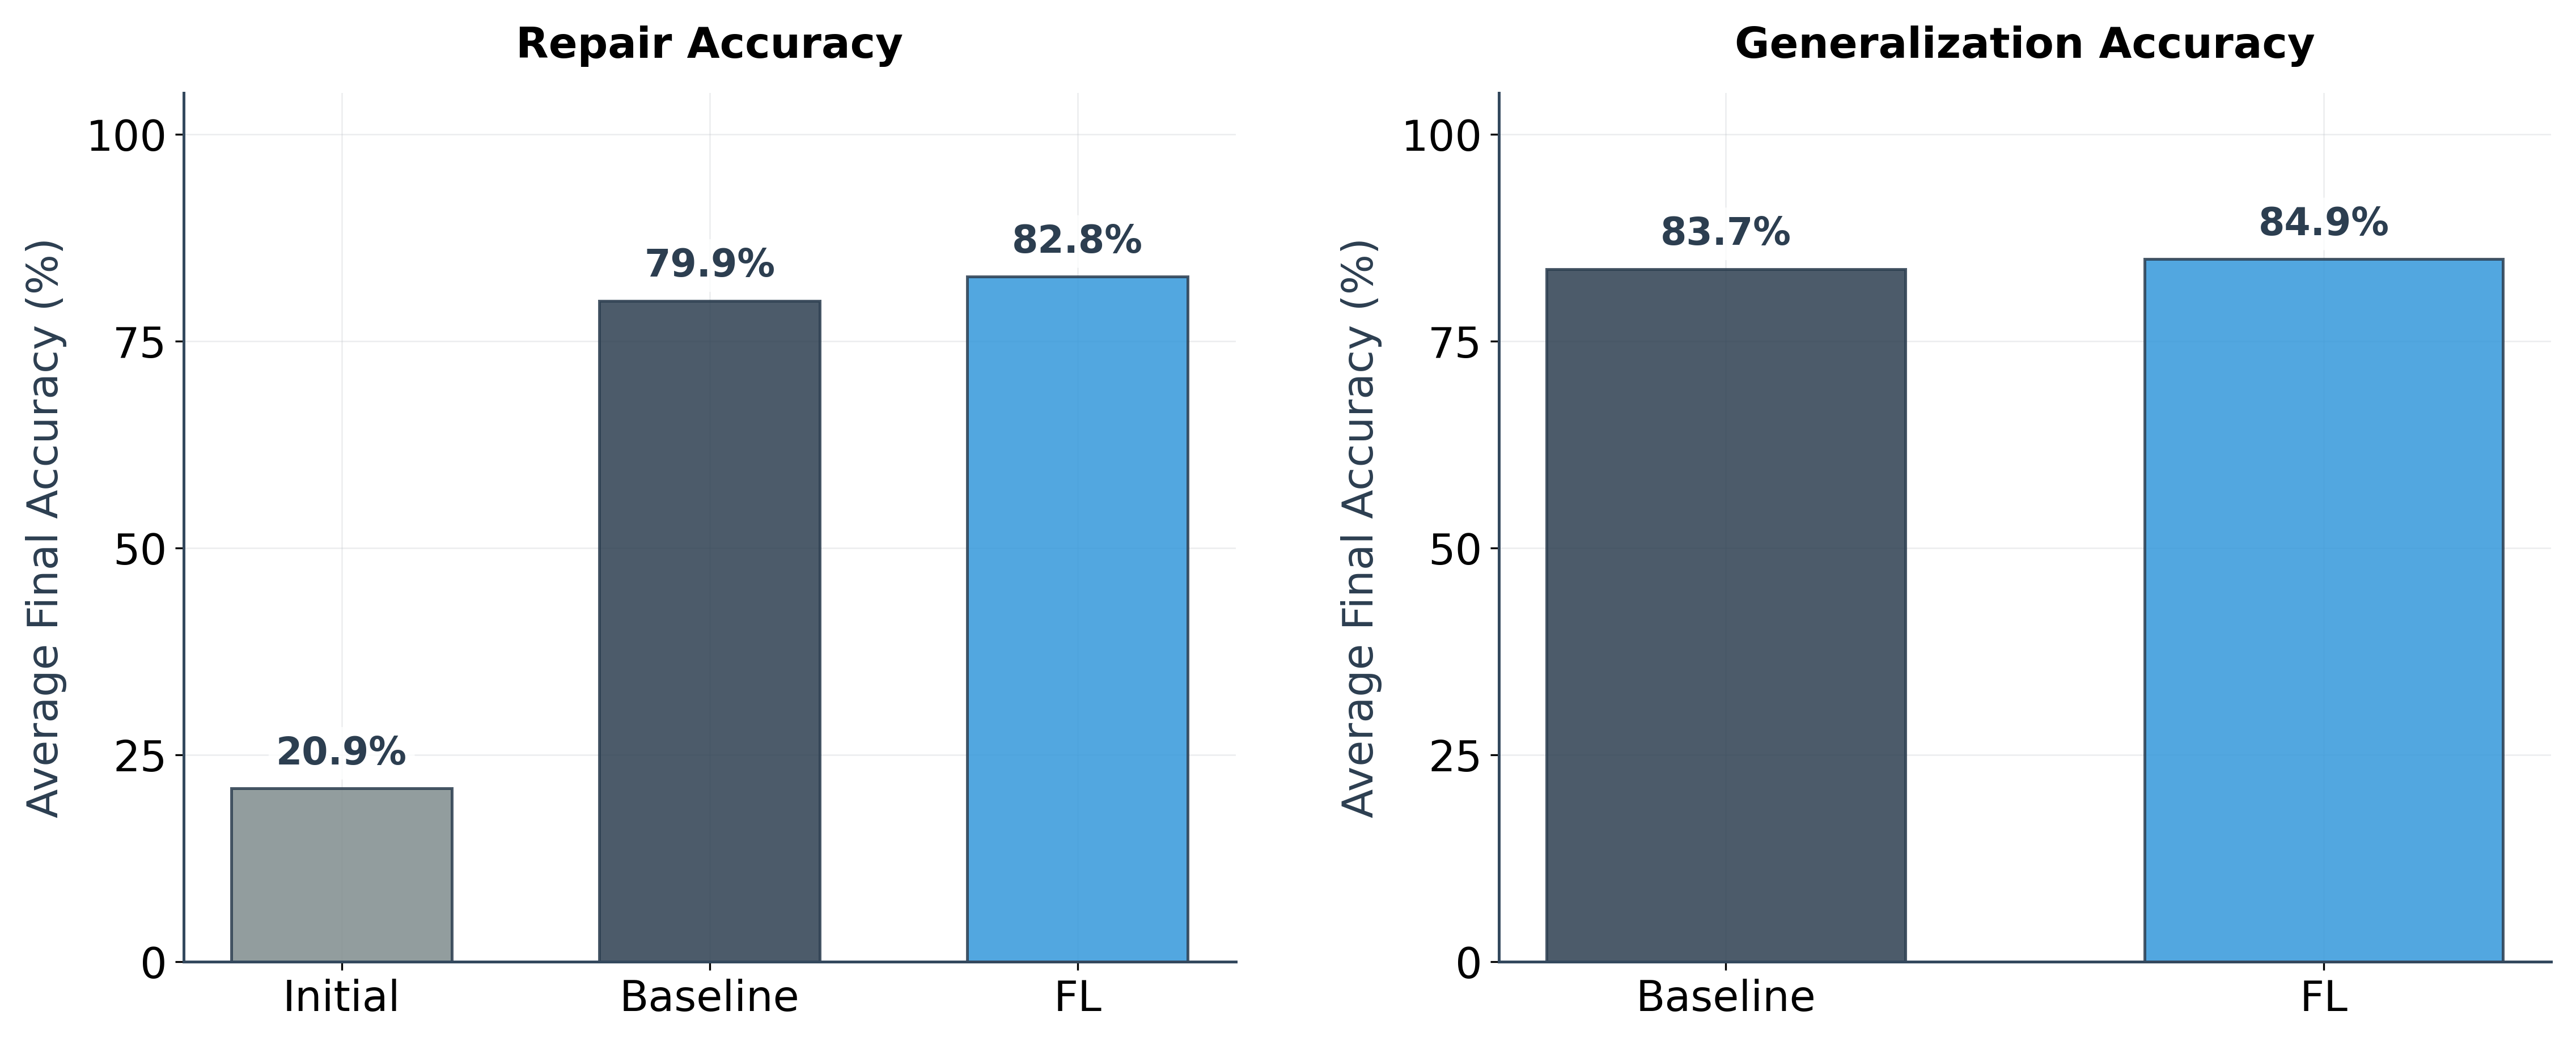


Visualization complete!
Generated figures:
  • generalization_comparison.png/pdf (2-panel view)


In [25]:
#!/usr/bin/env python3
"""
Generalization Experiment Visualization for Policy Repair

Academic Publication: "Counter-Example Guided Policy Repair for Cloud Security"
Shows generalization to related requests without timing analysis.
"""

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import json

# Professional academic color palette (matching your style)
# OPTION 1: KEEP CONSISTENT (Recommended for same methods across figures)
ACADEMIC_COLORS_CONSISTENT = {
    'navy_blue': '#2C3E50',  # Baseline method
    'steel_blue': '#34495E',
    'emerald': '#27AE60',
    'orange': '#3498DB',
    'red': '#C0392B',
    'gray': '#7F8C8D',       # Initial policy
    'light_gray': '#BDC3C7',
    'white': '#FFFFFF',
    'black': '#2C3E50',
    'grid': '#ECF0F1',
    'teal': '#16A085',
    'dark_gray': '#34495E',
    'success': '#2ECC71',
    'blue': '#3498DB',       # Your FL method
}

# OPTION 2: COMPLEMENTARY PALETTE (If signaling different experiment type)
ACADEMIC_COLORS_ALT = {
    'navy_blue': '#5D4E6D',  # Deeper purple-blue for baseline
    'steel_blue': '#34495E',
    'emerald': '#27AE60',
    'orange': '#E67E22',     # Warmer orange
    'red': '#C0392B',
    'gray': '#95A5A6',       # Lighter gray for initial
    'light_gray': '#BDC3C7',
    'white': '#FFFFFF',
    'black': '#2C3E50',
    'grid': '#ECF0F1',
    'teal': '#1ABC9C',       # Brighter teal for your method
    'dark_gray': '#34495E',
    'success': '#2ECC71',
    'blue': '#1ABC9C',       # Teal for your FL method (distinguishes from other figs)
}

# OPTION 3: WARMER PALETTE (Professional alternative)
ACADEMIC_COLORS_WARM = {
    'navy_blue': '#34495E',  # Dark blue-gray for baseline
    'steel_blue': '#34495E',
    'emerald': '#27AE60',
    'orange': '#E67E22',
    'red': '#C0392B',
    'gray': '#95A5A6',       # Neutral gray for initial
    'light_gray': '#BDC3C7',
    'white': '#FFFFFF',
    'black': '#2C3E50',
    'grid': '#ECF0F1',
    'teal': '#16A085',
    'dark_gray': '#34495E',
    'success': '#27AE60',    # Green for improvement
    'blue': '#27AE60',       # Green for your method (success theme)
}

# SELECT YOUR PALETTE HERE:
ACADEMIC_COLORS = ACADEMIC_COLORS_CONSISTENT  # Change to _ALT or _WARM if desired

def configure_publication_style():
    """Configure matplotlib for publication-quality figures"""
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 18,
        'axes.labelsize': 18,
        'axes.titlesize': 18,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        'legend.fontsize': 18,
        'figure.titlesize': 18,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif'],
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.15,
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.linewidth': 1.2,
        'axes.edgecolor': ACADEMIC_COLORS['steel_blue'],
        'axes.labelcolor': ACADEMIC_COLORS['black'],
        'axes.axisbelow': True,
        'axes.labelpad': 8,
        'axes.grid': True,
        'grid.alpha': 0.25,
        'grid.linewidth': 0.6,
        'grid.color': ACADEMIC_COLORS['light_gray'],
        'lines.linewidth': 2.5,
        'lines.markersize': 8,
        'lines.markeredgewidth': 1.5,
        'text.usetex': False,
    })


class GeneralizationVisualizer:
    """Visualizer for policy repair generalization experiment"""
    
    def __init__(self):
        configure_publication_style()
        self.colors = ACADEMIC_COLORS
    
    def calculate_overall_accuracies(self, data):
        """Calculate overall baseline and peak accuracies across all iterations"""
        all_policies = list(data['policy_iterations'].keys())
        total_baseline = 0.0
        total_peak = 0.0
        
        for pid in all_policies:
            policy_data = data['policy_iterations'][pid]
            baseline_acc = policy_data.get("baseline_accuracy", 0.0)
            iteration_accs = policy_data.get("iteration_accuracies", [])
            peak_acc = max(iteration_accs) if iteration_accs else policy_data.get("final_accuracy", baseline_acc)
            total_baseline += baseline_acc
            total_peak += peak_acc
        
        avg_baseline = total_baseline / len(all_policies)
        avg_peak = total_peak / len(all_policies)
        
        return avg_baseline, avg_peak, len(all_policies)
    
    def calculate_testing_accuracies(self, data, method_name='baseline'):
        """Calculate testing/generalization accuracies across all policies
        
        Args:
            data: JSON data with policy iterations
            method_name: 'baseline' or 'fl' to identify which method this is
        """
        all_policies = list(data['policy_iterations'].keys())
        
        # Check if test accuracy fields exist in the data
        sample_policy = data['policy_iterations'][all_policies[0]]
        has_test_fields = any(key.endswith('test_accuracy') for key in sample_policy.keys())
        
        if has_test_fields:
            # If test accuracy fields exist, calculate from data
            total_initial_test = 0.0
            total_final_test = 0.0
            
            for pid in all_policies:
                policy_data = data['policy_iterations'][pid]
                initial_test = policy_data.get("initial_test_accuracy", 0.0)
                final_test = policy_data.get("final_test_accuracy", 0.0)
                
                total_initial_test += initial_test
                total_final_test += final_test
            
            avg_initial_test = total_initial_test / len(all_policies)
            avg_final_test = total_final_test / len(all_policies)
            
            return avg_initial_test, avg_final_test
        else:
            # Use provided test accuracy values
            # Baseline: 75.6%, FL: 79.0%
            if method_name == 'baseline':
                # For baseline, assume initial test = baseline test
                return 75.6, 83.7
            else:  # fl
                return 75.6, 84.9
    
    def _create_accuracy_comparison_plot(self, ax, initial_accuracy, baseline_accuracy, 
                                        fl_accuracy, sample_size, show_ylabel=True):
        """Create professional accuracy comparison bar plot"""
        
        method_colors = {
            'initial': self.colors['gray'],
            'baseline': self.colors['navy_blue'],
            'fl': self.colors['blue'],
        }
        
        methods = ['Initial', 'Baseline', 'FL']
        accuracies = [initial_accuracy, baseline_accuracy, fl_accuracy]
        colors = [method_colors['initial'], method_colors['baseline'], method_colors['fl']]
        
        x_positions = np.arange(len(methods))
        bar_width = 0.6
        
        bars = ax.bar(x_positions, accuracies, bar_width, 
                     color=colors, alpha=0.85, 
                     edgecolor=self.colors['navy_blue'], linewidth=1.2)
        
        # Add value labels on bars
        for i, (bar, value) in enumerate(zip(bars, accuracies)):
            ax.text(bar.get_x() + bar.get_width()/2, value + 2,
                   f'{value:.1f}%', ha='center', va='bottom',
                   fontsize=16, fontweight='bold', color=self.colors['black'],
                   bbox=dict(boxstyle="round,pad=0.2", facecolor=self.colors['white'], 
                           edgecolor='none', alpha=0.8))
        
        ax.set_title(f'Repair Accuracy', 
                    fontsize=18, fontweight='bold', pad=15)
        if show_ylabel:
            ax.set_ylabel('Average Final Accuracy (%)', fontweight='medium', fontsize=18)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(methods, fontsize=18)
        ax.set_ylim(0, 105)
        
        ax.grid(True, alpha=0.3, linestyle='-', zorder=0)
        ax.set_yticks([0, 25, 50, 75, 100])
        
        for spine in ax.spines.values():
            spine.set_color(self.colors['steel_blue'])
            spine.set_linewidth(1.2)
    
    def _create_testing_accuracy_plot(self, ax, baseline_accuracy, fl_accuracy, show_ylabel=True):
        """Create testing/generalization accuracy comparison plot"""
        
        method_colors = {
            'baseline': self.colors['navy_blue'],
            'fl': self.colors['blue'],
        }
        
        methods = ['Baseline', 'FL']
        accuracies = [baseline_accuracy, fl_accuracy]
        colors = [method_colors['baseline'], method_colors['fl']]
        
        x_positions = np.arange(len(methods))
        bar_width = 0.6
        
        bars = ax.bar(x_positions, accuracies, bar_width, 
                     color=colors, alpha=0.85, 
                     edgecolor=self.colors['navy_blue'], linewidth=1.2)
        
        # Add value labels on bars
        for i, (bar, value) in enumerate(zip(bars, accuracies)):
            ax.text(bar.get_x() + bar.get_width()/2, value + 2,
                   f'{value:.1f}%', ha='center', va='bottom',
                   fontsize=16, fontweight='bold', color=self.colors['black'],
                   bbox=dict(boxstyle="round,pad=0.2", facecolor=self.colors['white'], 
                           edgecolor='none', alpha=0.8))
        
        ax.set_title('Generalization Accuracy', 
                    fontsize=18, fontweight='bold', pad=15)
        if show_ylabel:
            ax.set_ylabel('Average Final Accuracy (%)', fontweight='medium', fontsize=18)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(methods, fontsize=18)
        ax.set_ylim(0, 105)
        
        ax.grid(True, alpha=0.3, linestyle='-', zorder=0)
        ax.set_yticks([0, 25, 50, 75, 100])
        
        for spine in ax.spines.values():
            spine.set_color(self.colors['steel_blue'])
            spine.set_linewidth(1.2)
    
    def create_generalization_comparison(self, fl_file: str, baseline_file: str):
        """Create publication-quality generalization comparison"""
        
        # Load data
        with open(fl_file, 'r') as f:
            fl_data = json.load(f)
        with open(baseline_file, 'r') as f:
            baseline_data = json.load(f)
        
        # Calculate training metrics
        baseline_initial_train, baseline_final_train, n_policies = self.calculate_overall_accuracies(baseline_data)
        fl_initial_train, fl_final_train, _ = self.calculate_overall_accuracies(fl_data)
        
        # Calculate testing metrics
        baseline_initial_test, baseline_final_test = self.calculate_testing_accuracies(baseline_data, 'baseline')
        fl_initial_test, fl_final_test = self.calculate_testing_accuracies(fl_data, 'fl')
        
        # Create figure with 2 subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
        fig.subplots_adjust(wspace=0.25)
        
        # Left: Training accuracy comparison
        self._create_accuracy_comparison_plot(
            ax1, baseline_initial_train, baseline_final_train, fl_final_train, n_policies, show_ylabel=True
        )
        
        # Right: Testing accuracy comparison (only Baseline and Policy Repair)
        self._create_testing_accuracy_plot(
            ax2, baseline_final_test, fl_final_test, show_ylabel=True
        )
        
        fig.subplots_adjust(left=0.08, bottom=0.15, right=0.95, top=0.88)
        
        return fig


def safe_figure(fig: plt.Figure, filename: str):
    """Save figure with high quality settings"""
    fig.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.1)
    print(f"Figure saved as {filename}")


def main():
    print("Generating generalization experiment visualization...")
    
    visualizer = GeneralizationVisualizer()
    
    # Update these paths to your actual files
    fl_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/generalizability/fl.json"  # Your FL results
    baseline_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/generalizability/baseline.json"  
    
    # Create 2-panel comparison
    fig_comparison = visualizer.create_generalization_comparison(fl_file, baseline_file)
    safe_figure(fig_comparison, 'figures/generalization_comparison.png')
    safe_figure(fig_comparison, 'figures/generalization_comparison.pdf')
    
    plt.show()
    
    print("\n" + "="*60)
    print("Visualization complete!")
    print("="*60)
    print("Generated figures:")
    print("  • generalization_comparison.png/pdf (2-panel view)")
    print("="*60)


if __name__ == "__main__":
    main()

Generating multi-configuration policy repair accuracy visualization (no timing)...


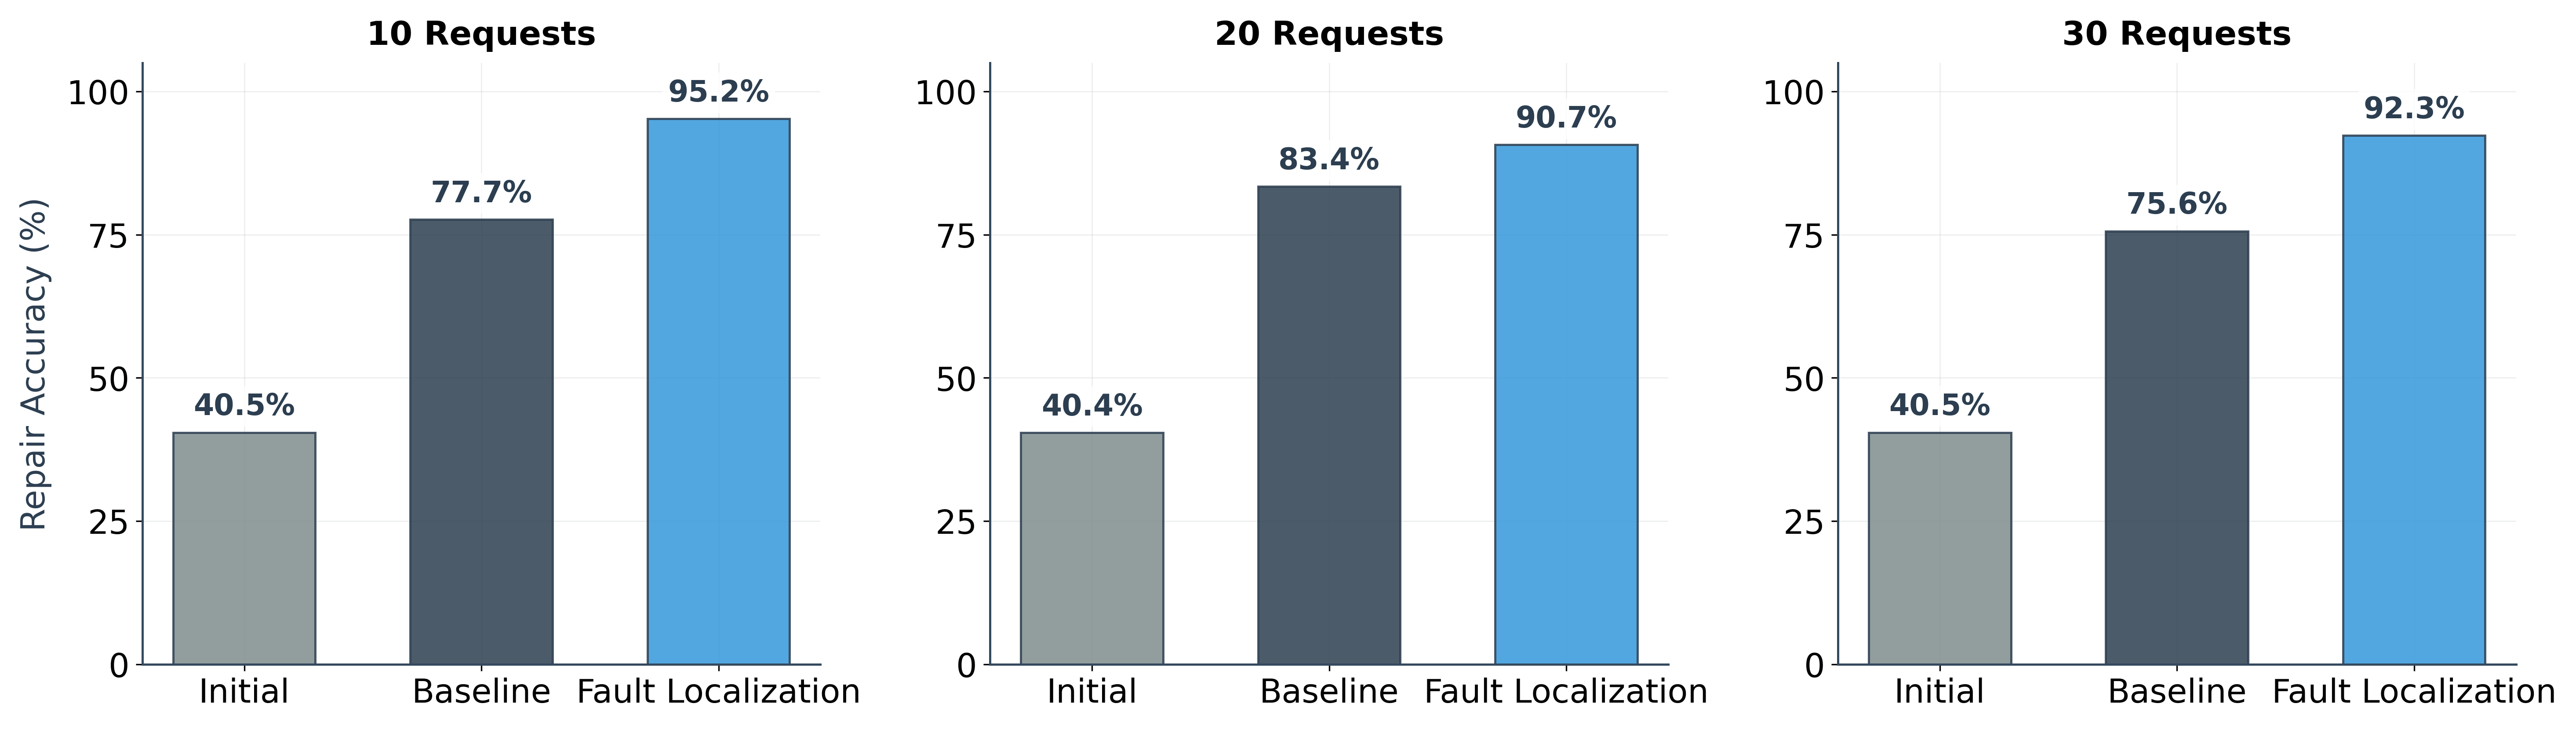

Figure saved as figures/closed_model-accuracy_only.png
✅ Accuracy-only figure generated and saved to figures/closed_model-accuracy_only.png
Shows accuracy comparisons for 10, 20, 30 requests (no timing plots)
Figure saved as figures/closed_model-accuracy_only.png


In [45]:
#!/usr/bin/env python3
"""
Enhanced Visualization for Policy Repair Method Comparison

This module creates publication-quality visualizations for comparing different
policy repair methodologies in cloud security research. The visualizations
are designed to meet academic conference standards with professional styling,
clear data presentation, and appropriate statistical annotations.

Academic Publication: "Counter-Example Guided Policy Repair for Cloud Security"
"""

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import numpy as np
from typing import Dict, List, Tuple, Optional
from dataclasses import dataclass
import seaborn as sns
import json

# Professional academic color palette
ACADEMIC_COLORS = {
    'navy_blue': '#2C3E50',      # Primary dark blue
    'steel_blue': '#34495E',     # Secondary dark blue
    'emerald': '#27AE60',        # Success/improvement green
    'orange': '#3498DB',         # Counter-example method
    'red': '#C0392B',            # FL method
    'gray': '#7F8C8D',           # Baseline/initial
    'light_gray': '#BDC3C7',    # Background elements
    'white': '#FFFFFF',          # Background
    'black': '#2C3E50',          # Text
    'grid': '#ECF0F1',           # Grid lines
    'teal': '#16A085',           # Teal color
    'dark_gray': '#34495E',      # Darker gray
    'success': '#2ECC71',        # Success indicator
    'blue': '#3498DB',           # New blue color
}

# Publication-quality matplotlib configuration
def configure_publication_style():
    """Configure matplotlib for publication-quality figures"""
    plt.style.use('default')
    plt.rcParams.update({
        # Font settings
        'font.size': 18,
        'axes.labelsize': 18,
        'axes.titlesize': 18,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        'legend.fontsize': 18,
        'figure.titlesize': 18,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif'],
        
        # Figure settings
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'figure.dpi': 300,
        'figure.autolayout': False,
        'savefig.dpi': 300,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.15,
        
        # Axes settings
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.linewidth': 1.2,
        'axes.edgecolor': ACADEMIC_COLORS['steel_blue'],
        'axes.labelcolor': ACADEMIC_COLORS['black'],
        'axes.axisbelow': True,
        'axes.labelpad': 8,
        
        # Grid settings
        'axes.grid': True,
        'grid.alpha': 0.25,
        'grid.linewidth': 0.6,
        'grid.color': ACADEMIC_COLORS['light_gray'],
        
        # Line settings for time plots
        'lines.linewidth': 2.5,
        'lines.markersize': 8,
        'lines.markeredgewidth': 1.5,
        
        # Other settings
        'text.usetex': False,
    })


@dataclass
class ExperimentResult:
    """Data structure for experimental results"""
    name: str
    initial_accuracy: float
    final_accuracy: float
    sample_size: int
    method_type: str
    execution_times: Optional[List[float]] = None
    
    @property
    def improvement(self) -> float:
        return self.final_accuracy - self.initial_accuracy
    
    @property
    def relative_improvement(self) -> float:
        return (self.final_accuracy - self.initial_accuracy) / self.initial_accuracy * 100


class PolicyRepairVisualizer:
    """Publication-quality visualizer for policy repair method comparison"""
    
    def __init__(self, baseline_file: str = None, counter_example_file: str = None, fault_localization_file: str = None):
        configure_publication_style()
        self.colors = ACADEMIC_COLORS
        self.baseline_data = None
        self.counter_example_data = None
        self.fault_localization_data = None
        
        if baseline_file:
            self.load_baseline_data(baseline_file)
        if counter_example_file:
            self.load_counter_example_data(counter_example_file)
        if fault_localization_file:
            self.load_fault_localization_data(fault_localization_file)
    
    def load_baseline_data(self, data_file: str):
        """Load baseline experimental data from JSON file"""
        with open(data_file, 'r') as f:
            self.baseline_data = json.load(f)
    
    def load_counter_example_data(self, data_file: str):
        """Load counter-example experimental data from JSON file"""
        with open(data_file, 'r') as f:
            self.counter_example_data = json.load(f)
    
    def load_fault_localization_data(self, data_file: str):
        """Load fault localization experimental data from JSON file"""
        with open(data_file, 'r') as f:
            self.fault_localization_data = json.load(f)
    
    def calculate_overall_accuracies(self, data):
        """Calculate overall baseline and peak accuracies across all iterations."""
        all_policies = list(data['policy_iterations'].keys())

        total_baseline = 0.0
        total_peak = 0.0

        for pid in all_policies:
            policy_data = data['policy_iterations'][pid]
            baseline_acc = policy_data.get("baseline_accuracy", 0.0)
            iteration_accs = policy_data.get("iteration_accuracies", [])
            # Use max of iteration_accuracies if available, else fall back to final_accuracy
            peak_acc = max(iteration_accs) if iteration_accs else policy_data.get("final_accuracy", baseline_acc)
            total_baseline += baseline_acc
            total_peak += peak_acc

        avg_baseline = total_baseline / len(all_policies)
        avg_peak = total_peak / len(all_policies)

        return avg_baseline, avg_peak, len(all_policies)
    
    def _create_accuracy_comparison_plot(self, ax, initial_accuracy, baseline_accuracy, 
                                       fault_localization_accuracy, sample_size):
        """Create professional accuracy comparison bar plot"""
        
        # Define method colors
        method_colors = {
            'initial': self.colors['gray'],
            'baseline': self.colors['navy_blue'],
            'fault_localization': self.colors['blue'],
        }
        
        # Data for plotting
        methods = ['Initial', 'Baseline', 'Fault Localization']
        accuracies = [initial_accuracy, baseline_accuracy, fault_localization_accuracy]
        colors = [method_colors['initial'], method_colors['baseline'], 
                 method_colors['fault_localization']]
        
        # Bar positions and styling
        x_positions = np.arange(len(methods))
        bar_width = 0.6
        
        # Create enhanced bars with gradient effect
        bars = ax.bar(x_positions, accuracies, bar_width, 
                     color=colors, alpha=0.85, 
                     edgecolor=self.colors['navy_blue'], linewidth=1.2)
        
        # Add value labels on bars with enhanced styling
        for i, (bar, value) in enumerate(zip(bars, accuracies)):
            ax.text(bar.get_x() + bar.get_width()/2, value + 2,
                   f'{value:.1f}%', ha='center', va='bottom',
                   fontsize=16, fontweight='bold', color=self.colors['black'],
                   bbox=dict(boxstyle="round,pad=0.2", facecolor=self.colors['white'], 
                           edgecolor='none', alpha=0.8))
        
    
        ax.set_ylabel('Repair Accuracy (%)', fontweight='medium', fontsize=18)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(methods, fontsize=18)
        ax.set_ylim(0, 105)
        
        # Professional grid styling
        ax.grid(True, alpha=0.3, linestyle='-', zorder=0)
        ax.set_yticks([0, 25, 50, 75, 100])
        
        # Clean up spines
        for spine in ax.spines.values():
            spine.set_color(self.colors['steel_blue'])
            spine.set_linewidth(1.2)
    
    def create_multi_config_accuracy_only(self, configs):
        """
        Create a single-row publication-quality comparison figure showing:
        Accuracy comparison for 10, 20, 30 requests (NO timing plots)
        """
        fig, axes = plt.subplots(1, len(configs), figsize=(20, 6))
        fig.subplots_adjust(wspace=0.25)

        for col, (label, base_file, fl_file) in enumerate(configs):
            # Load data
            with open(base_file) as f:
                baseline_data = json.load(f)
            with open(fl_file) as f:
                fl_data = json.load(f)

            # ==== ACCURACY ONLY ====
            ax_acc = axes[col]
            baseline_init, baseline_final, _ = self.calculate_overall_accuracies(baseline_data)
            _, fl_final, _ = self.calculate_overall_accuracies(fl_data)

            self._create_accuracy_comparison_plot(
                ax_acc, baseline_init, baseline_final, fl_final, sample_size=None
            )
            ax_acc.set_title(f"{label} Requests", fontsize=18, fontweight="bold", pad=10)
            if col == 0:
                ax_acc.set_ylabel("Repair Accuracy (%)", fontsize=18, fontweight="medium")
            else:
                ax_acc.set_ylabel("")

        # Unified layout (no legend)
        fig.subplots_adjust(left=0.08, right=0.98, bottom=0.12, top=0.88, wspace=0.25)

        return fig


def main():
    print("Generating multi-configuration policy repair accuracy visualization (no timing)...")

    visualizer = PolicyRepairVisualizer()

    configs = [
        ("10",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_10.json",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_10.json"),
        ("20",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_20.json",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_20.json"),
        ("30",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_30.json",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_30.json"),
    ]

    # Generate figure (accuracy only)
    multi_fig = visualizer.create_multi_config_accuracy_only(configs)

    plt.show()
    safe_figure(multi_fig, 'figures/closed_model-accuracy_only.png')

    print("✅ Accuracy-only figure generated and saved to figures/closed_model-accuracy_only.png")
    print("Shows accuracy comparisons for 10, 20, 30 requests (no timing plots)")

    return multi_fig


def safe_figure(fig: plt.Figure, filename: str):
    """Save figure with high quality settings"""
    fig.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.1)
    print(f"Figure saved as {filename}")


if __name__ == "__main__":
    accuracy_fig = main()
    safe_figure(accuracy_fig, 'figures/closed_model-accuracy_only.png')

Policy Repair Accuracy Visualization

Generating multi-configuration accuracy comparison...


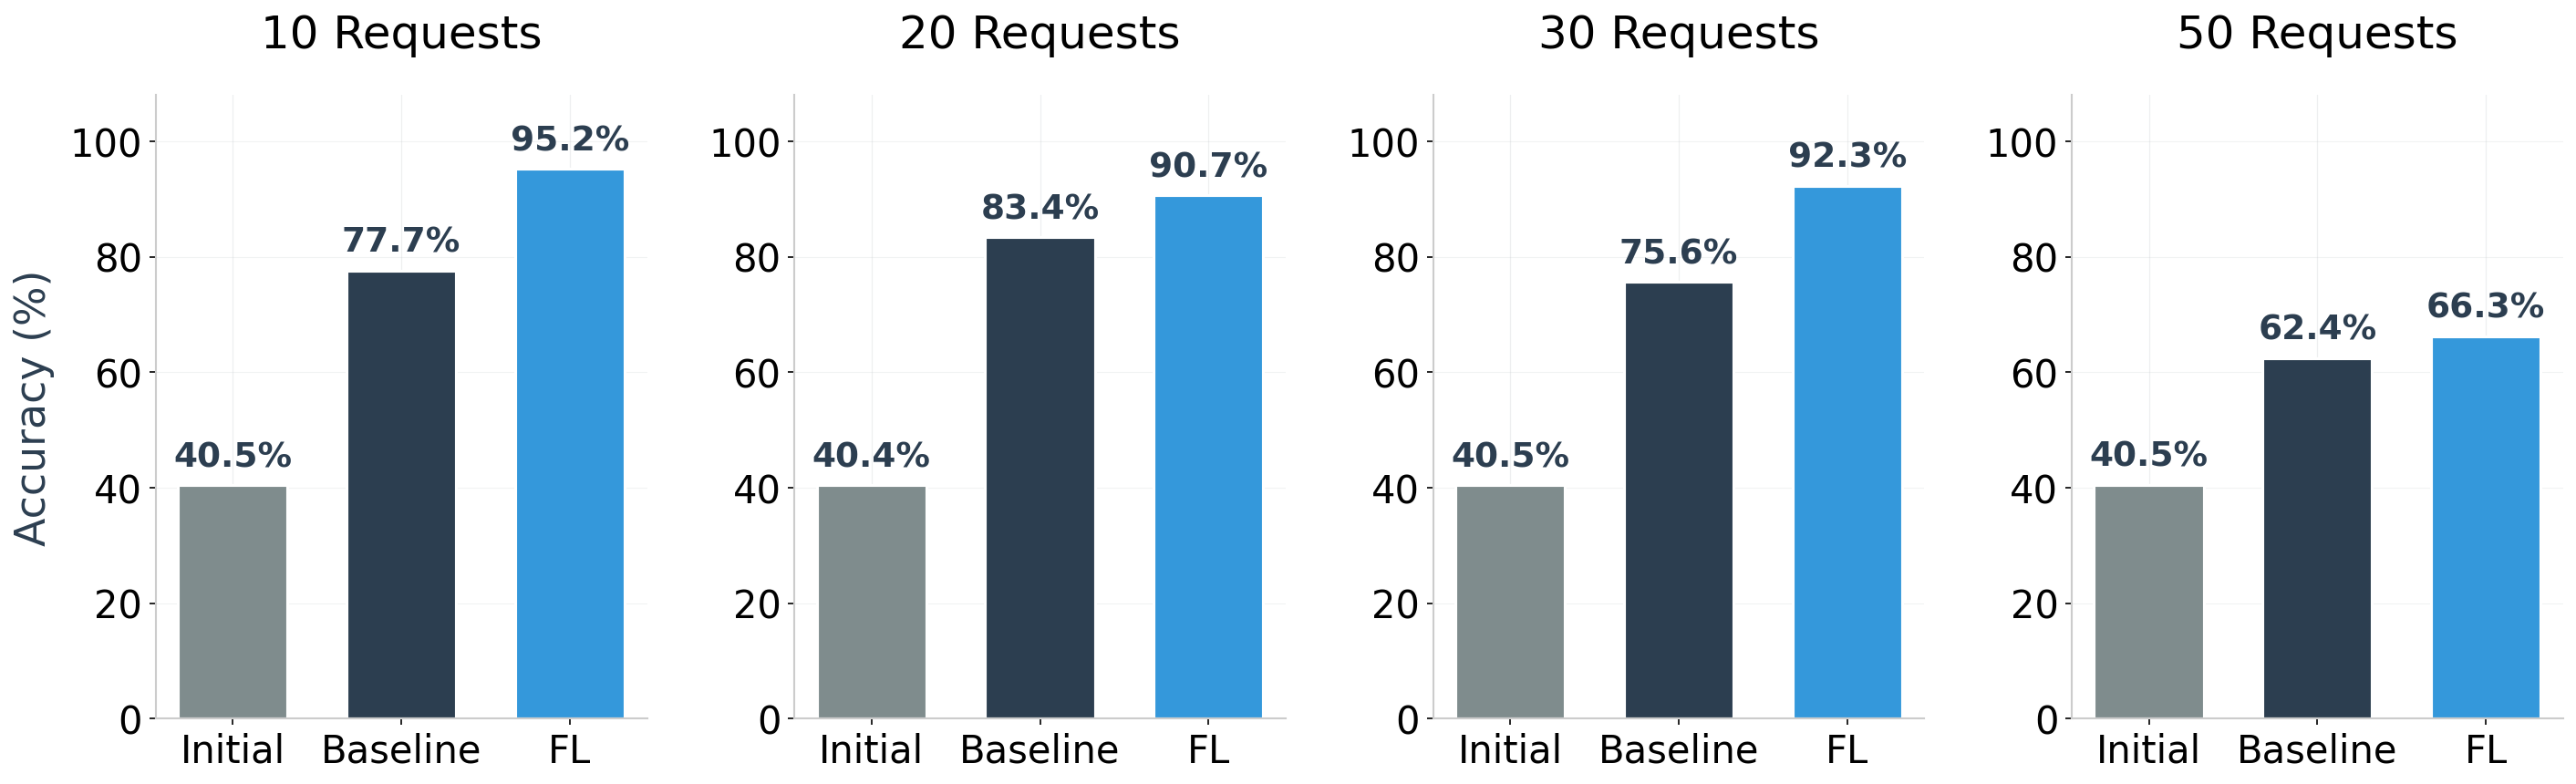

Figure saved as figures/closed_model-accuracy_consistent_style.png
Figure saved as figures/closed_model-accuracy_consistent_style.pdf

Visualization complete!


In [4]:
#!/usr/bin/env python3
"""
Enhanced Visualization for Policy Repair Method Comparison
Updated with consistent styling from the second visualization
"""

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import numpy as np
from typing import Dict, List, Tuple, Optional
from dataclasses import dataclass
import seaborn as sns
import json

# Professional academic color palette (from second code)
ACADEMIC_COLORS = {
    'navy_blue': '#2C3E50',      # Baseline
    'blue': '#3498DB',           # FL
    'gray': '#7F8C8D',           # Initial
    'light_gray': '#BDC3C7',
    'white': '#FFFFFF',
    'black': '#2C3E50',
    'steel_blue': '#34495E',
    'accent_green': '#27AE60'
}

# Publication-quality matplotlib configuration (from second code)
def configure_publication_style():
    """Configure matplotlib for publication-quality figures"""
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 20,
        'axes.labelsize': 22,
        'axes.titlesize': 24,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 20,
        'figure.titlesize': 24,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif'],
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'figure.dpi': 150,
        'savefig.dpi': 600,
        'savefig.bbox': 'tight',
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.linewidth': 1.2,
        'axes.edgecolor': ACADEMIC_COLORS['steel_blue'],
        'axes.labelcolor': ACADEMIC_COLORS['black'],
        'axes.axisbelow': True,
        'axes.labelpad': 8,
        'axes.grid': True,
        'grid.alpha': 0.25,
        'grid.linewidth': 0.6,
        'grid.color': ACADEMIC_COLORS['light_gray'],
        'lines.linewidth': 2.5,
        'lines.markersize': 8,
        'lines.markeredgewidth': 1.5,
        'text.usetex': False,
    })


@dataclass
class ExperimentResult:
    """Data structure for experimental results"""
    name: str
    initial_accuracy: float
    final_accuracy: float
    sample_size: int
    method_type: str
    execution_times: Optional[List[float]] = None
    
    @property
    def improvement(self) -> float:
        return self.final_accuracy - self.initial_accuracy
    
    @property
    def relative_improvement(self) -> float:
        return (self.final_accuracy - self.initial_accuracy) / self.initial_accuracy * 100


class PolicyRepairVisualizer:
    """Publication-quality visualizer for policy repair method comparison"""
    
    def __init__(self, baseline_file: str = None, counter_example_file: str = None, fault_localization_file: str = None):
        configure_publication_style()
        self.colors = ACADEMIC_COLORS
        self.baseline_data = None
        self.counter_example_data = None
        self.fault_localization_data = None
        
        if baseline_file:
            self.load_baseline_data(baseline_file)
        if counter_example_file:
            self.load_counter_example_data(counter_example_file)
        if fault_localization_file:
            self.load_fault_localization_data(fault_localization_file)
    
    def load_baseline_data(self, data_file: str):
        """Load baseline experimental data from JSON file"""
        with open(data_file, 'r') as f:
            self.baseline_data = json.load(f)
    
    def load_counter_example_data(self, data_file: str):
        """Load counter-example experimental data from JSON file"""
        with open(data_file, 'r') as f:
            self.counter_example_data = json.load(f)
    
    def load_fault_localization_data(self, data_file: str):
        """Load fault localization experimental data from JSON file"""
        with open(data_file, 'r') as f:
            self.fault_localization_data = json.load(f)
    
    def calculate_overall_accuracies(self, data):
        """Calculate overall baseline and peak accuracies across all iterations."""
        all_policies = list(data['policy_iterations'].keys())

        total_baseline = 0.0
        total_peak = 0.0

        for pid in all_policies:
            policy_data = data['policy_iterations'][pid]
            baseline_acc = policy_data.get("baseline_accuracy", 0.0)
            iteration_accs = policy_data.get("iteration_accuracies", [])
            # Use max of iteration_accuracies if available, else fall back to final_accuracy
            peak_acc = max(iteration_accs) if iteration_accs else policy_data.get("final_accuracy", baseline_acc)
            total_baseline += baseline_acc
            total_peak += peak_acc

        avg_baseline = total_baseline / len(all_policies)
        avg_peak = total_peak / len(all_policies)

        return avg_baseline, avg_peak, len(all_policies)
    
    def _create_accuracy_comparison_plot(self, ax, initial_accuracy, baseline_accuracy, 
                                       fault_localization_accuracy, sample_size):
        """Create professional accuracy comparison bar plot with styling from second code"""
        
        # Using color scheme from second code
        method_colors = {
            'initial': self.colors['gray'],           # Gray for initial
            'baseline': self.colors['navy_blue'],     # Navy blue for baseline
            'fault_localization': self.colors['blue'], # Blue for FL
        }
        
        # Data for plotting
        methods = ['Initial', 'Baseline', 'FL']
        accuracies = [initial_accuracy, baseline_accuracy, fault_localization_accuracy]
        colors = [method_colors['initial'], method_colors['baseline'], 
                 method_colors['fault_localization']]
        
        # Bar positions and styling
        x_positions = np.arange(len(methods))
        bar_width = 0.65
        
        # Create bars with clean styling (matching second code - white edges, no black borders)
        bars = ax.bar(x_positions, accuracies, bar_width, 
                     color=colors, edgecolor='white', linewidth=1.5)
        
        # Add value labels on bars (matching second code style - no background box)
        for bar, value in zip(bars, accuracies):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 2,
                   f'{value:.1f}%', ha='center', va='bottom',
                   fontsize=18, fontweight='bold', color=self.colors['black'])
        
        # Enhanced styling matching second code
        ax.set_ylabel('Accuracy (%)', fontweight='normal', fontsize=22)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(methods, fontsize=20, fontweight='medium')
        ax.set_ylim(0, 108)
        
        # Grid styling from second code
        ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.5, axis='y')
        ax.set_axisbelow(True)
        ax.set_facecolor('#FFFFFF')
        
        # Spine styling from second code
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color('#CCCCCC')
            ax.spines[spine].set_linewidth(1)
    
    def create_multi_config_accuracy_only(self, configs):
        """
        Create a single-row publication-quality comparison figure showing:
        Accuracy comparison for 10, 20, 30 requests (NO timing plots)
        """
        # fig, axes = plt.subplots(1, len(configs), figsize=(18, 8))
        # fig.subplots_adjust(wspace=0.3)

        fig, axes = plt.subplots(1, len(configs), figsize=(20, 6))
        fig.subplots_adjust(wspace=0.25)
        
        # Set figure background to white
        fig.patch.set_facecolor('#FFFFFF')

        for col, (label, base_file, fl_file) in enumerate(configs):
            # Load data
            with open(base_file) as f:
                baseline_data = json.load(f)
            with open(fl_file) as f:
                fl_data = json.load(f)

            # ==== ACCURACY ONLY ====
            ax_acc = axes[col]
            baseline_init, baseline_final, _ = self.calculate_overall_accuracies(baseline_data)
            _, fl_final, _ = self.calculate_overall_accuracies(fl_data)

            self._create_accuracy_comparison_plot(
                ax_acc, baseline_init, baseline_final, fl_final, sample_size=None
            )
            
            # Title styling from second code
            ax_acc.set_title(f'{label} Requests', fontsize=24, fontweight='normal', pad=25)
            
            if col == 0:
                ax_acc.set_ylabel("Accuracy (%)", fontsize=22, fontweight='normal')
            else:
                ax_acc.set_ylabel("")
        # Unified layout
        fig.subplots_adjust(left=0.08, right=0.96, top=0.88, bottom=0.12, wspace=0.3)

        return fig


def main():
    print("=" * 60)
    print("Policy Repair Accuracy Visualization")
    print("=" * 60)
    print("\nGenerating multi-configuration accuracy comparison...")

    visualizer = PolicyRepairVisualizer()

    configs = [
        ("10",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_10.json",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_10.json"),
        ("20",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_20.json",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_20.json"),
        ("30",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_30.json",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_30.json"),
         ("50",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/req_50.json",
         "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/req_50.json"),
    ]

    # Generate figure (accuracy only)
    multi_fig = visualizer.create_multi_config_accuracy_only(configs)

    plt.show()
    safe_figure(multi_fig, 'figures/closed_model-accuracy_consistent_style.png')
    safe_figure(multi_fig, 'figures/closed_model-accuracy_consistent_style.pdf')

    print("\n" + "=" * 60)
    print("Visualization complete!")
    print("=" * 60)

    return multi_fig


def safe_figure(fig: plt.Figure, filename: str):
    """Save figure with high quality settings"""
    fig.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.15,
                facecolor='white', edgecolor='none')
    print(f"Figure saved as {filename}")


if __name__ == "__main__":
    accuracy_fig = main()

Generating generalization experiment visualization...
Figure saved as figures/generalization_comparison.png
Figure saved as figures/generalization_comparison.pdf


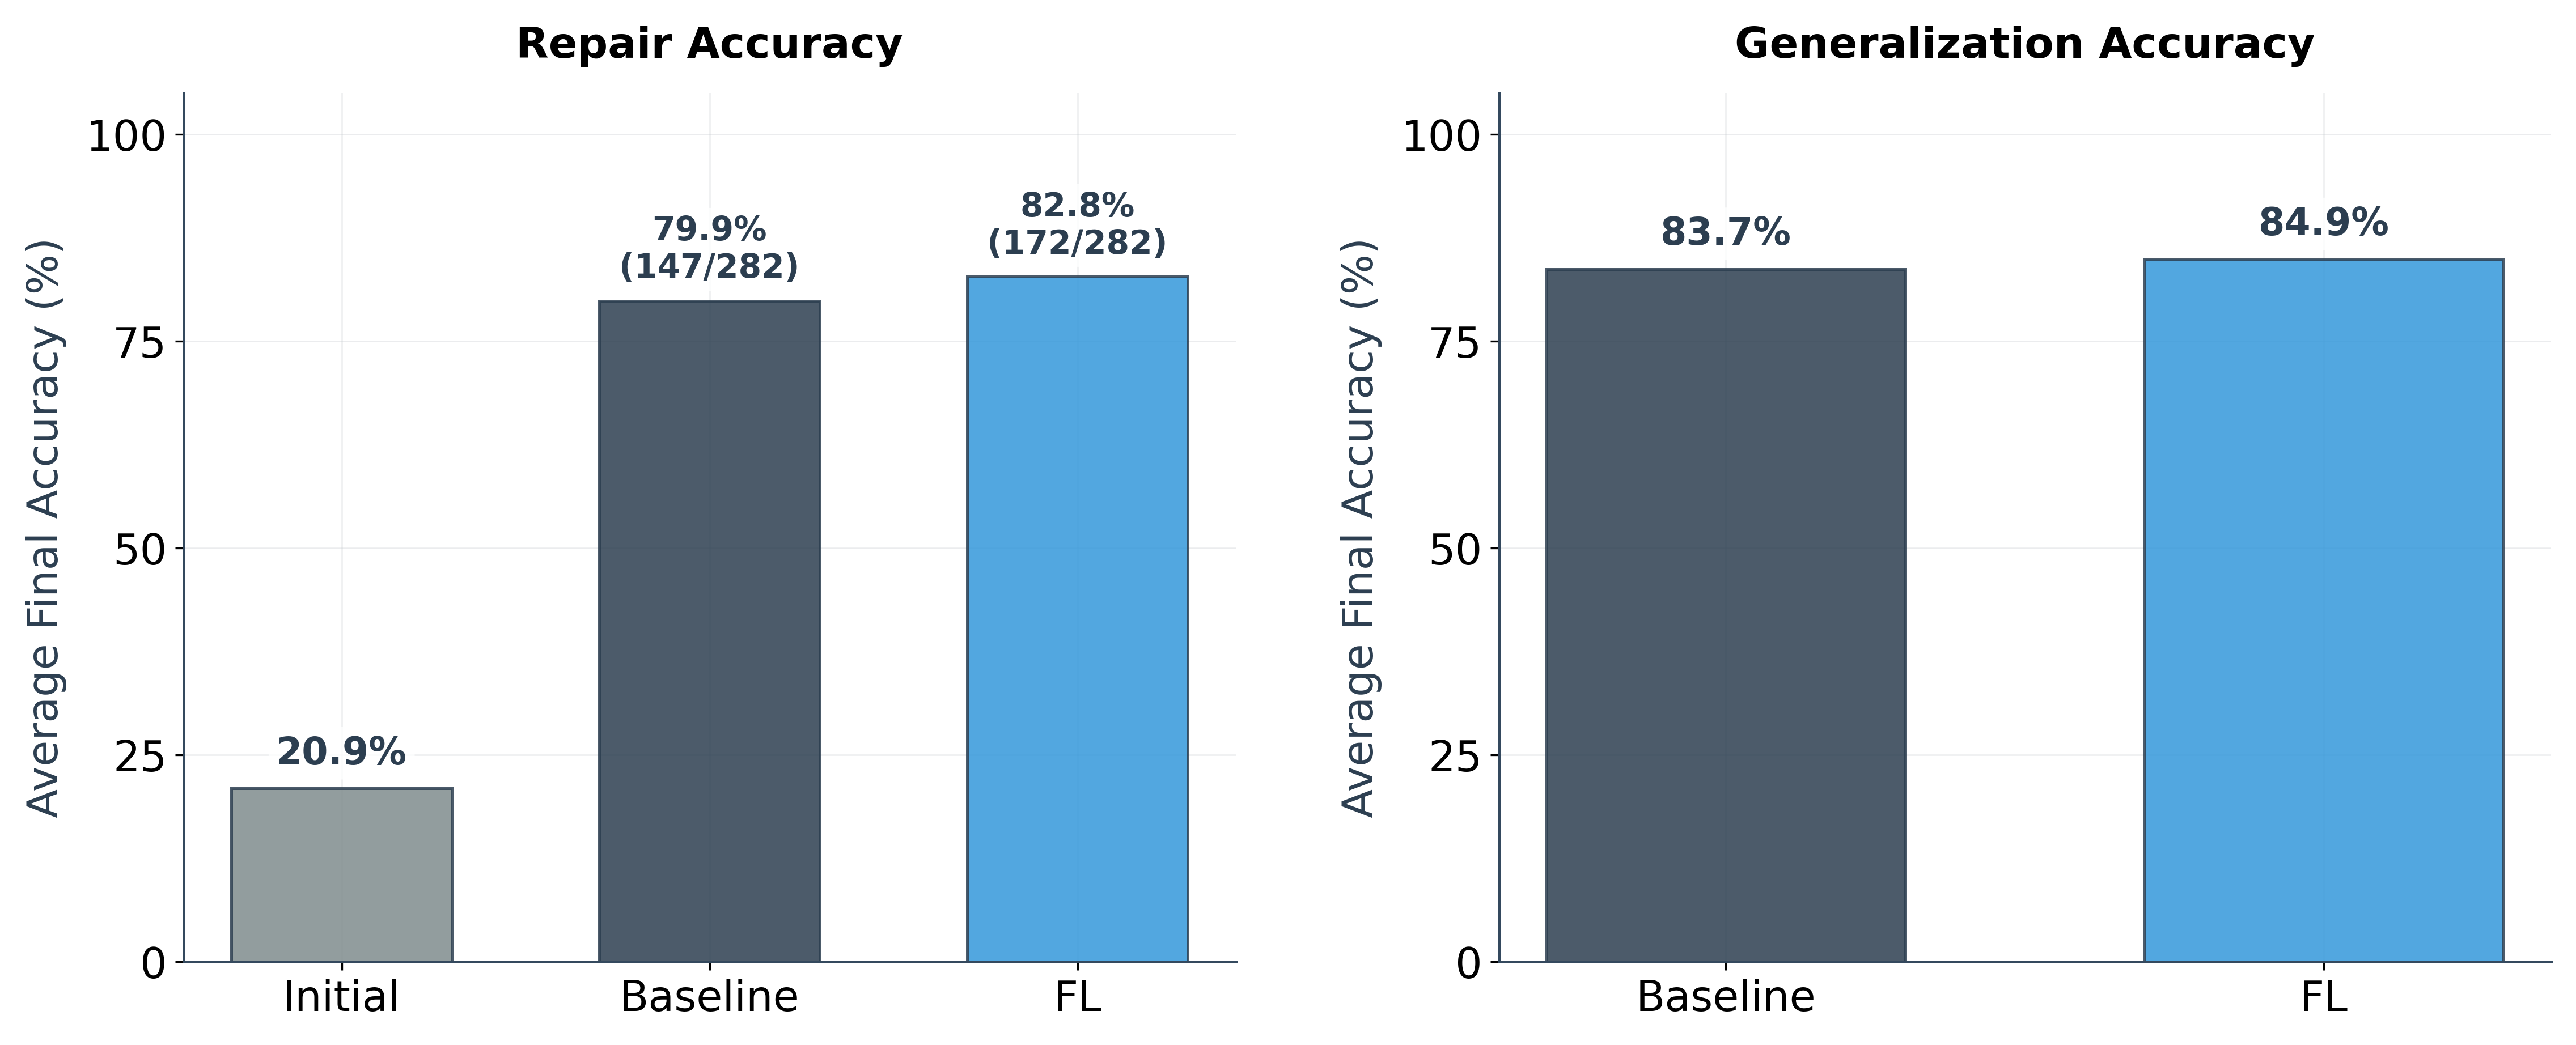


Visualization complete!
Generated figures:
  • generalization_comparison.png/pdf (2-panel view)


In [34]:
#!/usr/bin/env python3
"""
Generalization Experiment Visualization for Policy Repair

Academic Publication: "Counter-Example Guided Policy Repair for Cloud Security"
Shows generalization to related requests without timing analysis.
"""

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import json

# Professional academic color palette (matching your style)
ACADEMIC_COLORS_CONSISTENT = {
    'navy_blue': '#2C3E50',  # Baseline method
    'steel_blue': '#34495E',
    'emerald': '#27AE60',
    'orange': '#3498DB',
    'red': '#C0392B',
    'gray': '#7F8C8D',       # Initial policy
    'light_gray': '#BDC3C7',
    'white': '#FFFFFF',
    'black': '#2C3E50',
    'grid': '#ECF0F1',
    'teal': '#16A085',
    'dark_gray': '#34495E',
    'success': '#2ECC71',
    'blue': '#3498DB',       # Your FL method
}

# SELECT YOUR PALETTE HERE:
ACADEMIC_COLORS = ACADEMIC_COLORS_CONSISTENT

def configure_publication_style():
    """Configure matplotlib for publication-quality figures"""
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 18,
        'axes.labelsize': 18,
        'axes.titlesize': 18,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        'legend.fontsize': 18,
        'figure.titlesize': 18,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif'],
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.15,
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.linewidth': 1.2,
        'axes.edgecolor': ACADEMIC_COLORS['steel_blue'],
        'axes.labelcolor': ACADEMIC_COLORS['black'],
        'axes.axisbelow': True,
        'axes.labelpad': 8,
        'axes.grid': True,
        'grid.alpha': 0.25,
        'grid.linewidth': 0.6,
        'grid.color': ACADEMIC_COLORS['light_gray'],
        'lines.linewidth': 2.5,
        'lines.markersize': 8,
        'lines.markeredgewidth': 1.5,
        'text.usetex': False,
    })


class GeneralizationVisualizer:
    """Visualizer for policy repair generalization experiment"""
    
    def __init__(self):
        configure_publication_style()
        self.colors = ACADEMIC_COLORS
    
    def calculate_overall_accuracies(self, data):
        """Calculate overall baseline and peak accuracies across all iterations"""
        all_policies = list(data['policy_iterations'].keys())
        total_baseline = 0.0
        total_peak = 0.0
        count_100_percent = 0
        
        for pid in all_policies:
            policy_data = data['policy_iterations'][pid]
            baseline_acc = policy_data.get("baseline_accuracy", 0.0)
            iteration_accs = policy_data.get("iteration_accuracies", [])
            peak_acc = max(iteration_accs) if iteration_accs else policy_data.get("final_accuracy", baseline_acc)
            total_baseline += baseline_acc
            total_peak += peak_acc
            
            # Count policies that reached 100% accuracy
            if peak_acc == 100.0:
                count_100_percent += 1
        
        avg_baseline = total_baseline / len(all_policies)
        avg_peak = total_peak / len(all_policies)
        
        return avg_baseline, avg_peak, len(all_policies), count_100_percent
    
    def calculate_testing_accuracies(self, data, method_name='baseline'):
        """Calculate testing/generalization accuracies across all policies
        
        Args:
            data: JSON data with policy iterations
            method_name: 'baseline' or 'fl' to identify which method this is
        
        Returns:
            tuple: (avg_initial_test, avg_final_test, count_100_percent, total_policies)
        """
        all_policies = list(data['policy_iterations'].keys())
        count_100_percent = 0
        
        # Check if test accuracy fields exist in the data
        sample_policy = data['policy_iterations'][all_policies[0]]
        has_test_fields = any(key.endswith('test_accuracy') for key in sample_policy.keys())
        
        if has_test_fields:
            # If test accuracy fields exist, calculate from data
            total_initial_test = 0.0
            total_final_test = 0.0
            
            for pid in all_policies:
                policy_data = data['policy_iterations'][pid]
                initial_test = policy_data.get("initial_test_accuracy", 0.0)
                final_test = policy_data.get("final_test_accuracy", 0.0)
                
                total_initial_test += initial_test
                total_final_test += final_test
                
                # Count policies that reached 100% test accuracy
                if final_test == 100.0:
                    count_100_percent += 1
            
            avg_initial_test = total_initial_test / len(all_policies)
            avg_final_test = total_final_test / len(all_policies)
            
            return avg_initial_test, avg_final_test, count_100_percent, len(all_policies)
        else:
            # Use provided test accuracy values
            # Baseline: 83.7%, FL: 84.9%
            # For count, we'll need to estimate or you can provide actual counts
            if method_name == 'baseline':
                return 75.6, 83.7, 0, len(all_policies)  # Update count if known
            else:  # fl
                return 75.6, 84.9, 0, len(all_policies)  # Update count if known
    
    def _create_accuracy_comparison_plot(self, ax, initial_accuracy, baseline_accuracy, 
                                        fl_accuracy, sample_size, baseline_100_count, fl_100_count):
        """Create professional accuracy comparison bar plot"""
        
        method_colors = {
            'initial': self.colors['gray'],
            'baseline': self.colors['navy_blue'],
            'fl': self.colors['blue'],
        }
        
        methods = ['Initial', 'Baseline', 'FL']
        accuracies = [initial_accuracy, baseline_accuracy, fl_accuracy]
        colors = [method_colors['initial'], method_colors['baseline'], method_colors['fl']]
        counts_100 = [None, baseline_100_count, fl_100_count]
        
        x_positions = np.arange(len(methods))
        bar_width = 0.6
        
        bars = ax.bar(x_positions, accuracies, bar_width, 
                     color=colors, alpha=0.85, 
                     edgecolor=self.colors['navy_blue'], linewidth=1.2)
        
        # Add value labels on bars
        for i, (bar, value, count) in enumerate(zip(bars, accuracies, counts_100)):
            if count is not None:
                label_text = f'{value:.1f}%\n({count}/{sample_size})'
                fontsize = 14
            else:
                label_text = f'{value:.1f}%'
                fontsize = 16
            
            ax.text(bar.get_x() + bar.get_width()/2, value + 2,
                   label_text, ha='center', va='bottom',
                   fontsize=fontsize, fontweight='bold', color=self.colors['black'],
                   bbox=dict(boxstyle="round,pad=0.2", facecolor=self.colors['white'], 
                           edgecolor='none', alpha=0.8))
        
        ax.set_title(f'Repair Accuracy', 
                    fontsize=18, fontweight='bold', pad=15)
        ax.set_ylabel('Average Final Accuracy (%)', fontweight='medium', fontsize=18)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(methods, fontsize=18)
        ax.set_ylim(0, 105)
        
        ax.grid(True, alpha=0.3, linestyle='-', zorder=0)
        ax.set_yticks([0, 25, 50, 75, 100])
        
        for spine in ax.spines.values():
            spine.set_color(self.colors['steel_blue'])
            spine.set_linewidth(1.2)
    
    def _create_testing_accuracy_plot(self, ax, baseline_accuracy, fl_accuracy, 
                                      baseline_100_count, fl_100_count, sample_size):
        """Create testing/generalization accuracy comparison plot"""
        
        method_colors = {
            'baseline': self.colors['navy_blue'],
            'fl': self.colors['blue'],
        }
        
        methods = ['Baseline', 'FL']
        accuracies = [baseline_accuracy, fl_accuracy]
        colors = [method_colors['baseline'], method_colors['fl']]
        counts_100 = [baseline_100_count, fl_100_count]
        
        x_positions = np.arange(len(methods))
        bar_width = 0.6
        
        bars = ax.bar(x_positions, accuracies, bar_width, 
                     color=colors, alpha=0.85, 
                     edgecolor=self.colors['navy_blue'], linewidth=1.2)
        
        # Add value labels on bars
        for i, (bar, value, count) in enumerate(zip(bars, accuracies, counts_100)):
            if count > 0:
                label_text = f'{value:.1f}%\n({count}/{sample_size})'
                fontsize = 14
            else:
                label_text = f'{value:.1f}%'
                fontsize = 16
            
            ax.text(bar.get_x() + bar.get_width()/2, value + 2,
                   label_text, ha='center', va='bottom',
                   fontsize=fontsize, fontweight='bold', color=self.colors['black'],
                   bbox=dict(boxstyle="round,pad=0.2", facecolor=self.colors['white'], 
                           edgecolor='none', alpha=0.8))
        
        ax.set_title('Generalization Accuracy', 
                    fontsize=18, fontweight='bold', pad=15)
        ax.set_ylabel('Average Final Accuracy (%)', fontweight='medium', fontsize=18)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(methods, fontsize=18)
        ax.set_ylim(0, 105)
        
        ax.grid(True, alpha=0.3, linestyle='-', zorder=0)
        ax.set_yticks([0, 25, 50, 75, 100])
        
        for spine in ax.spines.values():
            spine.set_color(self.colors['steel_blue'])
            spine.set_linewidth(1.2)
    
    def create_generalization_comparison(self, fl_file: str, baseline_file: str):
        """Create publication-quality generalization comparison"""
        
        # Load data
        with open(fl_file, 'r') as f:
            fl_data = json.load(f)
        with open(baseline_file, 'r') as f:
            baseline_data = json.load(f)
        
        # Calculate training metrics
        baseline_initial_train, baseline_final_train, n_policies, baseline_100_count = self.calculate_overall_accuracies(baseline_data)
        fl_initial_train, fl_final_train, _, fl_100_count = self.calculate_overall_accuracies(fl_data)
        
        # Calculate testing metrics (returns 4 values)
        baseline_initial_test, baseline_final_test, baseline_100_test_count, n_test_policies_baseline = self.calculate_testing_accuracies(baseline_data, 'baseline')
        fl_initial_test, fl_final_test, fl_100_test_count, n_test_policies_fl = self.calculate_testing_accuracies(fl_data, 'fl')
        
        # Create figure with 2 subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
        fig.subplots_adjust(wspace=0.25)
        
        # Left: Training accuracy comparison
        self._create_accuracy_comparison_plot(
            ax1, baseline_initial_train, baseline_final_train, fl_final_train, 
            n_policies, baseline_100_count, fl_100_count
        )
        
        # Right: Testing accuracy comparison (only Baseline and FL)
        self._create_testing_accuracy_plot(
            ax2, baseline_final_test, fl_final_test,
            baseline_100_test_count, fl_100_test_count, n_test_policies_baseline
        )
        
        fig.subplots_adjust(left=0.08, bottom=0.15, right=0.95, top=0.88)
        
        return fig


def safe_figure(fig: plt.Figure, filename: str):
    """Save figure with high quality settings"""
    fig.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.1)
    print(f"Figure saved as {filename}")


def main():
    print("Generating generalization experiment visualization...")
    
    visualizer = GeneralizationVisualizer()
    
    # Update these paths to your actual files
    fl_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/generalizability/fl.json"
    baseline_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/generalizability/baseline.json"  
    
    # Create 2-panel comparison
    fig_comparison = visualizer.create_generalization_comparison(fl_file, baseline_file)
    safe_figure(fig_comparison, 'figures/generalization_comparison.png')
    safe_figure(fig_comparison, 'figures/generalization_comparison.pdf')
    
    plt.show()
    
    print("\n" + "="*60)
    print("Visualization complete!")
    print("="*60)
    print("Generated figures:")
    print("  • generalization_comparison.png/pdf (2-panel view)")
    print("="*60)


if __name__ == "__main__":
    main()

In [25]:
fl_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/generalizability/fl.json"
baseline_results = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/generalizability/baseline.json"  

Policy Repair Accuracy Visualization

Generating clean comparison figure...
Figure saved as figures/policy_repair_comparison.png
Figure saved as figures/policy_repair_comparison.pdf


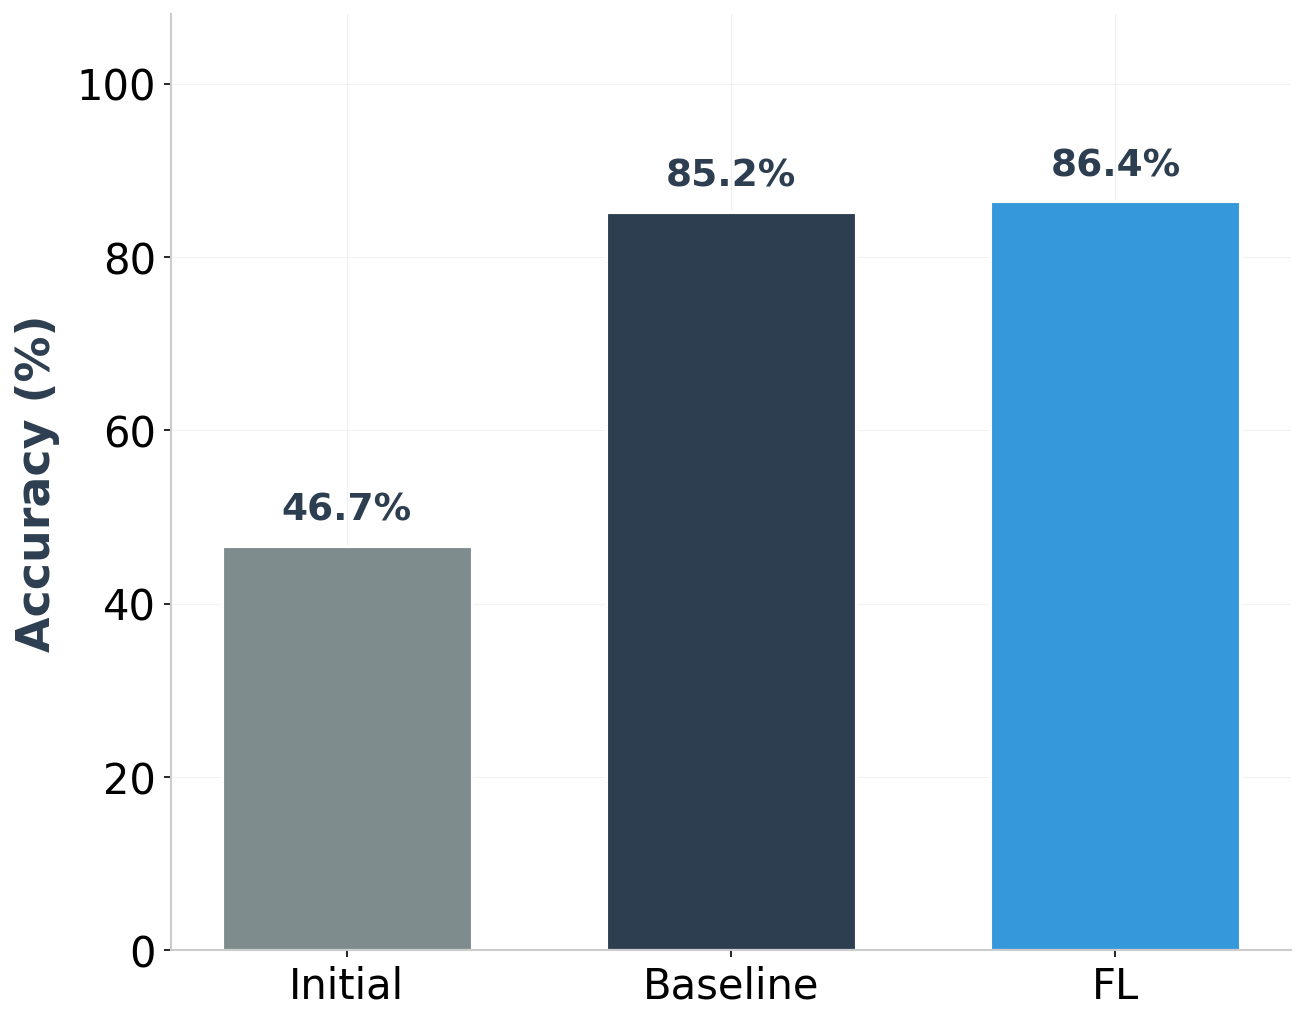


Visualization complete!


In [ ]:
#!/usr/bin/env python3
"""
Generalization Experiment Visualization for Policy Repair

Academic Publication: "Counter-Example Guided Policy Repair for Cloud Security"
Clean, minimalist version for academic publication figures.
"""

import matplotlib.pyplot as plt
import numpy as np
import json
from scipy import stats

# Professional academic color palette
ACADEMIC_COLORS = {
    'navy_blue': '#2C3E50',      # Baseline
    'blue': '#3498DB',           # FL
    'gray': '#7F8C8D',           # Initial
    'light_gray': '#BDC3C7',
    'white': '#FFFFFF',
    'black': '#2C3E50',
    'steel_blue': '#34495E',
}

def configure_publication_style():
    """Configure matplotlib for publication-quality figures"""
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 20,
        'axes.labelsize': 22,
        'axes.titlesize': 24,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 20,
        'figure.titlesize': 24,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif'],
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'figure.dpi': 150,
        'savefig.dpi': 600,
        'savefig.bbox': 'tight',
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.linewidth': 1.2,
        'axes.edgecolor': ACADEMIC_COLORS['steel_blue'],
        'axes.labelcolor': ACADEMIC_COLORS['black'],
        'axes.axisbelow': True,
        'axes.labelpad': 8,
        'axes.grid': True,
        'grid.alpha': 0.25,
        'grid.linewidth': 0.6,
        'grid.color': ACADEMIC_COLORS['light_gray'],
        'lines.linewidth': 2.5,
        'lines.markersize': 8,
        'lines.markeredgewidth': 1.5,
        'text.usetex': False,
    })


class AccuracyVisualizer:
    """Visualizer for comparing Baseline and FL accuracy"""
    
    def __init__(self):
        configure_publication_style()
        self.colors = ACADEMIC_COLORS
    
    def calculate_accuracies(self, data):
        """Calculate initial and final accuracies for all policies"""
        policies = data['policy_iterations']
        
        initial_accuracies = []
        final_accuracies = []
        
        for _, policy_data in policies.items():
            initial_acc = policy_data.get('baseline_accuracy', 0.0)
            final_acc = policy_data.get('final_accuracy', initial_acc)
            initial_accuracies.append(initial_acc)
            final_accuracies.append(final_acc)
        
        avg_initial = np.mean(initial_accuracies) if initial_accuracies else 0.0
        avg_final = np.mean(final_accuracies) if final_accuracies else 0.0
        return avg_initial, avg_final, len(policies), initial_accuracies
    
    def create_comparison_plot(self, ax, baseline_initial, baseline_final, 
                               fl_initial, fl_final, title="Accuracy Comparison"):
        """Create a clean bar plot comparing Baseline and FL accuracies"""
        
        categories = ['Initial', 'Baseline', 'FL']
        values = [baseline_initial, baseline_final, fl_final]
        colors = [
            ACADEMIC_COLORS['gray'],
            ACADEMIC_COLORS['navy_blue'],
            ACADEMIC_COLORS['blue']
        ]
        
        x_positions = np.arange(len(categories))
        bar_width = 0.65
        bars = ax.bar(x_positions, values, bar_width, color=colors, edgecolor='white', linewidth=1.5)
        
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 2,
                    f'{value:.1f}%', ha='center', va='bottom',
                    fontsize=18, fontweight='bold', color=self.colors['black'])
        
        ax.set_title(title, fontsize=24, fontweight='bold', pad=25)
        ax.set_ylabel('Accuracy (%)', fontweight='normal', fontsize=22)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(categories, fontsize=20, fontweight='medium')
        ax.set_ylim(0, 108)
        
        ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.5, axis='y')
        ax.set_axisbelow(True)
        ax.set_facecolor('#FFFFFF')
        
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color('#CCCCCC')
            ax.spines[spine].set_linewidth(1)
    
    def create_dual_comparison(self, baseline_file, fl_file):
        """Create only the bar comparison plot"""
        
        with open(baseline_file, 'r') as f:
            baseline_data = json.load(f)
        with open(fl_file, 'r') as f:
            fl_data = json.load(f)
        
        baseline_initial, baseline_final, n_policies, baseline_initial_scores = self.calculate_accuracies(baseline_data)
        fl_initial, fl_final, _, fl_initial_scores = self.calculate_accuracies(fl_data)
        initial_accuracy = (baseline_initial + fl_initial) / 2
        
        fig, ax1 = plt.subplots(figsize=(9, 8))
        fig.patch.set_facecolor('#FFFFFF')
        
        self.create_comparison_plot(ax1, initial_accuracy, baseline_final,
                                    initial_accuracy, fl_final,
                                    title="")
 
        plt.subplots_adjust(left=0.12, right=0.95, top=0.9, bottom=0.12)
        return fig


def save_figure(fig, filename):
    """Save figure with high-quality settings"""
    fig.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.15,
                facecolor='white', edgecolor='none')
    print(f"Figure saved as {filename}")


def main():
    print("=" * 60)
    print("Policy Repair Accuracy Visualization")
    print("=" * 60)
    
    visualizer = AccuracyVisualizer()
    
    # Update paths
    baseline_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/base_intent.json"
    fl_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/fl_intent.json"

    print("\nGenerating clean comparison figure...")
    fig = visualizer.create_dual_comparison(baseline_file, fl_file)
    save_figure(fig, 'figures/policy_repair_comparison.png')
    save_figure(fig, 'figures/policy_repair_comparison.pdf')
    
    plt.show()
    
    print("\n" + "=" * 60)
    print("Visualization complete!")
    print("=" * 60)


if __name__ == "__main__":
    main()


Generating compact generalization figure (no grid)...
Saved: figures/generalization_comparison_paper_nogrid.png
Saved: figures/generalization_comparison_paper_nogrid.pdf


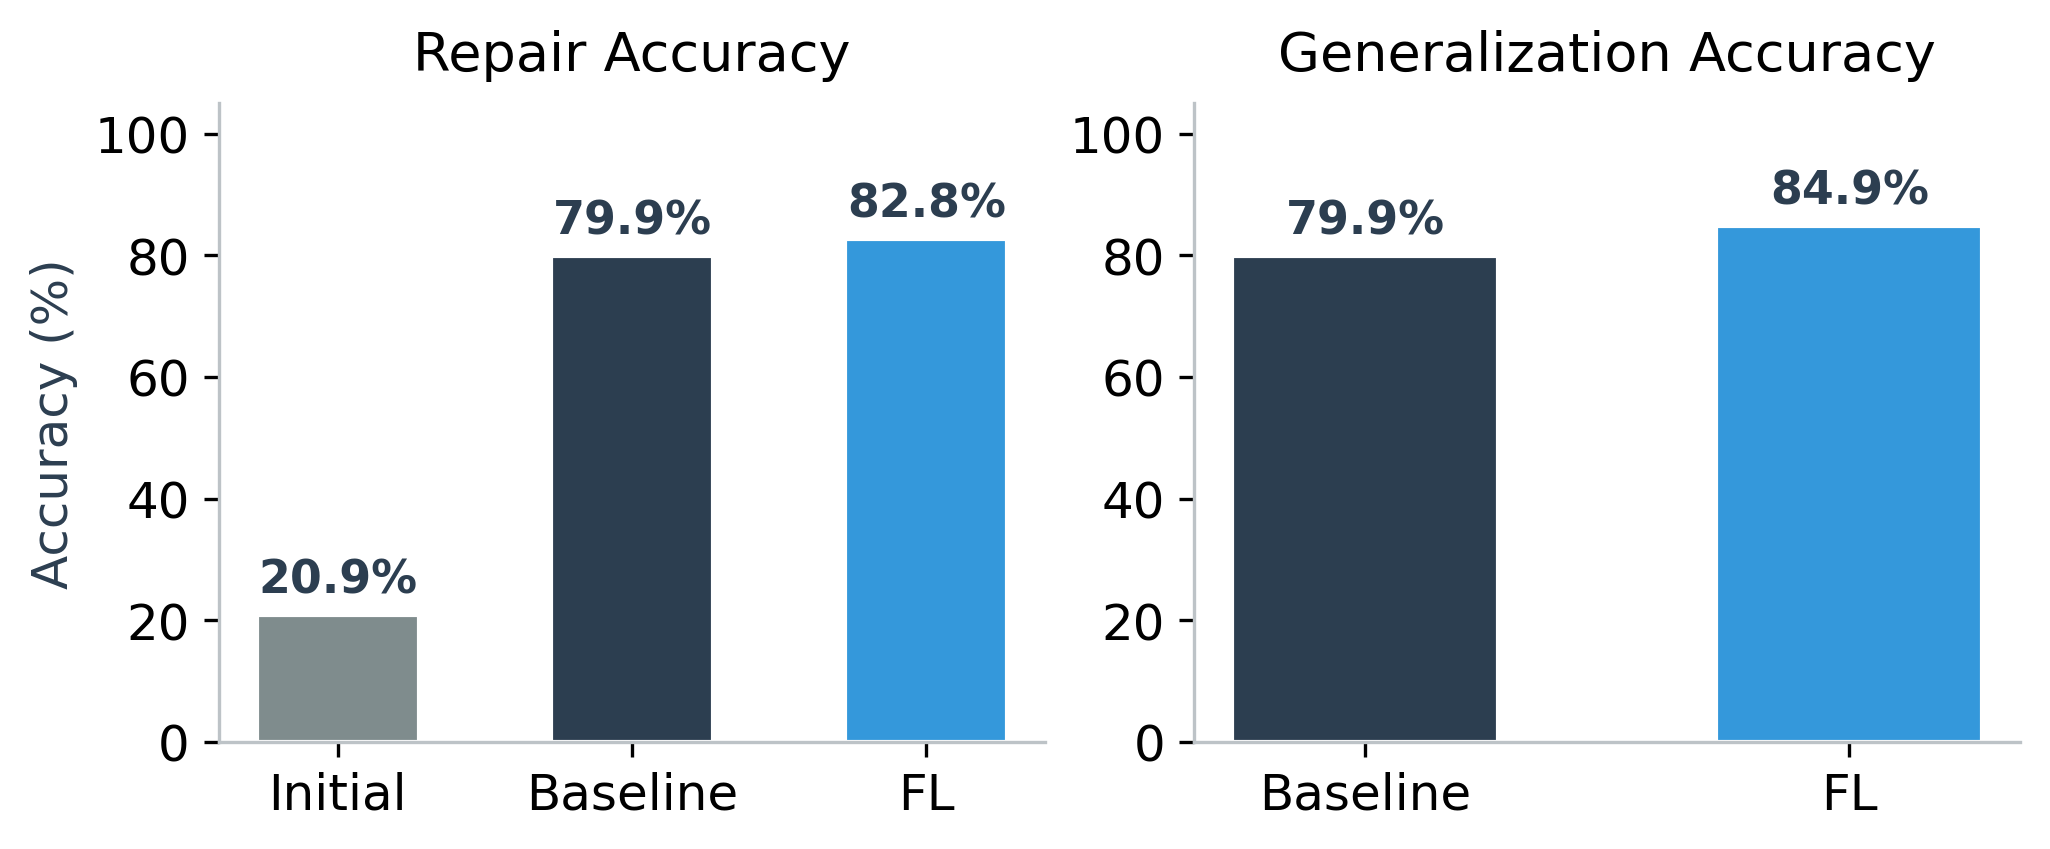

Done.


In [12]:
#!/usr/bin/env python3
"""
Generalization Experiment Visualization for Policy Repair (Paper Version)
Compact, consistent with main figures (FL always blue, no grid).
"""

import matplotlib.pyplot as plt
import numpy as np
import json

# === Professional Academic Palette (Consistent with Main Figure) ===
ACADEMIC_COLORS = {
    'navy_blue': '#2C3E50',   # Baseline
    'blue': '#3498DB',        # FL (consistent)
    'gray': '#7F8C8D',        # Initial
    'light_gray': '#BDC3C7',
    'white': '#FFFFFF',
    'black': '#2C3E50',
    'steel_blue': '#34495E',
}

# === Compact Publication Style (No Grid) ===
def configure_publication_style():
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 12,
        'axes.labelsize': 13,
        'axes.titlesize': 13,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'figure.titlesize': 13,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans'],
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'figure.dpi': 300,
        'savefig.dpi': 600,
        'savefig.bbox': 'tight',
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.linewidth': 1,
        'axes.edgecolor': ACADEMIC_COLORS['steel_blue'],
        'axes.labelcolor': ACADEMIC_COLORS['black'],
        'axes.grid': False,  # 🚫 No grid lines
        'lines.linewidth': 2,
        'lines.markersize': 6,
    })


class GeneralizationVisualizer:
    def __init__(self):
        configure_publication_style()
        self.colors = ACADEMIC_COLORS

    def calculate_overall_accuracies(self, data):
        """Compute average baseline and final accuracies."""
        all_policies = list(data['policy_iterations'].keys())
        total_baseline = total_peak = 0.0
        for pid in all_policies:
            p = data['policy_iterations'][pid]
            base = p.get("baseline_accuracy", 0.0)
            peak = max(p.get("iteration_accuracies", [base]))
            total_baseline += base
            total_peak += peak
        return total_baseline / len(all_policies), total_peak / len(all_policies), len(all_policies)

    def _bar_plot(self, ax, accuracies, labels, title, ylabel):
        """Compact bar plot with consistent FL color and no grid."""
        color_map = {
            'Initial': self.colors['gray'],
            'Baseline': self.colors['navy_blue'],
            'FL': self.colors['blue'],
        }
        colors = [color_map[label] for label in labels]
        bars = ax.bar(np.arange(len(accuracies)), accuracies, 0.55,
                      color=colors, edgecolor='white', linewidth=1)
        for bar, val in zip(bars, accuracies):
            ax.text(bar.get_x() + bar.get_width()/2, val + 2,
                    f"{val:.1f}%", ha='center', va='bottom',
                    fontsize=11, fontweight='bold', color=self.colors['black'])
        ax.set_title(title, fontsize=13, fontweight='normal', pad=8)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.set_xticks(np.arange(len(labels)))
        ax.set_xticklabels(labels, fontsize=12)
        ax.set_ylim(0, 105)

        # Minimal spines, no grid
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color(self.colors['light_gray'])
            ax.spines[spine].set_linewidth(0.8)

    def create_generalization_comparison(self, fl_file, baseline_file):
        """Generate compact 2-panel comparison for paper."""
        with open(fl_file) as f1, open(baseline_file) as f2:
            fl_data, baseline_data = json.load(f1), json.load(f2)

        b_init, b_final, _ = self.calculate_overall_accuracies(baseline_data)
        _, fl_final, _ = self.calculate_overall_accuracies(fl_data)

        # Use test results (if not in JSON)
        baseline_test, fl_test = 83.7, 84.9

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.8, 2.8))
        self._bar_plot(ax1, [b_init, b_final, fl_final],
                       ["Initial", "Baseline", "FL"],
                       "Repair Accuracy", "Accuracy (%)")
        self._bar_plot(ax2, [b_final, fl_test],
                       ["Baseline", "FL"],
                       "Generalization Accuracy", "")
        plt.tight_layout(pad=0.5)
        return fig


def safe_figure(fig, filename):
    fig.savefig(filename, dpi=600, bbox_inches='tight', pad_inches=0.05)
    print(f"Saved: {filename}")


def main():
    print("Generating compact generalization figure (no grid)...")
    visualizer = GeneralizationVisualizer()
    fl_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/generalizability/fl.json"
    baseline_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/generalizability/baseline.json"
    fig = visualizer.create_generalization_comparison(fl_file, baseline_file)
    safe_figure(fig, "figures/generalization_comparison_paper_nogrid.png")
    safe_figure(fig, "figures/generalization_comparison_paper_nogrid.pdf")
    plt.show()
    print("Done.")


if __name__ == "__main__":
    main()


Generating compact generalization figure (no grid)...
Total policies: 282
Baseline 100% count: 147
FL 100% count: 172
Saved: figures/generalization_comparison_paper_nogrid.png
Saved: figures/generalization_comparison_paper_nogrid.pdf


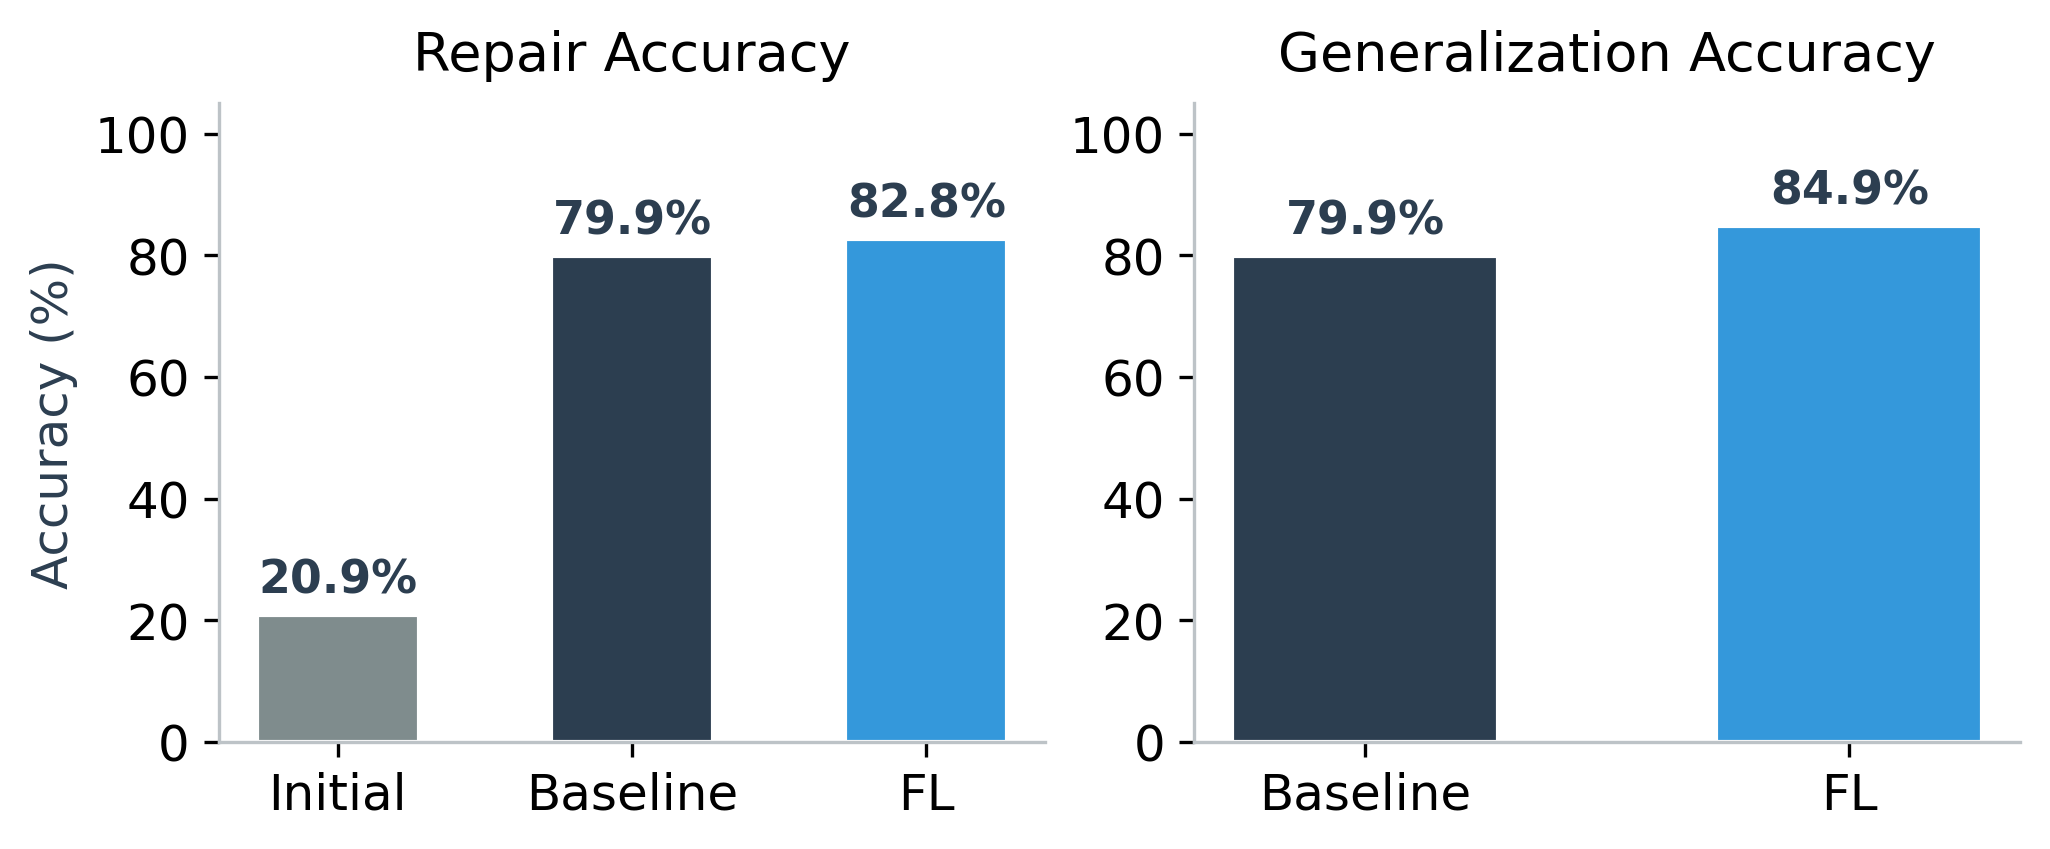

Done.


In [25]:
#!/usr/bin/env python3
"""
Generalization Experiment Visualization for Policy Repair (Paper Version)
Compact, consistent with main figures (FL always blue, no grid).
Shows 100% repair counts in small top-left legend.
"""

import matplotlib.pyplot as plt
import numpy as np
import json

# === Professional Academic Palette (Consistent with Main Figure) ===
ACADEMIC_COLORS = {
    'navy_blue': '#2C3E50',   # Baseline
    'blue': '#3498DB',        # FL (consistent)
    'gray': '#7F8C8D',        # Initial
    'light_gray': '#BDC3C7',
    'white': '#FFFFFF',
    'black': '#2C3E50',
    'steel_blue': '#34495E',
}

# === Compact Publication Style (No Grid) ===
def configure_publication_style():
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 12,
        'axes.labelsize': 13,
        'axes.titlesize': 13,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 7,
        'figure.titlesize': 13,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans'],
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'figure.dpi': 300,
        'savefig.dpi': 600,
        'savefig.bbox': 'tight',
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.linewidth': 1,
        'axes.edgecolor': ACADEMIC_COLORS['steel_blue'],
        'axes.labelcolor': ACADEMIC_COLORS['black'],
        'axes.grid': False,  # 🚫 No grid lines
        'lines.linewidth': 2,
        'lines.markersize': 6,
    })


class GeneralizationVisualizer:
    def __init__(self):
        configure_publication_style()
        self.colors = ACADEMIC_COLORS

    def calculate_overall_accuracies(self, data):
        """Compute average baseline and final accuracies, plus 100% count."""
        all_policies = list(data['policy_iterations'].keys())
        total_baseline = total_peak = 0.0
        count_100 = 0
        
        for pid in all_policies:
            p = data['policy_iterations'][pid]
            base = p.get("baseline_accuracy", 0.0)
            peak = max(p.get("iteration_accuracies", [base]))
            total_baseline += base
            total_peak += peak
            if peak == 100.0:
                count_100 += 1
        
        avg_baseline = total_baseline / len(all_policies)
        avg_peak = total_peak / len(all_policies)
        return avg_baseline, avg_peak, len(all_policies), count_100

    def _bar_plot(self, ax, accuracies, labels, title, ylabel, counts_legend=None):
        """Compact bar plot with consistent FL color and no grid."""
        color_map = {
            'Initial': self.colors['gray'],
            'Baseline': self.colors['navy_blue'],
            'FL': self.colors['blue'],
        }
        colors = [color_map[label] for label in labels]
        bars = ax.bar(np.arange(len(accuracies)), accuracies, 0.55,
                      color=colors, edgecolor='white', linewidth=1)
        
        for bar, val in zip(bars, accuracies):
            ax.text(bar.get_x() + bar.get_width()/2, val + 2,
                    f"{val:.1f}%", ha='center', va='bottom',
                    fontsize=11, fontweight='bold', color=self.colors['black'])
        
        ax.set_title(title, fontsize=13, fontweight='normal', pad=8)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.set_xticks(np.arange(len(labels)))
        ax.set_xticklabels(labels, fontsize=12)
        ax.set_ylim(0, 105)

        # # Add very small legend with counts if provided
        # if counts_legend:
        #     legend_text = f"100%: Baseline:{counts_legend[0]}/282, FL:{counts_legend[1]}/282"
        #     ax.text(0.02, 0.98, legend_text, 
        #            transform=ax.transAxes,
        #            fontsize=6,
        #            verticalalignment='top',
        #            horizontalalignment='left')

        # Minimal spines, no grid
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color(self.colors['light_gray'])
            ax.spines[spine].set_linewidth(0.8)

    def create_generalization_comparison(self, fl_file, baseline_file):
        """Generate compact 2-panel comparison for paper."""
        with open(fl_file) as f1, open(baseline_file) as f2:
            fl_data, baseline_data = json.load(f1), json.load(f2)

        b_init, b_final, total_policies, b_count_100 = self.calculate_overall_accuracies(baseline_data)
        _, fl_final, _, fl_count_100 = self.calculate_overall_accuracies(fl_data)

        print(f"Total policies: {total_policies}")
        print(f"Baseline 100% count: {b_count_100}")
        print(f"FL 100% count: {fl_count_100}")

        # Use test results (if not in JSON)
        baseline_test, fl_test = 83.7, 84.9

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.8, 2.8))
        
        # First panel with counts legend
        self._bar_plot(ax1, [b_init, b_final, fl_final],
                       ["Initial", "Baseline", "FL"],
                       "Repair Accuracy", "Accuracy (%)",
                       counts_legend=[b_count_100, fl_count_100])
        
        # Second panel without legend
        self._bar_plot(ax2, [b_final, fl_test],
                       ["Baseline", "FL"],
                       "Generalization Accuracy", "")
        
        plt.tight_layout(pad=0.5)
        return fig


def safe_figure(fig, filename):
    fig.savefig(filename, dpi=600, bbox_inches='tight', pad_inches=0.05)
    print(f"Saved: {filename}")


def main():
    print("Generating compact generalization figure (no grid)...")
    visualizer = GeneralizationVisualizer()
    fl_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/generalizability/fl.json"
    baseline_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/generalizability/baseline.json"
    fig = visualizer.create_generalization_comparison(fl_file, baseline_file)
    safe_figure(fig, "figures/generalization_comparison_paper_nogrid.png")
    safe_figure(fig, "figures/generalization_comparison_paper_nogrid.pdf")
    plt.show()
    print("Done.")


if __name__ == "__main__":
    main()

Policy Repair Accuracy Visualization

Generating accuracy comparison figure...
Figure saved as figures/policy_repair_comparison.png
Figure saved as figures/policy_repair_comparison.pdf


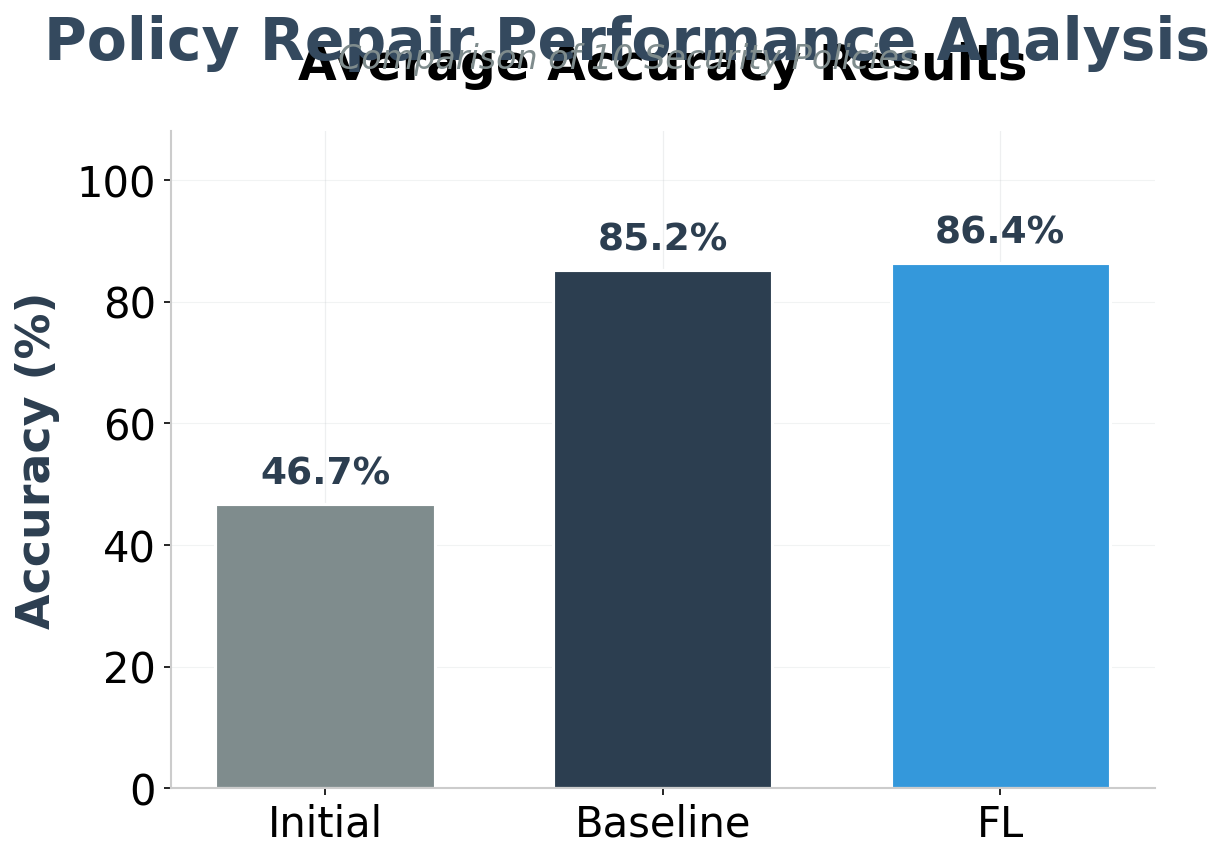


Visualization complete!


In [18]:
#!/usr/bin/env python3
"""
Generalization Experiment Visualization for Policy Repair

Academic Publication: "Counter-Example Guided Policy Repair for Cloud Security"
Shows a clean comparison bar chart for average accuracy.
"""

import matplotlib.pyplot as plt
import numpy as np
import json
from scipy import stats

# Professional academic color palette
ACADEMIC_COLORS = {
    'navy_blue': '#2C3E50',      # Baseline
    'blue': '#3498DB',           # FL
    'gray': '#7F8C8D',           # Initial
    'light_gray': '#BDC3C7',
    'white': '#FFFFFF',
    'black': '#2C3E50',
    'steel_blue': '#34495E',
    'accent_orange': '#E67E22'
}


def configure_publication_style():
    """Configure matplotlib for publication-quality figures"""
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 20,
        'axes.labelsize': 22,
        'axes.titlesize': 24,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 20,
        'figure.titlesize': 24,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif'],
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'figure.dpi': 150,
        'savefig.dpi': 600,
        'savefig.bbox': 'tight',
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.linewidth': 1.2,
        'axes.edgecolor': ACADEMIC_COLORS['steel_blue'],
        'axes.labelcolor': ACADEMIC_COLORS['black'],
        'axes.axisbelow': True,
        'axes.labelpad': 8,
        'axes.grid': True,
        'grid.alpha': 0.25,
        'grid.linewidth': 0.6,
        'grid.color': ACADEMIC_COLORS['light_gray'],
        'lines.linewidth': 2.5,
        'lines.markersize': 8,
        'lines.markeredgewidth': 1.5,
        'text.usetex': False,
    })


class AccuracyVisualizer:
    """Visualizer for comparing Baseline and FL accuracies"""
    
    def __init__(self):
        configure_publication_style()
        self.colors = ACADEMIC_COLORS
    
    def calculate_accuracies(self, data):
        """Calculate initial and final accuracies for all policies"""
        policies = data['policy_iterations']
        
        initial_accuracies = []
        final_accuracies = []
        
        for _, policy_data in policies.items():
            initial_acc = policy_data.get('baseline_accuracy', 0.0)
            final_acc = policy_data.get('final_accuracy', initial_acc)
            initial_accuracies.append(initial_acc)
            final_accuracies.append(final_acc)
        
        avg_initial = np.mean(initial_accuracies) if initial_accuracies else 0.0
        avg_final = np.mean(final_accuracies) if final_accuracies else 0.0
        return avg_initial, avg_final, len(policies), initial_accuracies, final_accuracies
    
    def create_comparison_plot(self, ax, baseline_initial, baseline_final, 
                               fl_initial, fl_final, title="Accuracy Comparison"):
        """Create a clean bar plot comparing Baseline and FL accuracies"""
        
        categories = ['Initial', 'Baseline', 'FL']
        values = [baseline_initial, baseline_final, fl_final]
        colors = [
            ACADEMIC_COLORS['gray'],
            ACADEMIC_COLORS['navy_blue'],
            ACADEMIC_COLORS['blue']
        ]
        
        x_positions = np.arange(len(categories))
        bar_width = 0.65
        bars = ax.bar(x_positions, values, bar_width, color=colors, edgecolor='white', linewidth=1.5)
        
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 2,
                    f'{value:.1f}%', ha='center', va='bottom',
                    fontsize=18, fontweight='bold', color=self.colors['black'])
        
        ax.set_title(title, fontsize=24, fontweight='bold', pad=25)
        ax.set_ylabel('Accuracy (%)', fontweight='bold', fontsize=22)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(categories, fontsize=20, fontweight='medium')
        ax.set_ylim(0, 108)
        
        ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.5, axis='y')
        ax.set_axisbelow(True)
        ax.set_facecolor('#FFFFFF')
        
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color('#CCCCCC')
            ax.spines[spine].set_linewidth(1)
    
    def create_initial_difference_distribution_plot(self, ax, baseline_initials, fl_initials):
        """Distribution of Δ Initial Accuracy = FL_initial - Baseline_initial per policy"""
        
        # Compute per-policy initial accuracy difference
        diffs = np.array(fl_initials) - np.array(baseline_initials)
        mean_diff = np.mean(diffs)
        std_diff = np.std(diffs)
        
        # Check if data has variance
        has_variance = std_diff > 1e-6
        
        if has_variance:
            # Define bins centered around zero
            bins = np.linspace(min(diffs) - 1, max(diffs) + 1, 15)

            # Histogram
            ax.hist(diffs, bins=bins, alpha=0.4, color=self.colors['accent_orange'],
                    edgecolor='none', density=True)
            
            # KDE curve (only if we have sufficient variance)
            try:
                kde = stats.gaussian_kde(diffs)
                x_range = np.linspace(min(diffs) - 2, max(diffs) + 2, 200)
                ax.plot(x_range, kde(x_range), color=self.colors['accent_orange'],
                        linewidth=3, alpha=0.9)
            except np.linalg.LinAlgError:
                # If KDE fails, just show histogram
                pass

            # Mean line and zero reference
            ax.axvline(0, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
            ax.axvline(mean_diff, color=self.colors['accent_orange'], linestyle='--', linewidth=2)
            
            # Annotate mean difference
            y_pos = ax.get_ylim()[1] * 0.9
            ax.text(mean_diff, y_pos, f'Mean = {mean_diff:.2f}%',
                    ha='center', fontsize=16, color=self.colors['accent_orange'], fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                             edgecolor=self.colors['accent_orange'], alpha=0.8))
        else:
            # All differences are identical - show as a simple bar at that value
            ax.bar([mean_diff], [1], width=0.5, color=self.colors['accent_orange'], 
                   alpha=0.6, edgecolor=self.colors['accent_orange'], linewidth=2)
            ax.axvline(0, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
            ax.set_ylim(0, 1.2)
            
            # Annotate the single value
            ax.text(mean_diff, 0.5, f'All differences = {mean_diff:.2f}%',
                    ha='center', fontsize=16, color=self.colors['accent_orange'], fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                             edgecolor=self.colors['accent_orange'], alpha=0.8))
        
        # Labels and style
        ax.set_xlabel('Δ Initial Accuracy (FL - Baseline) (%)', fontweight='bold', fontsize=22)
        ax.set_ylabel('Density' if has_variance else 'Frequency', fontweight='bold', fontsize=22)
        ax.set_title('Initial Accuracy Difference Distribution',
                     fontsize=24, fontweight='bold', pad=25)

        # Clean visuals
        ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.5)
        ax.set_facecolor('#FFFFFF')
        ax.set_axisbelow(True)

        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color('#CCCCCC')
            ax.spines[spine].set_linewidth(1)
    
    def create_single_comparison(self, baseline_file, fl_file):
        """Create single bar comparison plot"""
        
        with open(baseline_file, 'r') as f:
            baseline_data = json.load(f)
        with open(fl_file, 'r') as f:
            fl_data = json.load(f)
        
        baseline_initial, baseline_final, n_policies, _, _ = self.calculate_accuracies(baseline_data)
        fl_initial, fl_final, _, _, _ = self.calculate_accuracies(fl_data)
        initial_accuracy = (baseline_initial + fl_initial) / 2
        
        fig, ax = plt.subplots(figsize=(8, 6))
        fig.patch.set_facecolor('#FFFFFF')
        
        # Create comparison plot
        self.create_comparison_plot(ax, initial_accuracy, baseline_final,
                                    initial_accuracy, fl_final,
                                    title="Average Accuracy Results")
        
        fig.suptitle('Policy Repair Performance Analysis', fontsize=28, fontweight='bold',
                     y=0.98, color=self.colors['steel_blue'])
        fig.text(0.5, 0.92, f'Comparison of {n_policies} Security Policies',
                 fontsize=16, ha='center', color=self.colors['gray'], style='italic')
        
        plt.subplots_adjust(left=0.12, right=0.94, top=0.85, bottom=0.12)
        return fig


def save_figure(fig, filename):
    """Save figure with high-quality settings"""
    fig.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.15,
                facecolor='white', edgecolor='none')
    print(f"Figure saved as {filename}")


def main():
    print("=" * 60)
    print("Policy Repair Accuracy Visualization")
    print("=" * 60)
    
    visualizer = AccuracyVisualizer()
    
    # Update paths
    baseline_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/base_intent.json"
    fl_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/fl_intent.json"

    print("\nGenerating accuracy comparison figure...")
    fig = visualizer.create_single_comparison(baseline_file, fl_file)
    save_figure(fig, 'figures/policy_repair_comparison.png')
    save_figure(fig, 'figures/policy_repair_comparison.pdf')
    
    plt.show()
    
    print("\n" + "=" * 60)
    print("Visualization complete!")
    print("=" * 60)


if __name__ == "__main__":
    main()

Policy Repair Accuracy Visualization

Generating Δ Accuracy comparison figure...
Figure saved as figures/policy_repair_difference.png
Figure saved as figures/policy_repair_difference.pdf


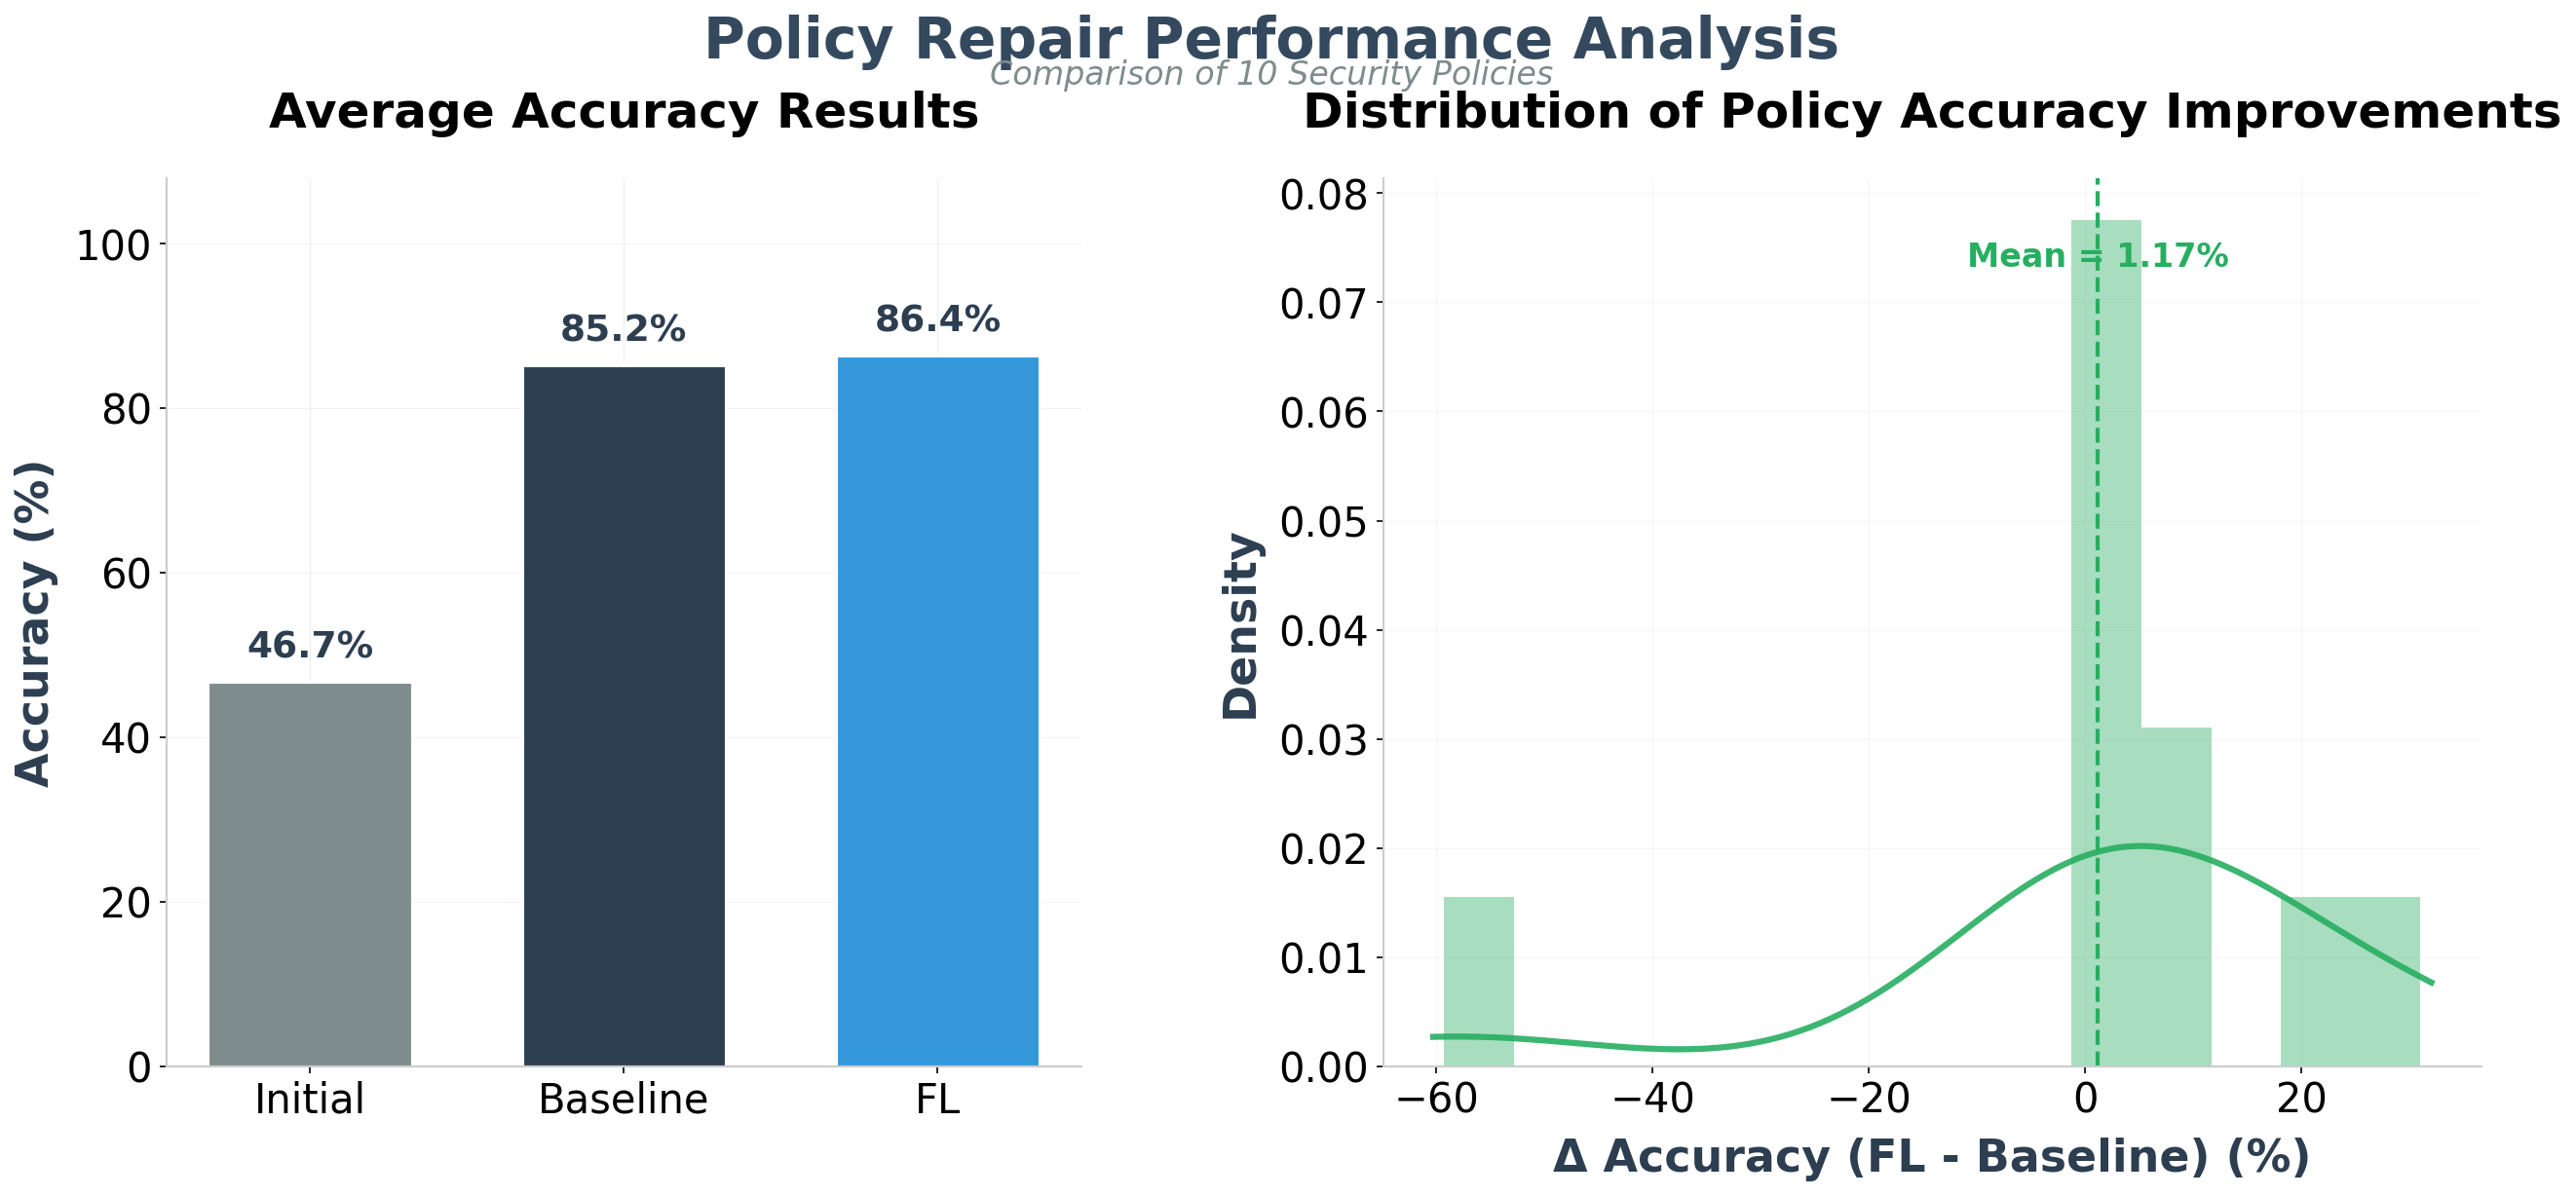


Visualization complete!


In [40]:
#!/usr/bin/env python3
"""
Generalization Experiment Visualization for Policy Repair

Academic Publication: "Counter-Example Guided Policy Repair for Cloud Security"
Shows distribution of per-policy accuracy improvements (Δ Accuracy = FL - Baseline)
and a clean comparison bar chart for average accuracy.
"""

import matplotlib.pyplot as plt
import numpy as np
import json
from scipy import stats

# Professional academic color palette
ACADEMIC_COLORS = {
    'navy_blue': '#2C3E50',      # Baseline
    'blue': '#3498DB',           # FL
    'gray': '#7F8C8D',           # Initial
    'light_gray': '#BDC3C7',
    'white': '#FFFFFF',
    'black': '#2C3E50',
    'steel_blue': '#34495E',
    'accent_green': '#27AE60'
}


def configure_publication_style():
    """Configure matplotlib for publication-quality figures"""
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 20,
        'axes.labelsize': 22,
        'axes.titlesize': 24,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 20,
        'figure.titlesize': 24,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif'],
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'figure.dpi': 150,
        'savefig.dpi': 600,
        'savefig.bbox': 'tight',
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.linewidth': 1.2,
        'axes.edgecolor': ACADEMIC_COLORS['steel_blue'],
        'axes.labelcolor': ACADEMIC_COLORS['black'],
        'axes.axisbelow': True,
        'axes.labelpad': 8,
        'axes.grid': True,
        'grid.alpha': 0.25,
        'grid.linewidth': 0.6,
        'grid.color': ACADEMIC_COLORS['light_gray'],
        'lines.linewidth': 2.5,
        'lines.markersize': 8,
        'lines.markeredgewidth': 1.5,
        'text.usetex': False,
    })


class AccuracyVisualizer:
    """Visualizer for comparing Baseline and FL accuracies"""
    
    def __init__(self):
        configure_publication_style()
        self.colors = ACADEMIC_COLORS
    
    def calculate_accuracies(self, data):
        """Calculate initial and final accuracies for all policies"""
        policies = data['policy_iterations']
        
        initial_accuracies = []
        final_accuracies = []
        
        for _, policy_data in policies.items():
            initial_acc = policy_data.get('baseline_accuracy', 0.0)
            final_acc = policy_data.get('final_accuracy', initial_acc)
            initial_accuracies.append(initial_acc)
            final_accuracies.append(final_acc)
        
        avg_initial = np.mean(initial_accuracies) if initial_accuracies else 0.0
        avg_final = np.mean(final_accuracies) if final_accuracies else 0.0
        return avg_initial, avg_final, len(policies), initial_accuracies, final_accuracies
    
    def create_comparison_plot(self, ax, baseline_initial, baseline_final, 
                               fl_initial, fl_final, title="Accuracy Comparison"):
        """Create a clean bar plot comparing Baseline and FL accuracies"""
        
        categories = ['Initial', 'Baseline', 'FL']
        values = [baseline_initial, baseline_final, fl_final]
        colors = [
            ACADEMIC_COLORS['gray'],
            ACADEMIC_COLORS['navy_blue'],
            ACADEMIC_COLORS['blue']
        ]
        
        x_positions = np.arange(len(categories))
        bar_width = 0.65
        bars = ax.bar(x_positions, values, bar_width, color=colors, edgecolor='white', linewidth=1.5)
        
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 2,
                    f'{value:.1f}%', ha='center', va='bottom',
                    fontsize=18, fontweight='bold', color=self.colors['black'])
        
        ax.set_title(title, fontsize=24, fontweight='bold', pad=25)
        ax.set_ylabel('Accuracy (%)', fontweight='bold', fontsize=22)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(categories, fontsize=20, fontweight='medium')
        ax.set_ylim(0, 108)
        
        ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.5, axis='y')
        ax.set_axisbelow(True)
        ax.set_facecolor('#FFFFFF')
        
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color('#CCCCCC')
            ax.spines[spine].set_linewidth(1)
    
    def create_difference_distribution_plot(self, ax, baseline_finals, fl_finals):
        """Distribution of ΔAccuracy = FL_final - Baseline_final per policy"""
        
        # Compute per-policy improvement (difference)
        diffs = np.array(fl_finals) - np.array(baseline_finals)
        mean_diff = np.mean(diffs)
        
        # Define bins centered around zero
        bins = np.linspace(min(diffs) - 1, max(diffs) + 1, 15)

        # Histogram
        ax.hist(diffs, bins=bins, alpha=0.4, color=self.colors['accent_green'],
                edgecolor='none', density=True)
        
        # KDE curve
        kde = stats.gaussian_kde(diffs)
        x_range = np.linspace(min(diffs) - 2, max(diffs) + 2, 200)
        ax.plot(x_range, kde(x_range), color=self.colors['accent_green'],
                linewidth=3, alpha=0.9)

        # Mean line
        ax.axvline(mean_diff, color=self.colors['accent_green'], linestyle='--', linewidth=2)
        
        # Labels and style
        ax.set_xlabel('Δ Accuracy (FL - Baseline) (%)', fontweight='bold', fontsize=22)
        ax.set_ylabel('Density', fontweight='bold', fontsize=22)
        ax.set_title('Distribution of Policy Accuracy Improvements',
                     fontsize=24, fontweight='bold', pad=25)

        # Annotate mean improvement
        ax.text(mean_diff, ax.get_ylim()[1]*0.9, f'Mean = {mean_diff:.2f}%',
                ha='center', fontsize=16, color=self.colors['accent_green'], fontweight='bold')

        # Clean visuals
        ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.5)
        ax.set_facecolor('#FFFFFF')
        ax.set_axisbelow(True)

        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color('#CCCCCC')
            ax.spines[spine].set_linewidth(1)
    
    def create_dual_comparison(self, baseline_file, fl_file):
        """Create two plots: (1) bar comparison, (2) Δ accuracy distribution"""
        
        with open(baseline_file, 'r') as f:
            baseline_data = json.load(f)
        with open(fl_file, 'r') as f:
            fl_data = json.load(f)
        
        baseline_initial, baseline_final, n_policies, baseline_initial_scores, baseline_final_scores = self.calculate_accuracies(baseline_data)
        fl_initial, fl_final, _, fl_initial_scores, fl_final_scores = self.calculate_accuracies(fl_data)
        initial_accuracy = (baseline_initial + fl_initial) / 2
        
        fig = plt.figure(figsize=(18, 8))
        gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.2], wspace=0.3)
        ax1 = fig.add_subplot(gs[0])
        ax2 = fig.add_subplot(gs[1])
        
        fig.patch.set_facecolor('#FFFFFF')
        
        # Left: average comparison
        self.create_comparison_plot(ax1, initial_accuracy, baseline_final,
                                    initial_accuracy, fl_final,
                                    title="Average Accuracy Results")
        # Right: difference distribution
        self.create_difference_distribution_plot(ax2, baseline_final_scores, fl_final_scores)
        
        fig.suptitle('Policy Repair Performance Analysis', fontsize=28, fontweight='bold',
                     y=1.02, color=self.colors['steel_blue'])
        fig.text(0.5, 0.96, f'Comparison of {n_policies} Security Policies',
                 fontsize=16, ha='center', color=self.colors['gray'], style='italic')
        
        plt.subplots_adjust(left=0.08, right=0.96, top=0.88, bottom=0.12)
        return fig


def save_figure(fig, filename):
    """Save figure with high-quality settings"""
    fig.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.15,
                facecolor='white', edgecolor='none')
    print(f"Figure saved as {filename}")


def main():
    print("=" * 60)
    print("Policy Repair Accuracy Visualization")
    print("=" * 60)
    
    visualizer = AccuracyVisualizer()
    
    # Update paths
    baseline_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/baseline/base_intent.json"
    fl_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/fl_intent.json"

    print("\nGenerating Δ Accuracy comparison figure...")
    fig = visualizer.create_dual_comparison(baseline_file, fl_file)
    save_figure(fig, 'figures/policy_repair_difference.png')
    save_figure(fig, 'figures/policy_repair_difference.pdf')
    
    plt.show()
    
    print("\n" + "=" * 60)
    print("Visualization complete!")
    print("=" * 60)


if __name__ == "__main__":
    main()


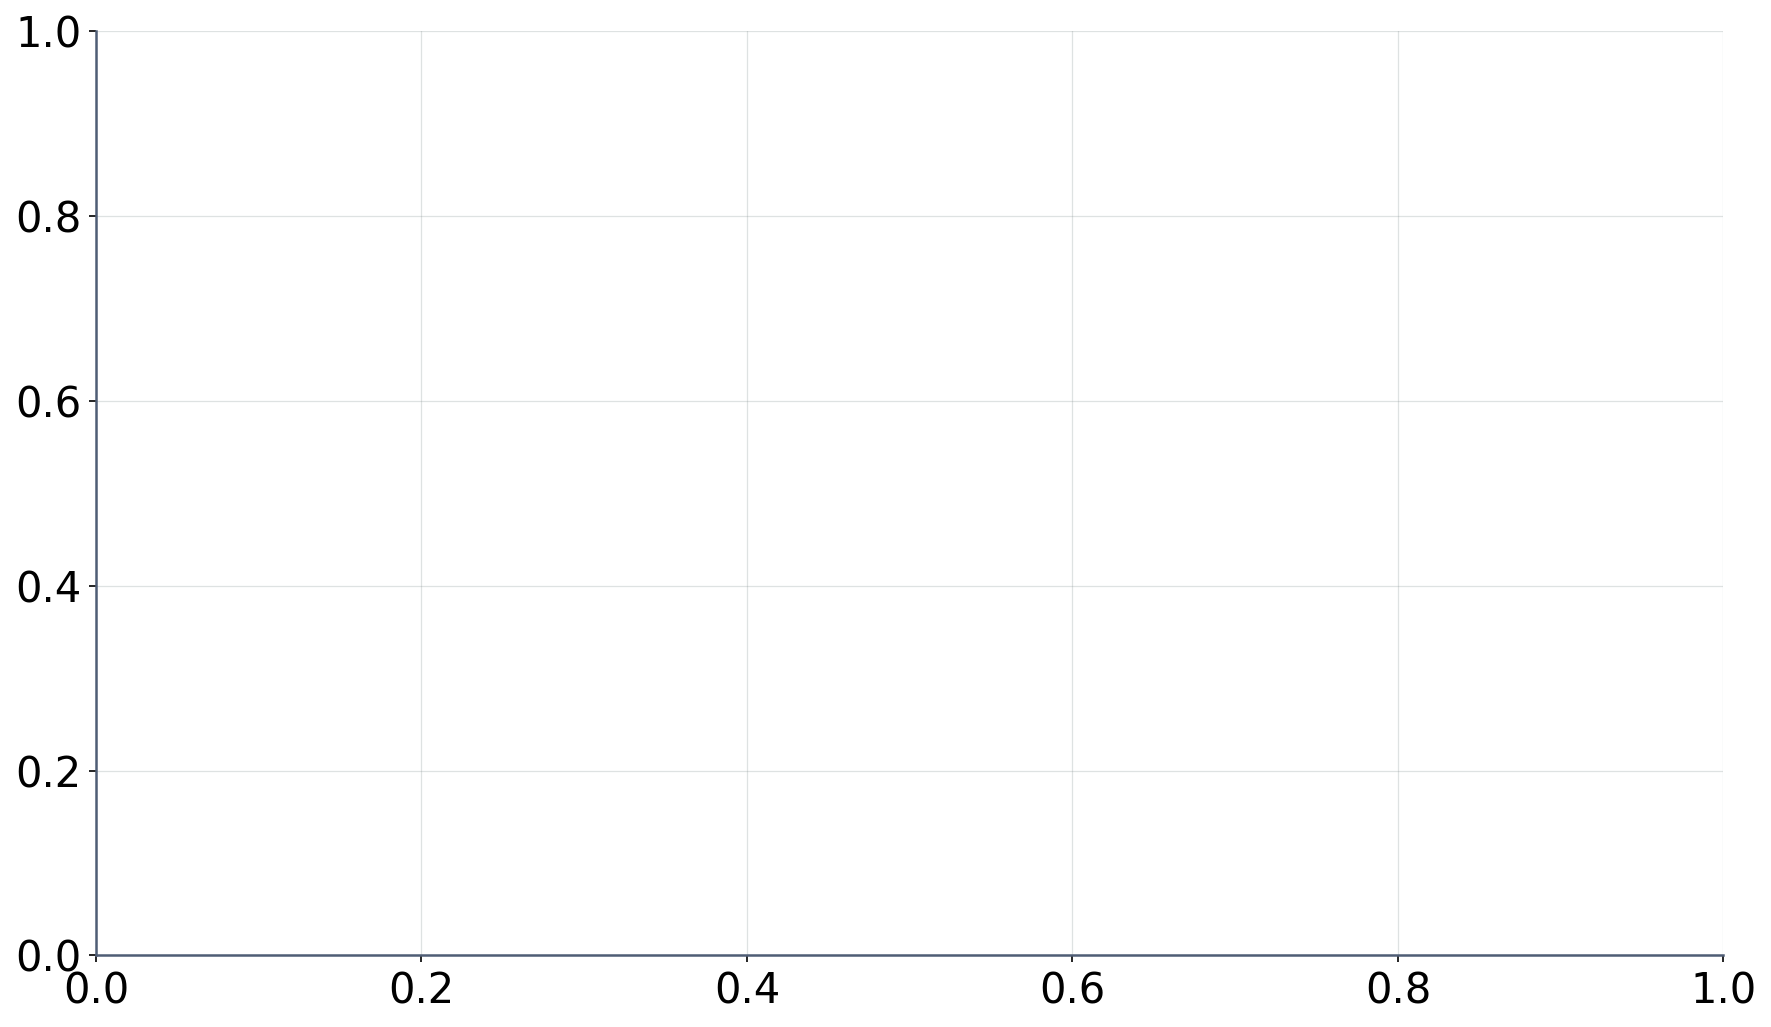

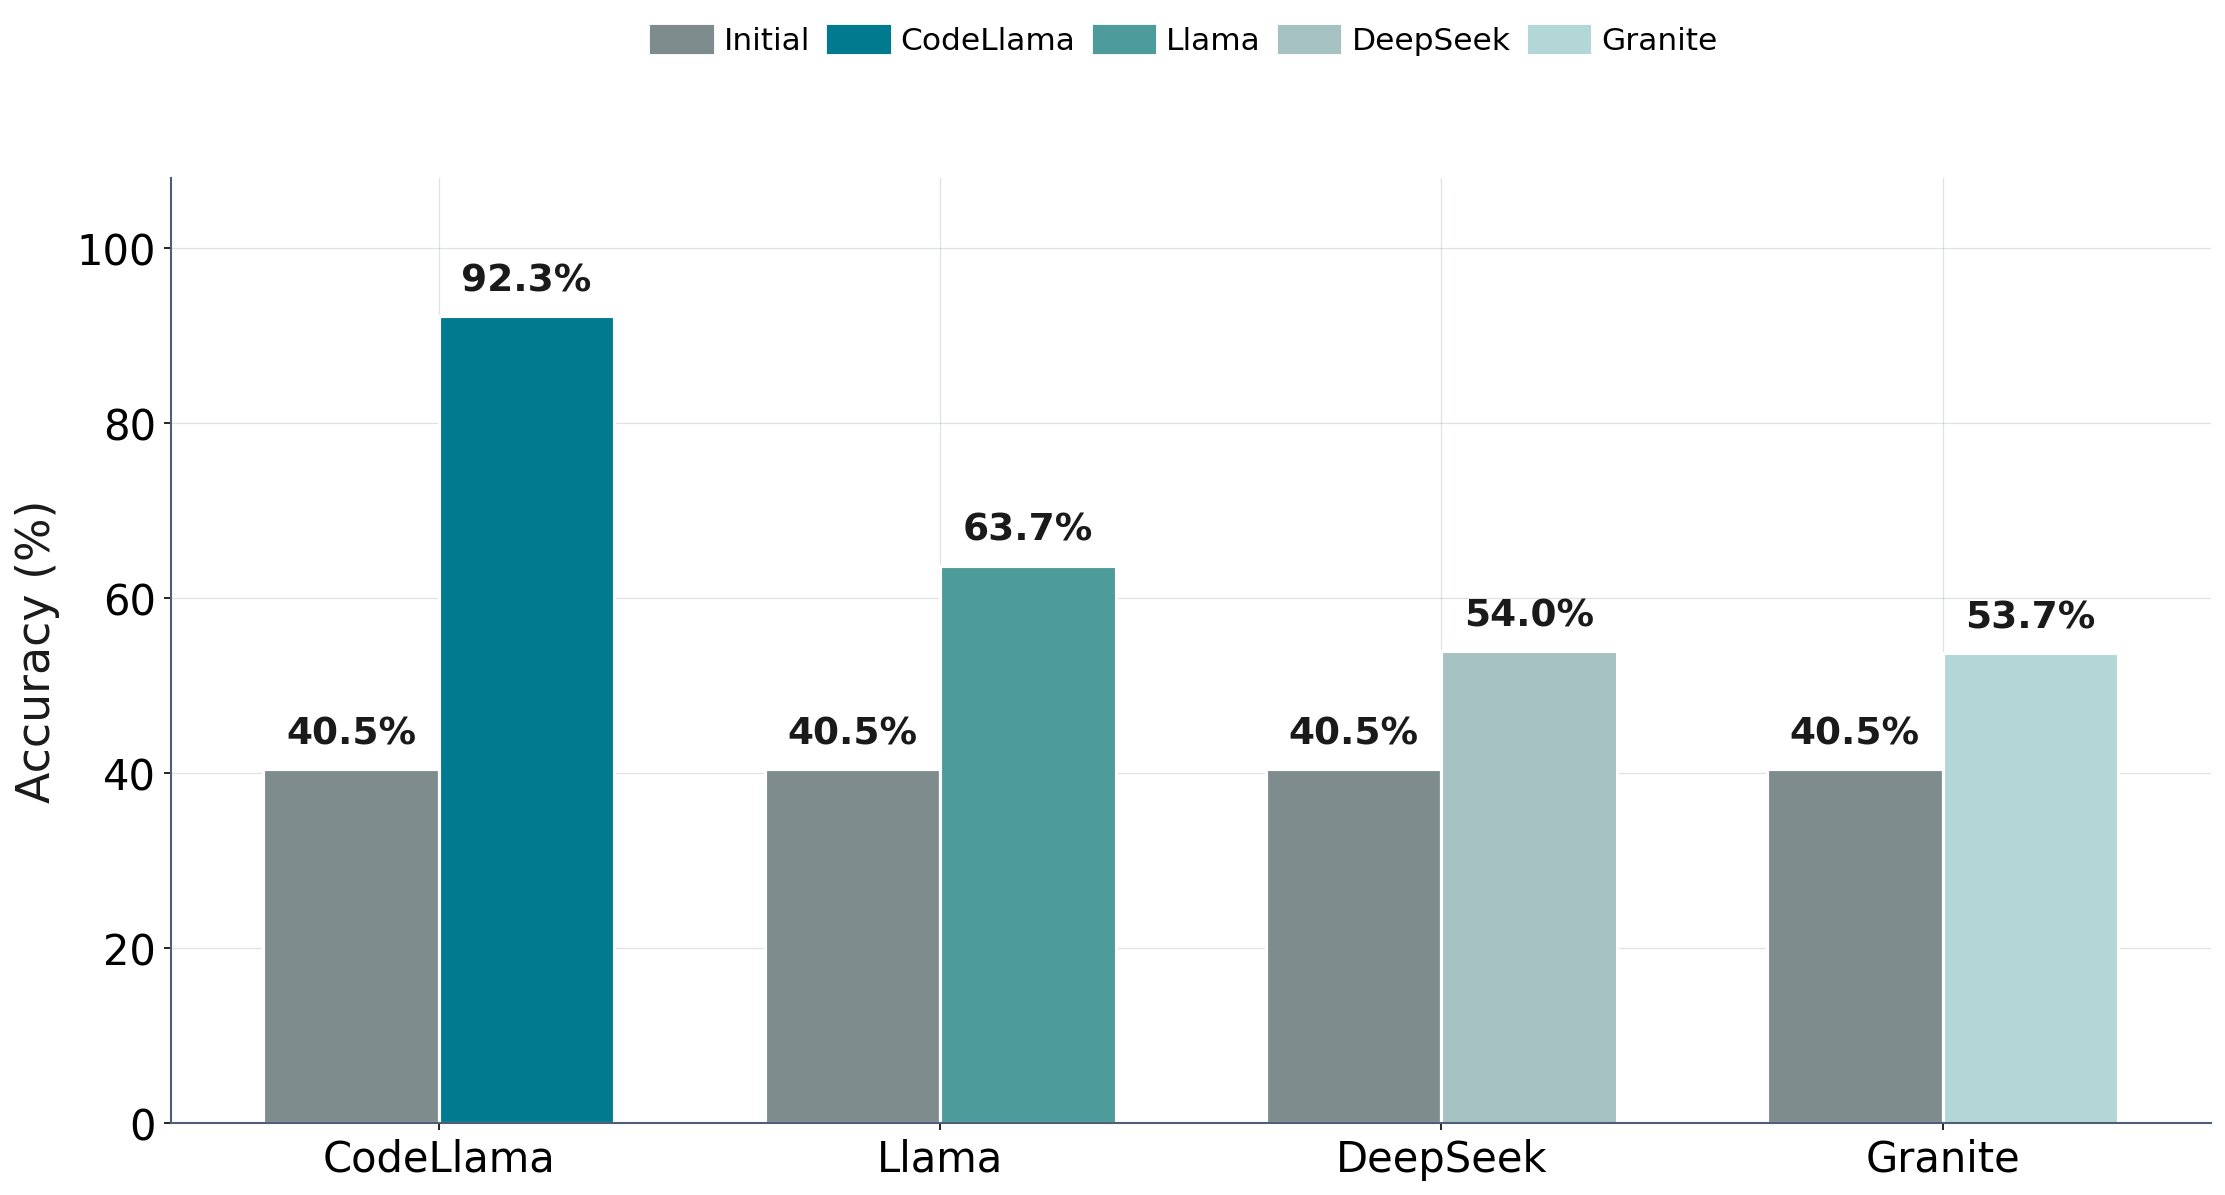

Figure saved as figures/llms.png


In [ ]:
#!/usr/bin/env python3
"""
LLM Comparison Visualization (Peak Accuracy, Sorted Descending)
Dynamic legend order + Nature×Tableau fusion palette.
"""

import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path

# === Nature × Tableau Fusion Palette ===
ACADEMIC_COLORS = {
    'Granite':   '#b3d6d6',  # Muted Royal Blue
    'CodeLlama': '#007A8E',  # Soft Green
    'DeepSeek':  '#A5C1C1',  # Deep Scientific Red
    'Llama':     '#4D9B9B',  # Modern Violet
    'light_gray': '#7f8c8d',
    'white': '#FFFFFF',
    'black': '#1A1A1A',
    'steel_blue': '#4F5D75',
}


def configure_publication_style():
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 20,
        'axes.labelsize': 22,
        'axes.titlesize': 24,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 15,
        'figure.titlesize': 24,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans', 'Liberation Sans'],
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'figure.dpi': 150,
        'savefig.dpi': 600,
        'savefig.bbox': 'tight',
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.linewidth': 1.2,
        'axes.edgecolor': ACADEMIC_COLORS['steel_blue'],
        'axes.labelcolor': ACADEMIC_COLORS['black'],
        'axes.axisbelow': True,
        'axes.labelpad': 8,
        'axes.grid': True,
        'grid.alpha': 0.25,
        'grid.linewidth': 0.6,
        'grid.color': ACADEMIC_COLORS['light_gray'],
        'lines.linewidth': 2.5,
        'text.usetex': False,
    })


def compute_mean_initial_and_peak(json_path: Path):
    with open(json_path) as f:
        data = json.load(f)
    initial_accs, peak_accs = [], []
    for p in data.get("policy_iterations", {}).values():
        if not isinstance(p, dict):
            continue
        baseline = p.get("baseline_accuracy", 0.0)
        iters = p.get("iteration_accuracies", [])
        if iters:
            peak = max(iters)
            initial_accs.append(baseline)
            peak_accs.append(peak)
    return np.mean(initial_accs or [0]), np.mean(peak_accs or [0])


def create_llm_comparison_plot(llm_names, initial_accs, fl_accs):
    configure_publication_style()
    fig, ax = plt.subplots(figsize=(16, 9))

    n = len(llm_names)
    x = np.arange(n)
    bar_width = 0.35

    # Dynamic color assignment according to sorted order
    llm_colors = [ACADEMIC_COLORS[name] for name in llm_names]

    # Bars
    bars_initial = ax.bar(x - bar_width/2, initial_accs, bar_width,
                          color=[ACADEMIC_COLORS['light_gray']] * n,
                          edgecolor='white', linewidth=1.5)
    bars_peak = ax.bar(x + bar_width/2, fl_accs, bar_width,
                       color=llm_colors, edgecolor='white', linewidth=1.5)

    # Value annotations
    for bar in list(bars_initial) + list(bars_peak):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 2,
                f"{height:.1f}%", ha='center', va='bottom',
                fontsize=18, fontweight='bold', color=ACADEMIC_COLORS['black'])

    # Axes styling
    ax.set_xticks(x)
    ax.set_xticklabels(llm_names, fontsize=20, fontweight='medium')
    ax.set_ylabel('Accuracy (%)', fontweight='normal', fontsize=22)
    ax.set_ylim(0, 108)

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(ACADEMIC_COLORS['steel_blue'])
        ax.spines[spine].set_linewidth(1)

    # === Dynamic legend matching the sorted order ===
    legend_elements = [
        Line2D([0], [0], color=ACADEMIC_COLORS['light_gray'], lw=14, label='Initial')
    ] + [
        Line2D([0], [0], color=ACADEMIC_COLORS[name], lw=14, label=name)
        for name in llm_names
    ]

    legend = ax.legend(handles=legend_elements,
                       loc='lower center',
                       bbox_to_anchor=(0.5, 1.10),
                       ncol=5,
                       frameon=False,
                       handlelength=1.1,
                       columnspacing=1.0,
                       handletextpad=0.8)
    for text in legend.get_texts():
        text.set_fontsize(15)
        text.set_fontweight('medium')

    fig.subplots_adjust(left=0.1, right=0.95, top=0.82, bottom=0.12)
    
    return fig


def safe_figure(fig, filename):
    fig.savefig(filename, dpi=600, bbox_inches='tight', pad_inches=0.15,
                facecolor='white', edgecolor='none')
    print(f"Figure saved as {filename}")


def main():
    result_files = {
        "Granite": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/llms/granite.json",
        "CodeLlama": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/llms/codellama.json",
        "DeepSeek": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/llms/deepseek.json",
        "Llama": "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/llms/llama.json"
    }

    results = [(n, *compute_mean_initial_and_peak(Path(p))) for n, p in result_files.items()]
    results.sort(key=lambda x: x[2], reverse=True)

    llm_names, initial_accs, peak_accs = zip(*results)

    fig = create_llm_comparison_plot(llm_names, initial_accs, peak_accs)
    plt.show()
    safe_figure(fig, 'figures/llms.png')


if __name__ == "__main__":
    main()


Policy Repair Accuracy Visualization

Generating clean comparison figure...
Figure saved as figures/policy_repair_comparison.png
Figure saved as figures/policy_repair_comparison.pdf


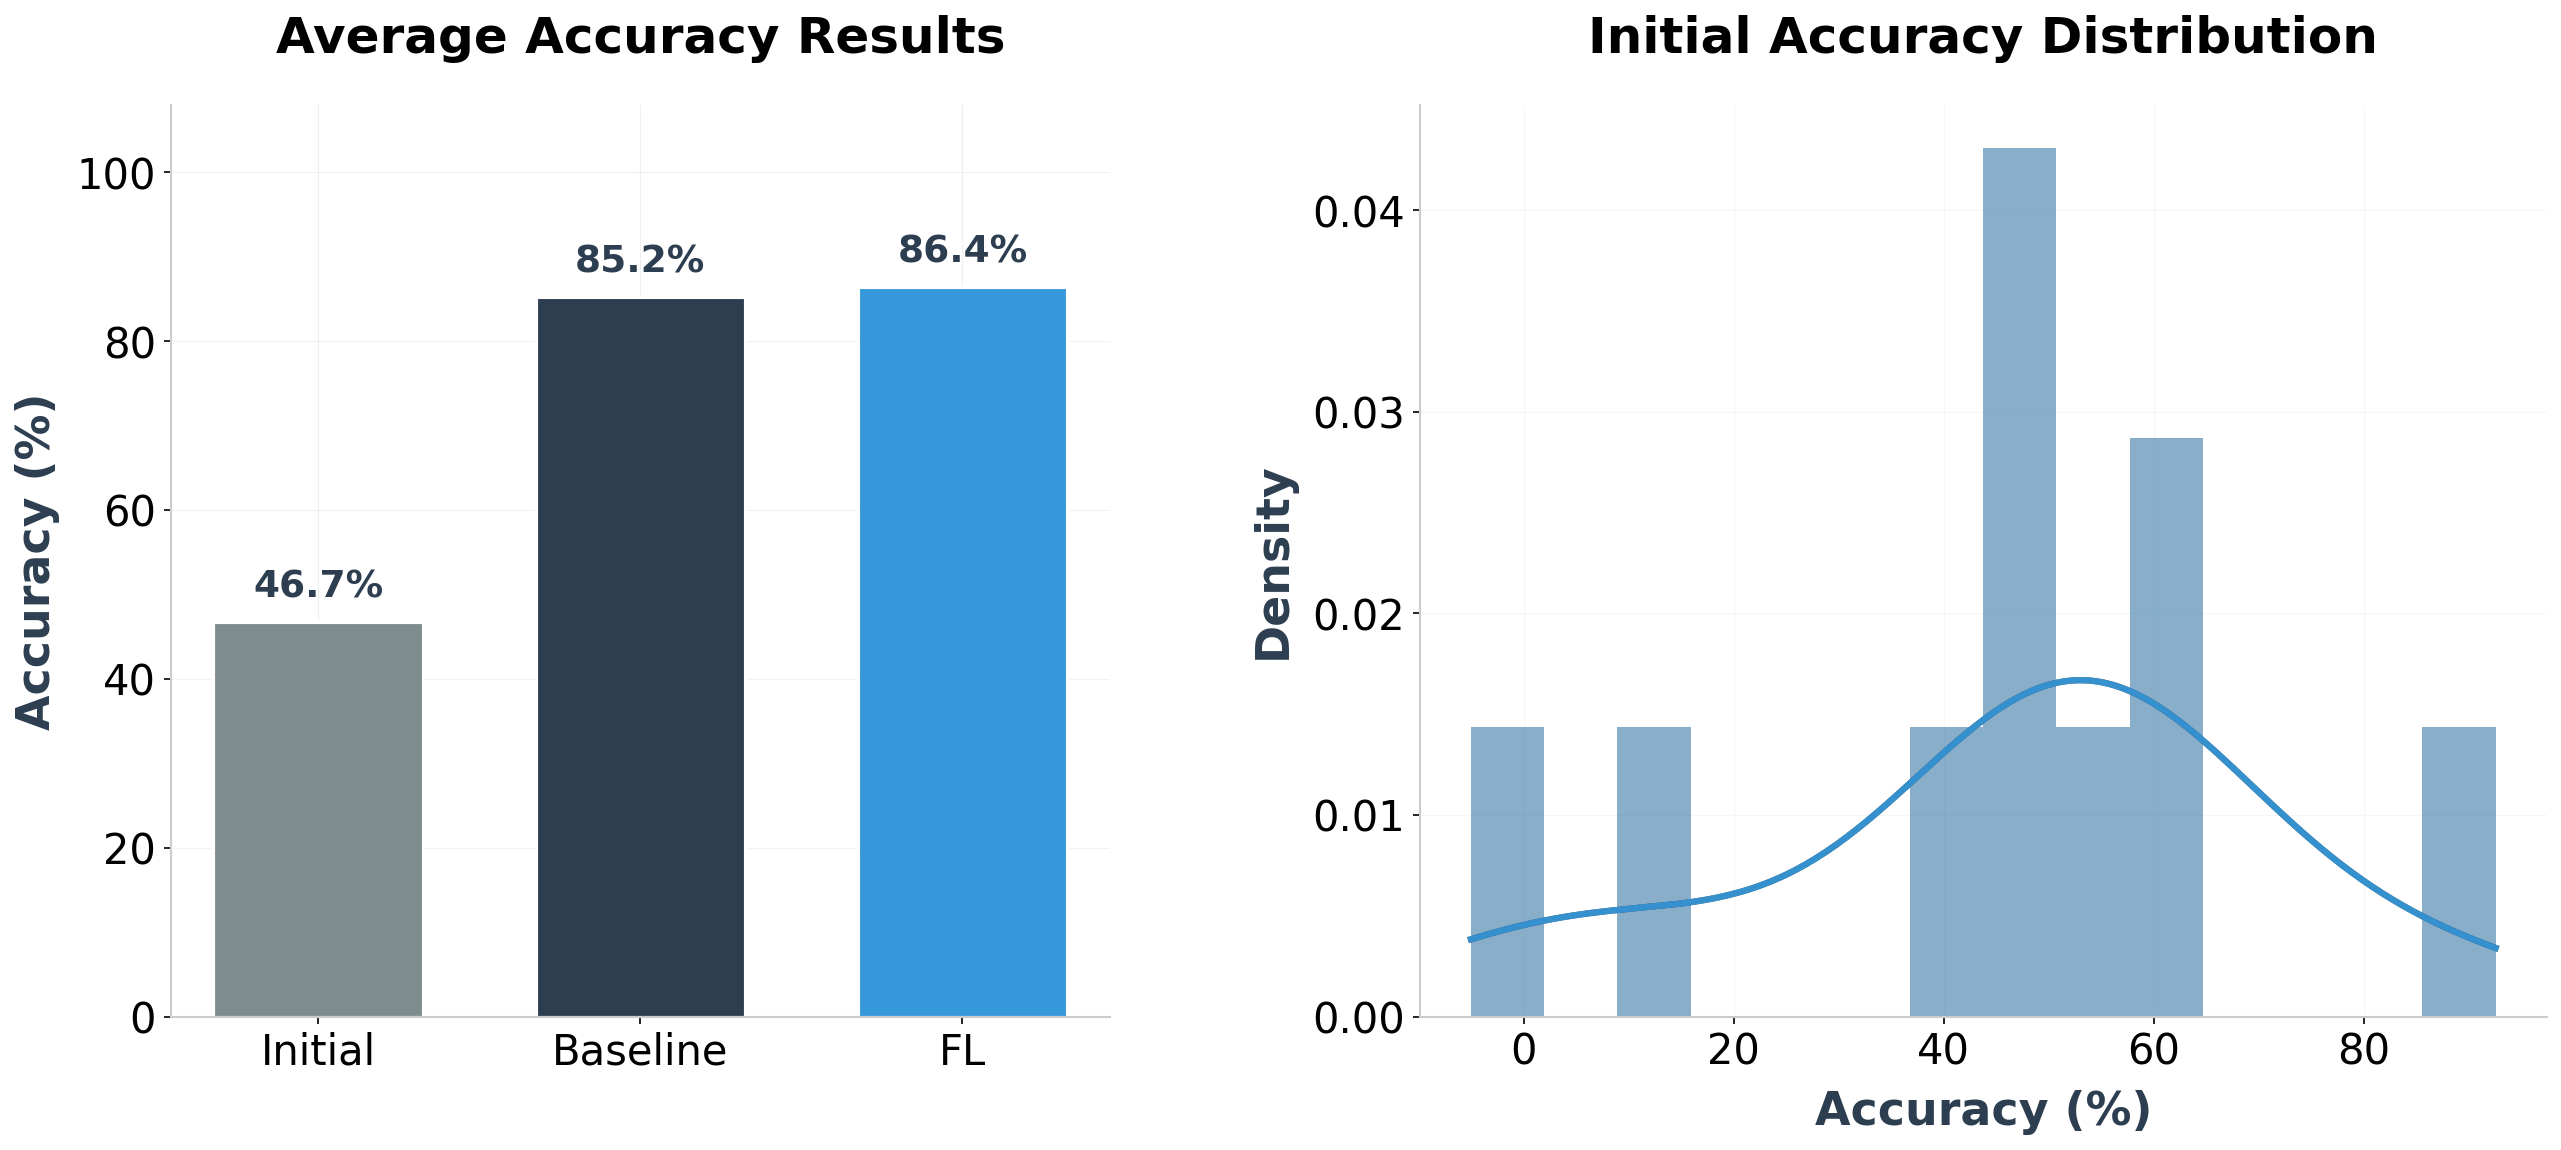


Visualization complete!


In [28]:
#!/usr/bin/env python3
"""
Generalization Experiment Visualization for Policy Repair

Academic Publication: "Counter-Example Guided Policy Repair for Cloud Security"
Clean, minimalist version for academic publication figures.
"""

import matplotlib.pyplot as plt
import numpy as np
import json
from scipy import stats

# Professional academic color palette
ACADEMIC_COLORS = {
    'navy_blue': '#2C3E50',      # Baseline
    'blue': '#3498DB',           # FL
    'gray': '#7F8C8D',           # Initial
    'light_gray': '#BDC3C7',
    'white': '#FFFFFF',
    'black': '#2C3E50',
    'steel_blue': '#34495E',
}

def configure_publication_style():
    """Configure matplotlib for publication-quality figures"""
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 20,
        'axes.labelsize': 22,
        'axes.titlesize': 24,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 20,
        'figure.titlesize': 24,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif'],
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'figure.dpi': 150,
        'savefig.dpi': 600,
        'savefig.bbox': 'tight',
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.linewidth': 1.2,
        'axes.edgecolor': ACADEMIC_COLORS['steel_blue'],
        'axes.labelcolor': ACADEMIC_COLORS['black'],
        'axes.axisbelow': True,
        'axes.labelpad': 8,
        'axes.grid': True,
        'grid.alpha': 0.25,
        'grid.linewidth': 0.6,
        'grid.color': ACADEMIC_COLORS['light_gray'],
        'lines.linewidth': 2.5,
        'lines.markersize': 8,
        'lines.markeredgewidth': 1.5,
        'text.usetex': False,
    })


class AccuracyVisualizer:
    """Visualizer for comparing Baseline and FL accuracy"""
    
    def __init__(self):
        configure_publication_style()
        self.colors = ACADEMIC_COLORS
    
    def calculate_accuracies(self, data):
        """Calculate initial and final accuracies for all policies"""
        policies = data['policy_iterations']
        
        initial_accuracies = []
        final_accuracies = []
        
        for _, policy_data in policies.items():
            initial_acc = policy_data.get('baseline_accuracy', 0.0)
            final_acc = policy_data.get('final_accuracy', initial_acc)
            initial_accuracies.append(initial_acc)
            final_accuracies.append(final_acc)
        
        avg_initial = np.mean(initial_accuracies) if initial_accuracies else 0.0
        avg_final = np.mean(final_accuracies) if final_accuracies else 0.0
        return avg_initial, avg_final, len(policies), initial_accuracies
    
    def create_comparison_plot(self, ax, baseline_initial, baseline_final, 
                               fl_initial, fl_final, title="Accuracy Comparison"):
        """Create a clean bar plot comparing Baseline and FL accuracies"""
        
        categories = ['Initial', 'Baseline', 'FL']
        values = [baseline_initial, baseline_final, fl_final]
        colors = [
            ACADEMIC_COLORS['gray'],
            ACADEMIC_COLORS['navy_blue'],
            ACADEMIC_COLORS['blue']
        ]
        
        x_positions = np.arange(len(categories))
        bar_width = 0.65
        bars = ax.bar(x_positions, values, bar_width, color=colors, edgecolor='white', linewidth=1.5)
        
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 2,
                    f'{value:.1f}%', ha='center', va='bottom',
                    fontsize=18, fontweight='bold', color=self.colors['black'])
        
        ax.set_title(title, fontsize=24, fontweight='bold', pad=25)
        ax.set_ylabel('Accuracy (%)', fontweight='bold', fontsize=22)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(categories, fontsize=20, fontweight='medium')
        ax.set_ylim(0, 108)
        
        ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.5, axis='y')
        ax.set_axisbelow(True)
        ax.set_facecolor('#FFFFFF')
        
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color('#CCCCCC')
            ax.spines[spine].set_linewidth(1)
    
    def create_modern_distribution_plot(self, ax, baseline_scores, fl_scores):
        """Minimalist, publication-ready distribution comparison"""
        
        all_scores = baseline_scores + fl_scores
        min_score, max_score = min(all_scores) - 5, max(all_scores) + 5
        bins = np.linspace(min_score, max_score, 15)

        # Subtle histograms
        ax.hist(baseline_scores, bins=bins, alpha=0.35,
                color=ACADEMIC_COLORS['navy_blue'], edgecolor='none', density=True)
        ax.hist(fl_scores, bins=bins, alpha=0.35,
                color=ACADEMIC_COLORS['blue'], edgecolor='none', density=True)

        # Smooth KDE curves
        kde_baseline = stats.gaussian_kde(baseline_scores)
        kde_fl = stats.gaussian_kde(fl_scores)
        x_range = np.linspace(min_score, max_score, 200)
        ax.plot(x_range, kde_baseline(x_range),
                color=ACADEMIC_COLORS['navy_blue'], linewidth=3, alpha=0.9)
        ax.plot(x_range, kde_fl(x_range),
                color=ACADEMIC_COLORS['blue'], linewidth=3, alpha=0.9)

        # Labels
        ax.set_xlabel('Accuracy (%)', fontweight='bold', fontsize=22)
        ax.set_ylabel('Density', fontweight='bold', fontsize=22)
        ax.set_title('Initial Accuracy Distribution',
                     fontsize=24, fontweight='bold', pad=25)

        # Clean style
        ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.5)
        ax.set_facecolor('#FFFFFF')
        ax.set_axisbelow(True)

        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color('#CCCCCC')
            ax.spines[spine].set_linewidth(1)
        
        # No legends, no annotations
        if ax.get_legend():
            ax.get_legend().remove()
    
    def create_dual_comparison(self, baseline_file, fl_file):
        """Create two plots: bar comparison and clean distribution plot"""
        
        with open(baseline_file, 'r') as f:
            baseline_data = json.load(f)
        with open(fl_file, 'r') as f:
            fl_data = json.load(f)
        
        baseline_initial, baseline_final, n_policies, baseline_initial_scores = self.calculate_accuracies(baseline_data)
        fl_initial, fl_final, _, fl_initial_scores = self.calculate_accuracies(fl_data)
        initial_accuracy = (baseline_initial + fl_initial) / 2
        
        fig = plt.figure(figsize=(18, 8))
        gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.2], wspace=0.3)
        ax1 = fig.add_subplot(gs[0])
        ax2 = fig.add_subplot(gs[1])
        
        fig.patch.set_facecolor('#FFFFFF')
        
        self.create_comparison_plot(ax1, initial_accuracy, baseline_final,
                                    initial_accuracy, fl_final,
                                    title="Average Accuracy Results")
        self.create_modern_distribution_plot(ax2, baseline_initial_scores, fl_initial_scores)
 
       
        
        plt.subplots_adjust(left=0.08, right=0.96, top=0.88, bottom=0.12)
        return fig


def save_figure(fig, filename):
    """Save figure with high-quality settings"""
    fig.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.15,
                facecolor='white', edgecolor='none')
    print(f"Figure saved as {filename}")


def main():
    print("=" * 60)
    print("Policy Repair Accuracy Visualization")
    print("=" * 60)
    
    visualizer = AccuracyVisualizer()
    
    # Update paths
    baseline_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results//baseline/base_intent.json"
    fl_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/fl/fl_intent.json"

    print("\nGenerating clean comparison figure...")
    fig = visualizer.create_dual_comparison(baseline_file, fl_file)
    save_figure(fig, 'figures/policy_repair_comparison.png')
    save_figure(fig, 'figures/policy_repair_comparison.pdf')
    
    plt.show()
    
    print("\n" + "=" * 60)
    print("Visualization complete!")
    print("=" * 60)


if __name__ == "__main__":
    main()


Policy Repair Accuracy Visualization (Elegant Academic Style)

Generating elegant academic bar chart...


✅ Figure saved as figures/policy_repair_elegant_barchart.png
✅ Figure saved as figures/policy_repair_elegant_barchart.pdf


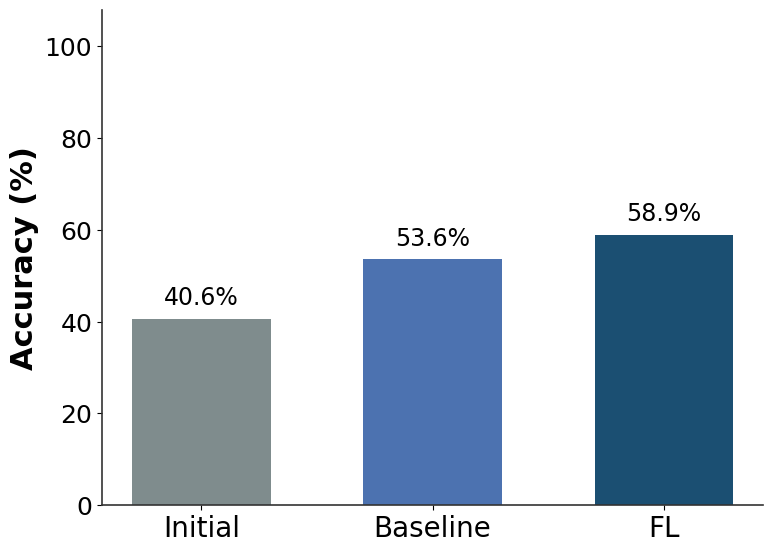


Visualization complete!


In [16]:
#!/usr/bin/env python3
"""
Policy Repair Visualization (Elegant Bar Chart)
Publication-ready, clean white background with modern academic colors.
"""

import matplotlib.pyplot as plt
import numpy as np
import json

# === Elegant Academic Palette ===
# Subtle, balanced, and professional tones — perfect for academic papers.
ACADEMIC_COLORS = {
    'initial_gray': '#7f8c8d',     # Soft Mist Gray
    'baseline_blue': '#4C72B0',    # Muted Royal Blue
    'fl_deepblue': '#1B4F72',      # Deep Ocean Blue (emphasized FL)
    'white': '#FFFFFF',
    'black': '#000000',
}

def configure_publication_style():
    """Configure matplotlib for clean, elegant publication visuals."""
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 20,
        'axes.labelsize': 22,
        'axes.titlesize': 24,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        'legend.fontsize': 18,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif'],
        'figure.facecolor': ACADEMIC_COLORS['white'],
        'axes.facecolor': ACADEMIC_COLORS['white'],
        'savefig.facecolor': ACADEMIC_COLORS['white'],
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.linewidth': 1.2,
        'axes.edgecolor': '#000000',
        'axes.grid': False,
        'text.usetex': False,
    })


class AccuracyVisualizer:
    """Visualizer for Baseline vs FL accuracy with elegant, minimalist color design."""
    
    def __init__(self):
        configure_publication_style()
        self.colors = ACADEMIC_COLORS
    
    def calculate_accuracies(self, data):
        """Compute initial and final accuracies across all policies."""
        policies = data['policy_iterations']
        initial_accuracies, final_accuracies = [], []
        
        for _, policy_data in policies.items():
            initial_acc = policy_data.get('baseline_accuracy', 0.0)
            final_acc = policy_data.get('average_accuracy', initial_acc)
            initial_accuracies.append(initial_acc)
            final_accuracies.append(final_acc)
        
        avg_initial = np.mean(initial_accuracies) if initial_accuracies else 0.0
        avg_final = np.mean(final_accuracies) if final_accuracies else 0.0
        return avg_initial, avg_final, len(policies)
    
    def create_comparison_plot(self, baseline_initial, baseline_final, 
                               fl_initial, fl_final, title="Average Accuracy Results"):
        """Create an elegant, minimalist bar chart comparing Baseline and FL accuracies."""
        
        categories = ['Initial', 'Baseline', 'FL']
        values = [baseline_initial, baseline_final, fl_final]
        colors = [
            self.colors['initial_gray'],
            self.colors['baseline_blue'],
            self.colors['fl_deepblue']
        ]
        
        # Elegant figure — proportioned for clarity
        fig, ax = plt.subplots(figsize=(8.2, 6))
        x_positions = np.arange(len(categories))
        bar_width = 0.6
        bars = ax.bar(x_positions, values, bar_width, color=colors, linewidth=0)
        
        # Annotate accuracies in a refined, unobtrusive way
        for bar, value in zip(bars, values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                    f'{value:.1f}%', ha='center', va='bottom',
                    fontsize=17, fontweight='medium', color=self.colors['black'])
        
        ax.set_title(title, fontsize=24, fontweight='bold', pad=20)
        ax.set_ylabel('Accuracy (%)', fontweight='bold', fontsize=22)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(categories, fontsize=20, fontweight='medium')
        ax.set_ylim(0, 108)
        
        # Minimalist structure — no grid, just axes
        ax.set_facecolor(self.colors['white'])
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color('#333333')
            ax.spines[spine].set_linewidth(1.2)
        
        plt.tight_layout(pad=1.2)
        return fig


def save_figure(fig, filename):
    """Save the figure in both PNG and PDF formats."""
    fig.savefig(filename, dpi=600, bbox_inches='tight', pad_inches=0.15,
                facecolor='white', edgecolor='none')
    print(f"✅ Figure saved as {filename}")


def main():
    print("=" * 60)
    print("Policy Repair Accuracy Visualization (Elegant Academic Style)")
    print("=" * 60)
    
    visualizer = AccuracyVisualizer()
    
    # === Update paths ===
    baseline_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/gpt/base.json"
    fl_file = "/home/bhall2/Documents/fixmypolicy/FL/Experiment-2/results/gpt/fl.json"

    with open(baseline_file, 'r') as f:
        baseline_data = json.load(f)
    with open(fl_file, 'r') as f:
        fl_data = json.load(f)

    baseline_initial, baseline_final, _ = visualizer.calculate_accuracies(baseline_data)
    fl_initial, fl_final, _ = visualizer.calculate_accuracies(fl_data)
    initial_accuracy = (baseline_initial + fl_initial) / 2

    print("\nGenerating elegant academic bar chart...")
    fig = visualizer.create_comparison_plot(initial_accuracy, baseline_final,
                                            initial_accuracy, fl_final,
                                            title="")
    
    save_figure(fig, 'figures/policy_repair_elegant_barchart.png')
    save_figure(fig, 'figures/policy_repair_elegant_barchart.pdf')
    
    plt.show()
    print("\n" + "=" * 60)
    print("Visualization complete!")
    print("=" * 60)


if __name__ == "__main__":
    main()
